In [1]:
import sys
sys.path.append("..")
from IPython.display import SVG
import keras
from keras.utils.vis_utils import model_to_dot
from models import *
from utils.data_preprocessing import encode_sequences, MinMaxScaler3D, shuffle_array
from utils.parsers import parse_bulkiness, parse_hydrophobicity, load_kabat, vdw_data, charge_index_data
from utils.defines import VL_LENGTH, VH_LENGTH
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [3]:
VL_sequences, VH_sequences, names_mask, animals_mask = load_kabat('../data/kabat_animals.html')

In [4]:
with open('../data/vhvl.txt', 'r') as f:
    for x in f.readlines():
        elements = x.split(',')
        VL_sequences.append(elements[2])
        VH_sequences.append(elements[3])        
        names_mask.append(elements[0])
        animals_mask.append(elements[1])

In [5]:
VL_index = [i for i, x in enumerate(VL_sequences) if len(x) < VL_LENGTH]
VH_index = [i for i, x in enumerate(VH_sequences) if len(x) < VH_LENGTH]

index = set(VL_index).intersection(VH_index)

In [6]:
VL_sequences = [x for i, x in enumerate(VL_sequences) if i in index]
VH_sequences = [x for i, x in enumerate(VH_sequences) if i in index]
names_mask = [x for i, x in enumerate(names_mask) if i in index]
animals_mask = [x for i, x in enumerate(animals_mask) if i in index]

In [7]:
# VL_sequences, VH_sequences, names_mask, animals_mask = load_kabat('../data/kabat_animals.html')

h_data = parse_hydrophobicity('../data/consensus.hpb')
bulkiness_data = parse_bulkiness('../data/amino_acid_bulkiness.txt')

DATASETS = [h_data, vdw_data, charge_index_data]
# DATASETS=[vdw_data]

ss_VH = MinMaxScaler3D(mask=0)
ss_VL = MinMaxScaler3D(mask=0)

VH_encoded = encode_sequences(VH_sequences, VH_LENGTH, DATASETS)
VL_encoded = encode_sequences(VL_sequences, VL_LENGTH, DATASETS)

VH_encoded = ss_VH.fit_transform(VH_encoded)
VL_encoded = ss_VL.fit_transform(VL_encoded)

VH_encoded_shuffled, VL_encoded_shuffled = shuffle_array(VH_encoded, VL_encoded)

In [8]:
encoder, autoencoder, sess = autoencoderV7(3, latent_dim=20)

Instructions for updating:
Colocations handled automatically by placer.


In [96]:
from keras.utils import plot_model
plot_model(autoencoder, show_shapes=True, to_file='model.eps')

In [97]:
!cp model.eps /home/gil/PhD-write-ups/24-month-progress-meeting/images/

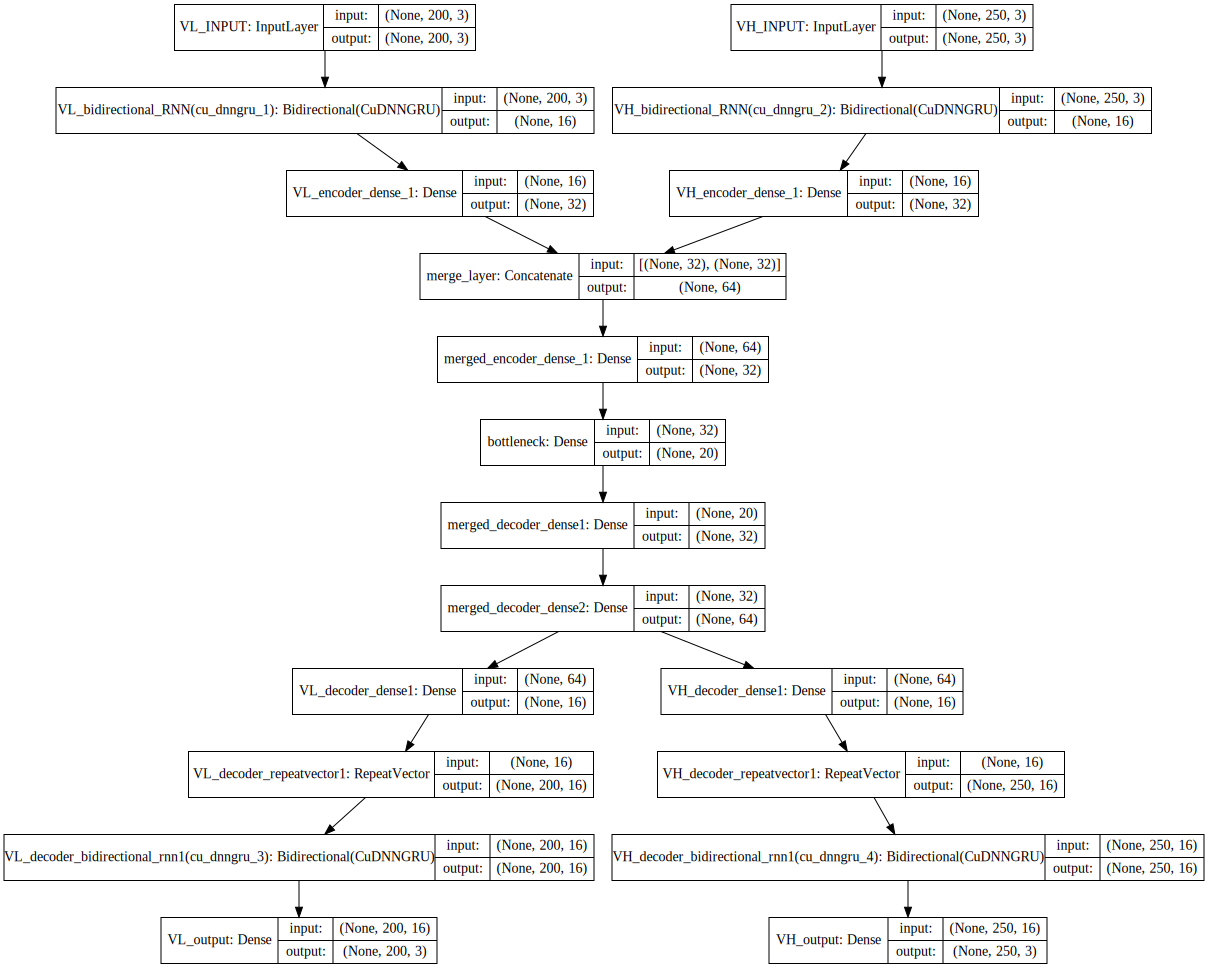

In [9]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
autoencoder.count_params()

19354

In [11]:
import numpy as np

In [12]:
NAME= "autoencoderV7_abysis_20HVC_dim"
RUN = 'run1'

weight_path = '../model_weights/{}/{}/{}.hdf5'.format(NAME,RUN,NAME)
log_path = '../logs/{}/{}'.format(NAME, RUN)

In [ ]:
if not os.path.exists('../model_weights/{}/{}/'.format(NAME,RUN)):
    os.mkdir('../model_weights/{}'.format(NAME))
    os.mkdir('../model_weights/{}/{}'.format(NAME,RUN))

In [15]:
history = autoencoder.fit([VL_encoded_shuffled, VH_encoded_shuffled], 
                          [VL_encoded_shuffled, VH_encoded_shuffled],
                          epochs=10000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint(weight_path, save_best_only=True),
                                     keras.callbacks.TensorBoard(log_path)])

Train on 4670 samples, validate on 1168 samples
Epoch 1/10000
4670/4670 [==============================] - 8s 2ms/step - loss: 0.4026 - VL_output_loss: 0.1963 - VH_output_loss: 0.2063 - val_loss: 0.3516 - val_VL_output_loss: 0.1741 - val_VH_output_loss: 0.1775
Epoch 2/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.3502 - VL_output_loss: 0.1735 - VH_output_loss: 0.1767 - val_loss: 0.3511 - val_VL_output_loss: 0.1739 - val_VH_output_loss: 0.1772
Epoch 3/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.3498 - VL_output_loss: 0.1733 - VH_output_loss: 0.1765 - val_loss: 0.3509 - val_VL_output_loss: 0.1738 - val_VH_output_loss: 0.1771
Epoch 4/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.3496 - VL_output_loss: 0.1732 - VH_output_loss: 0.1764 - val_loss: 0.3506 - val_VL_output_loss: 0.1737 - val_VH_output_loss: 0.1770
Epoch 5/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.3493 - VL_output_lo

4670/4670 [==============================] - 7s 1ms/step - loss: 0.3006 - VL_output_loss: 0.1494 - VH_output_loss: 0.1512 - val_loss: 0.3010 - val_VL_output_loss: 0.1497 - val_VH_output_loss: 0.1513
Epoch 78/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.2998 - VL_output_loss: 0.1490 - VH_output_loss: 0.1508 - val_loss: 0.3010 - val_VL_output_loss: 0.1498 - val_VH_output_loss: 0.1512
Epoch 79/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.2990 - VL_output_loss: 0.1486 - VH_output_loss: 0.1504 - val_loss: 0.3012 - val_VL_output_loss: 0.1504 - val_VH_output_loss: 0.1508
Epoch 80/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2985 - VL_output_loss: 0.1484 - VH_output_loss: 0.1501 - val_loss: 0.2984 - val_VL_output_loss: 0.1481 - val_VH_output_loss: 0.1503
Epoch 81/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2980 - VL_output_loss: 0.1480 - VH_output_loss: 0.1499 - val_loss: 0.2983 - v

4670/4670 [==============================] - 7s 1ms/step - loss: 0.2554 - VL_output_loss: 0.1200 - VH_output_loss: 0.1354 - val_loss: 0.2581 - val_VL_output_loss: 0.1196 - val_VH_output_loss: 0.1385
Epoch 154/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2541 - VL_output_loss: 0.1192 - VH_output_loss: 0.1349 - val_loss: 0.2529 - val_VL_output_loss: 0.1182 - val_VH_output_loss: 0.1346
Epoch 155/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.2553 - VL_output_loss: 0.1205 - VH_output_loss: 0.1348 - val_loss: 0.2525 - val_VL_output_loss: 0.1179 - val_VH_output_loss: 0.1346
Epoch 156/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.2542 - VL_output_loss: 0.1196 - VH_output_loss: 0.1346 - val_loss: 0.2527 - val_VL_output_loss: 0.1177 - val_VH_output_loss: 0.1350
Epoch 157/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.2524 - VL_output_loss: 0.1180 - VH_output_loss: 0.1344 - val_loss: 0.2529

4670/4670 [==============================] - 7s 1ms/step - loss: 0.2342 - VL_output_loss: 0.1071 - VH_output_loss: 0.1271 - val_loss: 0.2325 - val_VL_output_loss: 0.1055 - val_VH_output_loss: 0.1270
Epoch 230/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.2325 - VL_output_loss: 0.1060 - VH_output_loss: 0.1265 - val_loss: 0.2386 - val_VL_output_loss: 0.1063 - val_VH_output_loss: 0.1323
Epoch 231/10000
4670/4670 [==============================] - 7s 2ms/step - loss: 0.2340 - VL_output_loss: 0.1070 - VH_output_loss: 0.1270 - val_loss: 0.2321 - val_VL_output_loss: 0.1055 - val_VH_output_loss: 0.1266
Epoch 232/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.2327 - VL_output_loss: 0.1064 - VH_output_loss: 0.1263 - val_loss: 0.2372 - val_VL_output_loss: 0.1108 - val_VH_output_loss: 0.1264
Epoch 233/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2325 - VL_output_loss: 0.1059 - VH_output_loss: 0.1266 - val_loss: 0.2327

4670/4670 [==============================] - 6s 1ms/step - loss: 0.2221 - VL_output_loss: 0.0997 - VH_output_loss: 0.1223 - val_loss: 0.2220 - val_VL_output_loss: 0.1004 - val_VH_output_loss: 0.1216
Epoch 306/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.2216 - VL_output_loss: 0.0998 - VH_output_loss: 0.1218 - val_loss: 0.2235 - val_VL_output_loss: 0.1001 - val_VH_output_loss: 0.1234
Epoch 307/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.2224 - VL_output_loss: 0.1004 - VH_output_loss: 0.1220 - val_loss: 0.2239 - val_VL_output_loss: 0.0997 - val_VH_output_loss: 0.1241
Epoch 308/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2210 - VL_output_loss: 0.0988 - VH_output_loss: 0.1222 - val_loss: 0.2216 - val_VL_output_loss: 0.0998 - val_VH_output_loss: 0.1218
Epoch 309/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2229 - VL_output_loss: 0.1008 - VH_output_loss: 0.1221 - val_loss: 0.2713

4670/4670 [==============================] - 9s 2ms/step - loss: 0.2144 - VL_output_loss: 0.0966 - VH_output_loss: 0.1177 - val_loss: 0.2209 - val_VL_output_loss: 0.1026 - val_VH_output_loss: 0.1183
Epoch 382/10000
4670/4670 [==============================] - 9s 2ms/step - loss: 0.2127 - VL_output_loss: 0.0946 - VH_output_loss: 0.1180 - val_loss: 0.2134 - val_VL_output_loss: 0.0946 - val_VH_output_loss: 0.1188
Epoch 383/10000
4670/4670 [==============================] - 10s 2ms/step - loss: 0.2122 - VL_output_loss: 0.0946 - VH_output_loss: 0.1176 - val_loss: 0.2142 - val_VL_output_loss: 0.0953 - val_VH_output_loss: 0.1189
Epoch 384/10000
4670/4670 [==============================] - 10s 2ms/step - loss: 0.2201 - VL_output_loss: 0.1013 - VH_output_loss: 0.1188 - val_loss: 0.2137 - val_VL_output_loss: 0.0948 - val_VH_output_loss: 0.1188
Epoch 385/10000
4670/4670 [==============================] - 9s 2ms/step - loss: 0.2123 - VL_output_loss: 0.0945 - VH_output_loss: 0.1178 - val_loss: 0.22

4670/4670 [==============================] - 11s 2ms/step - loss: 0.2070 - VL_output_loss: 0.0913 - VH_output_loss: 0.1157 - val_loss: 0.2075 - val_VL_output_loss: 0.0913 - val_VH_output_loss: 0.1162
Epoch 458/10000
4670/4670 [==============================] - 10s 2ms/step - loss: 0.2063 - VL_output_loss: 0.0907 - VH_output_loss: 0.1156 - val_loss: 0.2073 - val_VL_output_loss: 0.0915 - val_VH_output_loss: 0.1158
Epoch 459/10000
4670/4670 [==============================] - 10s 2ms/step - loss: 0.2078 - VL_output_loss: 0.0927 - VH_output_loss: 0.1151 - val_loss: 0.2134 - val_VL_output_loss: 0.0966 - val_VH_output_loss: 0.1168
Epoch 460/10000
4670/4670 [==============================] - 11s 2ms/step - loss: 0.2090 - VL_output_loss: 0.0921 - VH_output_loss: 0.1169 - val_loss: 0.2081 - val_VL_output_loss: 0.0921 - val_VH_output_loss: 0.1159
Epoch 461/10000
4670/4670 [==============================] - 10s 2ms/step - loss: 0.2057 - VL_output_loss: 0.0905 - VH_output_loss: 0.1152 - val_loss: 0

4670/4670 [==============================] - 6s 1ms/step - loss: 0.2023 - VL_output_loss: 0.0888 - VH_output_loss: 0.1135 - val_loss: 0.2045 - val_VL_output_loss: 0.0895 - val_VH_output_loss: 0.1150
Epoch 534/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2018 - VL_output_loss: 0.0891 - VH_output_loss: 0.1127 - val_loss: 0.2040 - val_VL_output_loss: 0.0906 - val_VH_output_loss: 0.1134
Epoch 535/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2055 - VL_output_loss: 0.0919 - VH_output_loss: 0.1136 - val_loss: 0.2046 - val_VL_output_loss: 0.0897 - val_VH_output_loss: 0.1150
Epoch 536/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2041 - VL_output_loss: 0.0910 - VH_output_loss: 0.1132 - val_loss: 0.2073 - val_VL_output_loss: 0.0938 - val_VH_output_loss: 0.1135
Epoch 537/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2017 - VL_output_loss: 0.0891 - VH_output_loss: 0.1126 - val_loss: 0.2042

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1981 - VL_output_loss: 0.0870 - VH_output_loss: 0.1112 - val_loss: 0.1999 - val_VL_output_loss: 0.0881 - val_VH_output_loss: 0.1118
Epoch 610/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2010 - VL_output_loss: 0.0902 - VH_output_loss: 0.1108 - val_loss: 0.2072 - val_VL_output_loss: 0.0937 - val_VH_output_loss: 0.1135
Epoch 611/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1982 - VL_output_loss: 0.0873 - VH_output_loss: 0.1109 - val_loss: 0.2002 - val_VL_output_loss: 0.0875 - val_VH_output_loss: 0.1127
Epoch 612/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1998 - VL_output_loss: 0.0867 - VH_output_loss: 0.1131 - val_loss: 0.2006 - val_VL_output_loss: 0.0882 - val_VH_output_loss: 0.1124
Epoch 613/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1989 - VL_output_loss: 0.0883 - VH_output_loss: 0.1107 - val_loss: 0.1989

4670/4670 [==============================] - 6s 1ms/step - loss: 0.2012 - VL_output_loss: 0.0856 - VH_output_loss: 0.1156 - val_loss: 0.2028 - val_VL_output_loss: 0.0889 - val_VH_output_loss: 0.1140
Epoch 686/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2003 - VL_output_loss: 0.0880 - VH_output_loss: 0.1123 - val_loss: 0.2085 - val_VL_output_loss: 0.0880 - val_VH_output_loss: 0.1205
Epoch 687/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2007 - VL_output_loss: 0.0859 - VH_output_loss: 0.1148 - val_loss: 0.2008 - val_VL_output_loss: 0.0884 - val_VH_output_loss: 0.1124
Epoch 688/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2015 - VL_output_loss: 0.0855 - VH_output_loss: 0.1160 - val_loss: 0.1995 - val_VL_output_loss: 0.0865 - val_VH_output_loss: 0.1130
Epoch 689/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1968 - VL_output_loss: 0.0852 - VH_output_loss: 0.1116 - val_loss: 0.1972

4670/4670 [==============================] - 6s 1ms/step - loss: 0.2018 - VL_output_loss: 0.0851 - VH_output_loss: 0.1167 - val_loss: 0.2021 - val_VL_output_loss: 0.0851 - val_VH_output_loss: 0.1171
Epoch 762/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2005 - VL_output_loss: 0.0851 - VH_output_loss: 0.1153 - val_loss: 0.2040 - val_VL_output_loss: 0.0869 - val_VH_output_loss: 0.1171
Epoch 763/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1991 - VL_output_loss: 0.0838 - VH_output_loss: 0.1154 - val_loss: 0.2026 - val_VL_output_loss: 0.0847 - val_VH_output_loss: 0.1179
Epoch 764/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1988 - VL_output_loss: 0.0830 - VH_output_loss: 0.1158 - val_loss: 0.2020 - val_VL_output_loss: 0.0851 - val_VH_output_loss: 0.1169
Epoch 765/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2003 - VL_output_loss: 0.0844 - VH_output_loss: 0.1159 - val_loss: 0.2104

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1932 - VL_output_loss: 0.0820 - VH_output_loss: 0.1112 - val_loss: 0.1980 - val_VL_output_loss: 0.0836 - val_VH_output_loss: 0.1145
Epoch 838/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1940 - VL_output_loss: 0.0818 - VH_output_loss: 0.1122 - val_loss: 0.1965 - val_VL_output_loss: 0.0834 - val_VH_output_loss: 0.1132
Epoch 839/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1974 - VL_output_loss: 0.0857 - VH_output_loss: 0.1117 - val_loss: 0.1971 - val_VL_output_loss: 0.0840 - val_VH_output_loss: 0.1132
Epoch 840/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1935 - VL_output_loss: 0.0823 - VH_output_loss: 0.1112 - val_loss: 0.2019 - val_VL_output_loss: 0.0871 - val_VH_output_loss: 0.1148
Epoch 841/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1939 - VL_output_loss: 0.0827 - VH_output_loss: 0.1112 - val_loss: 0.1978

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1910 - VL_output_loss: 0.0817 - VH_output_loss: 0.1093 - val_loss: 0.1937 - val_VL_output_loss: 0.0825 - val_VH_output_loss: 0.1111
Epoch 914/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1894 - VL_output_loss: 0.0807 - VH_output_loss: 0.1087 - val_loss: 0.1930 - val_VL_output_loss: 0.0822 - val_VH_output_loss: 0.1107
Epoch 915/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1982 - VL_output_loss: 0.0887 - VH_output_loss: 0.1095 - val_loss: 0.1972 - val_VL_output_loss: 0.0857 - val_VH_output_loss: 0.1115
Epoch 916/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1921 - VL_output_loss: 0.0827 - VH_output_loss: 0.1094 - val_loss: 0.1964 - val_VL_output_loss: 0.0830 - val_VH_output_loss: 0.1134
Epoch 917/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1927 - VL_output_loss: 0.0833 - VH_output_loss: 0.1094 - val_loss: 0.1961

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1848 - VL_output_loss: 0.0803 - VH_output_loss: 0.1046 - val_loss: 0.1885 - val_VL_output_loss: 0.0831 - val_VH_output_loss: 0.1054
Epoch 990/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1839 - VL_output_loss: 0.0796 - VH_output_loss: 0.1043 - val_loss: 0.1883 - val_VL_output_loss: 0.0823 - val_VH_output_loss: 0.1060
Epoch 991/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1940 - VL_output_loss: 0.0893 - VH_output_loss: 0.1047 - val_loss: 0.1897 - val_VL_output_loss: 0.0823 - val_VH_output_loss: 0.1074
Epoch 992/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1852 - VL_output_loss: 0.0811 - VH_output_loss: 0.1042 - val_loss: 0.1889 - val_VL_output_loss: 0.0817 - val_VH_output_loss: 0.1072
Epoch 993/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1833 - VL_output_loss: 0.0795 - VH_output_loss: 0.1038 - val_loss: 0.1886

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1862 - VL_output_loss: 0.0825 - VH_output_loss: 0.1037 - val_loss: 0.1884 - val_VL_output_loss: 0.0819 - val_VH_output_loss: 0.1065
Epoch 1028/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1822 - VL_output_loss: 0.0792 - VH_output_loss: 0.1029 - val_loss: 0.1868 - val_VL_output_loss: 0.0822 - val_VH_output_loss: 0.1046
Epoch 1029/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1820 - VL_output_loss: 0.0792 - VH_output_loss: 0.1028 - val_loss: 0.1872 - val_VL_output_loss: 0.0816 - val_VH_output_loss: 0.1056
Epoch 1030/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1830 - VL_output_loss: 0.0794 - VH_output_loss: 0.1036 - val_loss: 0.1848 - val_VL_output_loss: 0.0806 - val_VH_output_loss: 0.1042
Epoch 1031/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1869 - VL_output_loss: 0.0838 - VH_output_loss: 0.1031 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1819 - VL_output_loss: 0.0801 - VH_output_loss: 0.1018 - val_loss: 0.1857 - val_VL_output_loss: 0.0821 - val_VH_output_loss: 0.1036
Epoch 1066/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1817 - VL_output_loss: 0.0794 - VH_output_loss: 0.1023 - val_loss: 0.1850 - val_VL_output_loss: 0.0811 - val_VH_output_loss: 0.1038
Epoch 1067/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1832 - VL_output_loss: 0.0808 - VH_output_loss: 0.1025 - val_loss: 0.1852 - val_VL_output_loss: 0.0807 - val_VH_output_loss: 0.1045
Epoch 1068/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1812 - VL_output_loss: 0.0788 - VH_output_loss: 0.1024 - val_loss: 0.1848 - val_VL_output_loss: 0.0810 - val_VH_output_loss: 0.1038
Epoch 1069/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1824 - VL_output_loss: 0.0797 - VH_output_loss: 0.1027 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1802 - VL_output_loss: 0.0784 - VH_output_loss: 0.1019 - val_loss: 0.1844 - val_VL_output_loss: 0.0799 - val_VH_output_loss: 0.1044
Epoch 1104/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1801 - VL_output_loss: 0.0784 - VH_output_loss: 0.1016 - val_loss: 0.1839 - val_VL_output_loss: 0.0810 - val_VH_output_loss: 0.1029
Epoch 1105/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1802 - VL_output_loss: 0.0788 - VH_output_loss: 0.1015 - val_loss: 0.1857 - val_VL_output_loss: 0.0817 - val_VH_output_loss: 0.1039
Epoch 1106/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1840 - VL_output_loss: 0.0820 - VH_output_loss: 0.1020 - val_loss: 0.1875 - val_VL_output_loss: 0.0838 - val_VH_output_loss: 0.1037
Epoch 1107/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1834 - VL_output_loss: 0.0806 - VH_output_loss: 0.1028 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1791 - VL_output_loss: 0.0779 - VH_output_loss: 0.1012 - val_loss: 0.1828 - val_VL_output_loss: 0.0798 - val_VH_output_loss: 0.1031
Epoch 1142/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1788 - VL_output_loss: 0.0782 - VH_output_loss: 0.1006 - val_loss: 0.1820 - val_VL_output_loss: 0.0798 - val_VH_output_loss: 0.1022
Epoch 1143/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1792 - VL_output_loss: 0.0782 - VH_output_loss: 0.1010 - val_loss: 0.1825 - val_VL_output_loss: 0.0797 - val_VH_output_loss: 0.1028
Epoch 1144/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1828 - VL_output_loss: 0.0818 - VH_output_loss: 0.1011 - val_loss: 0.1848 - val_VL_output_loss: 0.0819 - val_VH_output_loss: 0.1030
Epoch 1145/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1805 - VL_output_loss: 0.0794 - VH_output_loss: 0.1011 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1786 - VL_output_loss: 0.0781 - VH_output_loss: 0.1006 - val_loss: 0.1818 - val_VL_output_loss: 0.0801 - val_VH_output_loss: 0.1017
Epoch 1180/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1811 - VL_output_loss: 0.0807 - VH_output_loss: 0.1004 - val_loss: 0.1824 - val_VL_output_loss: 0.0797 - val_VH_output_loss: 0.1027
Epoch 1181/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1784 - VL_output_loss: 0.0778 - VH_output_loss: 0.1005 - val_loss: 0.1812 - val_VL_output_loss: 0.0793 - val_VH_output_loss: 0.1019
Epoch 1182/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1780 - VL_output_loss: 0.0776 - VH_output_loss: 0.1005 - val_loss: 0.1824 - val_VL_output_loss: 0.0795 - val_VH_output_loss: 0.1030
Epoch 1183/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1781 - VL_output_loss: 0.0775 - VH_output_loss: 0.1007 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1770 - VL_output_loss: 0.0771 - VH_output_loss: 0.0999 - val_loss: 0.1812 - val_VL_output_loss: 0.0796 - val_VH_output_loss: 0.1016
Epoch 1218/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1775 - VL_output_loss: 0.0777 - VH_output_loss: 0.0998 - val_loss: 0.1838 - val_VL_output_loss: 0.0797 - val_VH_output_loss: 0.1041
Epoch 1219/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1775 - VL_output_loss: 0.0777 - VH_output_loss: 0.0998 - val_loss: 0.1824 - val_VL_output_loss: 0.0806 - val_VH_output_loss: 0.1017
Epoch 1220/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1896 - VL_output_loss: 0.0890 - VH_output_loss: 0.1006 - val_loss: 0.1833 - val_VL_output_loss: 0.0806 - val_VH_output_loss: 0.1028
Epoch 1221/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1789 - VL_output_loss: 0.0778 - VH_output_loss: 0.1011 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1819 - VL_output_loss: 0.0778 - VH_output_loss: 0.1041 - val_loss: 0.1830 - val_VL_output_loss: 0.0789 - val_VH_output_loss: 0.1040
Epoch 1256/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1795 - VL_output_loss: 0.0771 - VH_output_loss: 0.1025 - val_loss: 0.1828 - val_VL_output_loss: 0.0788 - val_VH_output_loss: 0.1040
Epoch 1257/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1798 - VL_output_loss: 0.0777 - VH_output_loss: 0.1021 - val_loss: 0.1864 - val_VL_output_loss: 0.0826 - val_VH_output_loss: 0.1038
Epoch 1258/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1825 - VL_output_loss: 0.0804 - VH_output_loss: 0.1021 - val_loss: 0.1856 - val_VL_output_loss: 0.0823 - val_VH_output_loss: 0.1034
Epoch 1259/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1802 - VL_output_loss: 0.0785 - VH_output_loss: 0.1017 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1778 - VL_output_loss: 0.0771 - VH_output_loss: 0.1007 - val_loss: 0.1842 - val_VL_output_loss: 0.0798 - val_VH_output_loss: 0.1044
Epoch 1294/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1780 - VL_output_loss: 0.0772 - VH_output_loss: 0.1008 - val_loss: 0.1826 - val_VL_output_loss: 0.0794 - val_VH_output_loss: 0.1032
Epoch 1295/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1783 - VL_output_loss: 0.0776 - VH_output_loss: 0.1008 - val_loss: 0.1848 - val_VL_output_loss: 0.0814 - val_VH_output_loss: 0.1034
Epoch 1296/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1823 - VL_output_loss: 0.0808 - VH_output_loss: 0.1015 - val_loss: 0.1805 - val_VL_output_loss: 0.0786 - val_VH_output_loss: 0.1019
Epoch 1297/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1774 - VL_output_loss: 0.0768 - VH_output_loss: 0.1007 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1772 - VL_output_loss: 0.0766 - VH_output_loss: 0.1005 - val_loss: 0.1805 - val_VL_output_loss: 0.0789 - val_VH_output_loss: 0.1016
Epoch 1332/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1769 - VL_output_loss: 0.0769 - VH_output_loss: 0.1000 - val_loss: 0.1797 - val_VL_output_loss: 0.0784 - val_VH_output_loss: 0.1013
Epoch 1333/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1775 - VL_output_loss: 0.0777 - VH_output_loss: 0.0998 - val_loss: 0.1799 - val_VL_output_loss: 0.0787 - val_VH_output_loss: 0.1012
Epoch 1334/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1763 - VL_output_loss: 0.0762 - VH_output_loss: 0.1000 - val_loss: 0.1802 - val_VL_output_loss: 0.0783 - val_VH_output_loss: 0.1018
Epoch 1335/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1776 - VL_output_loss: 0.0773 - VH_output_loss: 0.1003 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1753 - VL_output_loss: 0.0759 - VH_output_loss: 0.0995 - val_loss: 0.1794 - val_VL_output_loss: 0.0776 - val_VH_output_loss: 0.1018
Epoch 1370/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1780 - VL_output_loss: 0.0779 - VH_output_loss: 0.1002 - val_loss: 0.1823 - val_VL_output_loss: 0.0812 - val_VH_output_loss: 0.1011
Epoch 1371/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1766 - VL_output_loss: 0.0765 - VH_output_loss: 0.1001 - val_loss: 0.1788 - val_VL_output_loss: 0.0775 - val_VH_output_loss: 0.1013
Epoch 1372/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1769 - VL_output_loss: 0.0772 - VH_output_loss: 0.0996 - val_loss: 0.1808 - val_VL_output_loss: 0.0796 - val_VH_output_loss: 0.1011
Epoch 1373/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1777 - VL_output_loss: 0.0763 - VH_output_loss: 0.1014 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1758 - VL_output_loss: 0.0762 - VH_output_loss: 0.0996 - val_loss: 0.1807 - val_VL_output_loss: 0.0785 - val_VH_output_loss: 0.1022
Epoch 1408/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1750 - VL_output_loss: 0.0757 - VH_output_loss: 0.0993 - val_loss: 0.1779 - val_VL_output_loss: 0.0773 - val_VH_output_loss: 0.1006
Epoch 1409/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1770 - VL_output_loss: 0.0768 - VH_output_loss: 0.1002 - val_loss: 0.1814 - val_VL_output_loss: 0.0777 - val_VH_output_loss: 0.1037
Epoch 1410/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1759 - VL_output_loss: 0.0764 - VH_output_loss: 0.0995 - val_loss: 0.1786 - val_VL_output_loss: 0.0777 - val_VH_output_loss: 0.1009
Epoch 1411/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1744 - VL_output_loss: 0.0755 - VH_output_loss: 0.0989 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1804 - VL_output_loss: 0.0819 - VH_output_loss: 0.0985 - val_loss: 0.1884 - val_VL_output_loss: 0.0871 - val_VH_output_loss: 0.1013
Epoch 1446/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1796 - VL_output_loss: 0.0795 - VH_output_loss: 0.1001 - val_loss: 0.1791 - val_VL_output_loss: 0.0778 - val_VH_output_loss: 0.1013
Epoch 1447/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1746 - VL_output_loss: 0.0761 - VH_output_loss: 0.0985 - val_loss: 0.1805 - val_VL_output_loss: 0.0786 - val_VH_output_loss: 0.1019
Epoch 1448/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1745 - VL_output_loss: 0.0759 - VH_output_loss: 0.0986 - val_loss: 0.1782 - val_VL_output_loss: 0.0777 - val_VH_output_loss: 0.1004
Epoch 1449/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1740 - VL_output_loss: 0.0754 - VH_output_loss: 0.0985 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1764 - VL_output_loss: 0.0777 - VH_output_loss: 0.0986 - val_loss: 0.1776 - val_VL_output_loss: 0.0774 - val_VH_output_loss: 0.1002
Epoch 1484/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1748 - VL_output_loss: 0.0765 - VH_output_loss: 0.0983 - val_loss: 0.1801 - val_VL_output_loss: 0.0797 - val_VH_output_loss: 0.1004
Epoch 1485/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1763 - VL_output_loss: 0.0771 - VH_output_loss: 0.0991 - val_loss: 0.1788 - val_VL_output_loss: 0.0780 - val_VH_output_loss: 0.1008
Epoch 1486/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1755 - VL_output_loss: 0.0771 - VH_output_loss: 0.0984 - val_loss: 0.1791 - val_VL_output_loss: 0.0777 - val_VH_output_loss: 0.1014
Epoch 1487/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1738 - VL_output_loss: 0.0753 - VH_output_loss: 0.0985 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1755 - VL_output_loss: 0.0764 - VH_output_loss: 0.0991 - val_loss: 0.1769 - val_VL_output_loss: 0.0768 - val_VH_output_loss: 0.1001
Epoch 1522/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1722 - VL_output_loss: 0.0746 - VH_output_loss: 0.0976 - val_loss: 0.1766 - val_VL_output_loss: 0.0769 - val_VH_output_loss: 0.0997
Epoch 1523/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1727 - VL_output_loss: 0.0748 - VH_output_loss: 0.0979 - val_loss: 0.1767 - val_VL_output_loss: 0.0769 - val_VH_output_loss: 0.0998
Epoch 1524/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1759 - VL_output_loss: 0.0773 - VH_output_loss: 0.0986 - val_loss: 0.1847 - val_VL_output_loss: 0.0841 - val_VH_output_loss: 0.1006
Epoch 1525/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1737 - VL_output_loss: 0.0751 - VH_output_loss: 0.0986 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1740 - VL_output_loss: 0.0753 - VH_output_loss: 0.0987 - val_loss: 0.1773 - val_VL_output_loss: 0.0775 - val_VH_output_loss: 0.0999
Epoch 1560/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1719 - VL_output_loss: 0.0745 - VH_output_loss: 0.0974 - val_loss: 0.1766 - val_VL_output_loss: 0.0767 - val_VH_output_loss: 0.0998
Epoch 1561/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1722 - VL_output_loss: 0.0746 - VH_output_loss: 0.0977 - val_loss: 0.1762 - val_VL_output_loss: 0.0763 - val_VH_output_loss: 0.0999
Epoch 1562/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1721 - VL_output_loss: 0.0745 - VH_output_loss: 0.0975 - val_loss: 0.1790 - val_VL_output_loss: 0.0780 - val_VH_output_loss: 0.1010
Epoch 1563/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1772 - VL_output_loss: 0.0792 - VH_output_loss: 0.0980 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1738 - VL_output_loss: 0.0766 - VH_output_loss: 0.0972 - val_loss: 0.1758 - val_VL_output_loss: 0.0768 - val_VH_output_loss: 0.0990
Epoch 1598/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1714 - VL_output_loss: 0.0742 - VH_output_loss: 0.0972 - val_loss: 0.1757 - val_VL_output_loss: 0.0765 - val_VH_output_loss: 0.0992
Epoch 1599/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1727 - VL_output_loss: 0.0755 - VH_output_loss: 0.0972 - val_loss: 0.1914 - val_VL_output_loss: 0.0914 - val_VH_output_loss: 0.1001
Epoch 1600/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1751 - VL_output_loss: 0.0773 - VH_output_loss: 0.0978 - val_loss: 0.1756 - val_VL_output_loss: 0.0763 - val_VH_output_loss: 0.0993
Epoch 1601/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1716 - VL_output_loss: 0.0741 - VH_output_loss: 0.0975 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1717 - VL_output_loss: 0.0743 - VH_output_loss: 0.0975 - val_loss: 0.1775 - val_VL_output_loss: 0.0767 - val_VH_output_loss: 0.1007
Epoch 1636/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1713 - VL_output_loss: 0.0742 - VH_output_loss: 0.0971 - val_loss: 0.1747 - val_VL_output_loss: 0.0756 - val_VH_output_loss: 0.0991
Epoch 1637/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1722 - VL_output_loss: 0.0753 - VH_output_loss: 0.0969 - val_loss: 0.1757 - val_VL_output_loss: 0.0763 - val_VH_output_loss: 0.0994
Epoch 1638/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1747 - VL_output_loss: 0.0776 - VH_output_loss: 0.0971 - val_loss: 0.1807 - val_VL_output_loss: 0.0811 - val_VH_output_loss: 0.0995
Epoch 1639/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1736 - VL_output_loss: 0.0761 - VH_output_loss: 0.0976 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1743 - VL_output_loss: 0.0774 - VH_output_loss: 0.0969 - val_loss: 0.1801 - val_VL_output_loss: 0.0789 - val_VH_output_loss: 0.1012
Epoch 1674/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1719 - VL_output_loss: 0.0753 - VH_output_loss: 0.0966 - val_loss: 0.1756 - val_VL_output_loss: 0.0767 - val_VH_output_loss: 0.0990
Epoch 1675/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1710 - VL_output_loss: 0.0746 - VH_output_loss: 0.0964 - val_loss: 0.1767 - val_VL_output_loss: 0.0768 - val_VH_output_loss: 0.0999
Epoch 1676/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1713 - VL_output_loss: 0.0742 - VH_output_loss: 0.0971 - val_loss: 0.1752 - val_VL_output_loss: 0.0757 - val_VH_output_loss: 0.0995
Epoch 1677/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1712 - VL_output_loss: 0.0742 - VH_output_loss: 0.0970 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1691 - VL_output_loss: 0.0734 - VH_output_loss: 0.0957 - val_loss: 0.1739 - val_VL_output_loss: 0.0758 - val_VH_output_loss: 0.0981
Epoch 1712/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1698 - VL_output_loss: 0.0738 - VH_output_loss: 0.0960 - val_loss: 0.1746 - val_VL_output_loss: 0.0755 - val_VH_output_loss: 0.0991
Epoch 1713/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1691 - VL_output_loss: 0.0733 - VH_output_loss: 0.0958 - val_loss: 0.1747 - val_VL_output_loss: 0.0756 - val_VH_output_loss: 0.0992
Epoch 1714/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1698 - VL_output_loss: 0.0735 - VH_output_loss: 0.0963 - val_loss: 0.1754 - val_VL_output_loss: 0.0761 - val_VH_output_loss: 0.0994
Epoch 1715/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1766 - VL_output_loss: 0.0786 - VH_output_loss: 0.0980 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1738 - VL_output_loss: 0.0772 - VH_output_loss: 0.0965 - val_loss: 0.1773 - val_VL_output_loss: 0.0780 - val_VH_output_loss: 0.0994
Epoch 1750/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1709 - VL_output_loss: 0.0748 - VH_output_loss: 0.0961 - val_loss: 0.1735 - val_VL_output_loss: 0.0754 - val_VH_output_loss: 0.0981
Epoch 1751/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1690 - VL_output_loss: 0.0734 - VH_output_loss: 0.0956 - val_loss: 0.1733 - val_VL_output_loss: 0.0753 - val_VH_output_loss: 0.0979
Epoch 1752/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1693 - VL_output_loss: 0.0738 - VH_output_loss: 0.0956 - val_loss: 0.1729 - val_VL_output_loss: 0.0749 - val_VH_output_loss: 0.0980
Epoch 1753/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1697 - VL_output_loss: 0.0736 - VH_output_loss: 0.0961 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1689 - VL_output_loss: 0.0730 - VH_output_loss: 0.0958 - val_loss: 0.1729 - val_VL_output_loss: 0.0750 - val_VH_output_loss: 0.0979
Epoch 1788/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1682 - VL_output_loss: 0.0729 - VH_output_loss: 0.0953 - val_loss: 0.1735 - val_VL_output_loss: 0.0754 - val_VH_output_loss: 0.0981
Epoch 1789/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1699 - VL_output_loss: 0.0740 - VH_output_loss: 0.0959 - val_loss: 0.1752 - val_VL_output_loss: 0.0758 - val_VH_output_loss: 0.0994
Epoch 1790/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1705 - VL_output_loss: 0.0747 - VH_output_loss: 0.0959 - val_loss: 0.1744 - val_VL_output_loss: 0.0755 - val_VH_output_loss: 0.0988
Epoch 1791/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1796 - VL_output_loss: 0.0817 - VH_output_loss: 0.0978 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1693 - VL_output_loss: 0.0733 - VH_output_loss: 0.0959 - val_loss: 0.1758 - val_VL_output_loss: 0.0762 - val_VH_output_loss: 0.0996
Epoch 1826/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1749 - VL_output_loss: 0.0782 - VH_output_loss: 0.0968 - val_loss: 0.1751 - val_VL_output_loss: 0.0762 - val_VH_output_loss: 0.0989
Epoch 1827/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1694 - VL_output_loss: 0.0730 - VH_output_loss: 0.0963 - val_loss: 0.1722 - val_VL_output_loss: 0.0749 - val_VH_output_loss: 0.0973
Epoch 1828/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1682 - VL_output_loss: 0.0731 - VH_output_loss: 0.0951 - val_loss: 0.1726 - val_VL_output_loss: 0.0750 - val_VH_output_loss: 0.0976
Epoch 1829/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1681 - VL_output_loss: 0.0727 - VH_output_loss: 0.0955 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1683 - VL_output_loss: 0.0726 - VH_output_loss: 0.0957 - val_loss: 0.1755 - val_VL_output_loss: 0.0747 - val_VH_output_loss: 0.1007
Epoch 1864/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1676 - VL_output_loss: 0.0725 - VH_output_loss: 0.0952 - val_loss: 0.1727 - val_VL_output_loss: 0.0747 - val_VH_output_loss: 0.0980
Epoch 1865/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1682 - VL_output_loss: 0.0727 - VH_output_loss: 0.0955 - val_loss: 0.1750 - val_VL_output_loss: 0.0771 - val_VH_output_loss: 0.0978
Epoch 1866/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1676 - VL_output_loss: 0.0727 - VH_output_loss: 0.0949 - val_loss: 0.1719 - val_VL_output_loss: 0.0745 - val_VH_output_loss: 0.0975
Epoch 1867/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1687 - VL_output_loss: 0.0728 - VH_output_loss: 0.0959 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1709 - VL_output_loss: 0.0756 - VH_output_loss: 0.0953 - val_loss: 0.1771 - val_VL_output_loss: 0.0791 - val_VH_output_loss: 0.0979
Epoch 1902/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1686 - VL_output_loss: 0.0734 - VH_output_loss: 0.0952 - val_loss: 0.1720 - val_VL_output_loss: 0.0741 - val_VH_output_loss: 0.0979
Epoch 1903/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1670 - VL_output_loss: 0.0723 - VH_output_loss: 0.0947 - val_loss: 0.1713 - val_VL_output_loss: 0.0741 - val_VH_output_loss: 0.0973
Epoch 1904/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1671 - VL_output_loss: 0.0721 - VH_output_loss: 0.0950 - val_loss: 0.1720 - val_VL_output_loss: 0.0747 - val_VH_output_loss: 0.0973
Epoch 1905/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1675 - VL_output_loss: 0.0723 - VH_output_loss: 0.0952 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1669 - VL_output_loss: 0.0723 - VH_output_loss: 0.0946 - val_loss: 0.1719 - val_VL_output_loss: 0.0749 - val_VH_output_loss: 0.0969
Epoch 1940/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1678 - VL_output_loss: 0.0729 - VH_output_loss: 0.0948 - val_loss: 0.1732 - val_VL_output_loss: 0.0750 - val_VH_output_loss: 0.0981
Epoch 1941/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1669 - VL_output_loss: 0.0721 - VH_output_loss: 0.0948 - val_loss: 0.1710 - val_VL_output_loss: 0.0741 - val_VH_output_loss: 0.0969
Epoch 1942/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1684 - VL_output_loss: 0.0734 - VH_output_loss: 0.0949 - val_loss: 0.1739 - val_VL_output_loss: 0.0747 - val_VH_output_loss: 0.0992
Epoch 1943/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1672 - VL_output_loss: 0.0724 - VH_output_loss: 0.0948 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1688 - VL_output_loss: 0.0741 - VH_output_loss: 0.0947 - val_loss: 0.1747 - val_VL_output_loss: 0.0773 - val_VH_output_loss: 0.0973
Epoch 1978/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1672 - VL_output_loss: 0.0729 - VH_output_loss: 0.0943 - val_loss: 0.1711 - val_VL_output_loss: 0.0741 - val_VH_output_loss: 0.0970
Epoch 1979/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1662 - VL_output_loss: 0.0722 - VH_output_loss: 0.0940 - val_loss: 0.1712 - val_VL_output_loss: 0.0738 - val_VH_output_loss: 0.0974
Epoch 1980/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1665 - VL_output_loss: 0.0724 - VH_output_loss: 0.0941 - val_loss: 0.1713 - val_VL_output_loss: 0.0746 - val_VH_output_loss: 0.0966
Epoch 1981/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1705 - VL_output_loss: 0.0747 - VH_output_loss: 0.0958 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1715 - VL_output_loss: 0.0758 - VH_output_loss: 0.0957 - val_loss: 0.1744 - val_VL_output_loss: 0.0753 - val_VH_output_loss: 0.0991
Epoch 2016/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1663 - VL_output_loss: 0.0721 - VH_output_loss: 0.0942 - val_loss: 0.1714 - val_VL_output_loss: 0.0745 - val_VH_output_loss: 0.0969
Epoch 2017/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1666 - VL_output_loss: 0.0722 - VH_output_loss: 0.0944 - val_loss: 0.1712 - val_VL_output_loss: 0.0742 - val_VH_output_loss: 0.0970
Epoch 2018/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1669 - VL_output_loss: 0.0730 - VH_output_loss: 0.0939 - val_loss: 0.1707 - val_VL_output_loss: 0.0741 - val_VH_output_loss: 0.0966
Epoch 2019/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1659 - VL_output_loss: 0.0717 - VH_output_loss: 0.0942 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1664 - VL_output_loss: 0.0723 - VH_output_loss: 0.0941 - val_loss: 0.1711 - val_VL_output_loss: 0.0741 - val_VH_output_loss: 0.0970
Epoch 2054/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1656 - VL_output_loss: 0.0717 - VH_output_loss: 0.0939 - val_loss: 0.1705 - val_VL_output_loss: 0.0735 - val_VH_output_loss: 0.0970
Epoch 2055/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1654 - VL_output_loss: 0.0716 - VH_output_loss: 0.0938 - val_loss: 0.1708 - val_VL_output_loss: 0.0742 - val_VH_output_loss: 0.0966
Epoch 2056/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1665 - VL_output_loss: 0.0720 - VH_output_loss: 0.0945 - val_loss: 0.1709 - val_VL_output_loss: 0.0738 - val_VH_output_loss: 0.0971
Epoch 2057/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1685 - VL_output_loss: 0.0739 - VH_output_loss: 0.0945 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1704 - VL_output_loss: 0.0762 - VH_output_loss: 0.0942 - val_loss: 0.1717 - val_VL_output_loss: 0.0746 - val_VH_output_loss: 0.0971
Epoch 2092/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1653 - VL_output_loss: 0.0717 - VH_output_loss: 0.0935 - val_loss: 0.1707 - val_VL_output_loss: 0.0743 - val_VH_output_loss: 0.0964
Epoch 2093/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1653 - VL_output_loss: 0.0714 - VH_output_loss: 0.0940 - val_loss: 0.1766 - val_VL_output_loss: 0.0740 - val_VH_output_loss: 0.1026
Epoch 2094/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1663 - VL_output_loss: 0.0718 - VH_output_loss: 0.0945 - val_loss: 0.1694 - val_VL_output_loss: 0.0734 - val_VH_output_loss: 0.0960
Epoch 2095/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1647 - VL_output_loss: 0.0712 - VH_output_loss: 0.0934 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1657 - VL_output_loss: 0.0720 - VH_output_loss: 0.0937 - val_loss: 0.1701 - val_VL_output_loss: 0.0737 - val_VH_output_loss: 0.0964
Epoch 2130/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1648 - VL_output_loss: 0.0715 - VH_output_loss: 0.0933 - val_loss: 0.1723 - val_VL_output_loss: 0.0754 - val_VH_output_loss: 0.0969
Epoch 2131/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1726 - VL_output_loss: 0.0766 - VH_output_loss: 0.0960 - val_loss: 0.1745 - val_VL_output_loss: 0.0775 - val_VH_output_loss: 0.0970
Epoch 2132/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1673 - VL_output_loss: 0.0737 - VH_output_loss: 0.0936 - val_loss: 0.1698 - val_VL_output_loss: 0.0736 - val_VH_output_loss: 0.0962
Epoch 2133/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1673 - VL_output_loss: 0.0736 - VH_output_loss: 0.0937 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1648 - VL_output_loss: 0.0715 - VH_output_loss: 0.0933 - val_loss: 0.1693 - val_VL_output_loss: 0.0734 - val_VH_output_loss: 0.0959
Epoch 2168/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1640 - VL_output_loss: 0.0712 - VH_output_loss: 0.0928 - val_loss: 0.1700 - val_VL_output_loss: 0.0741 - val_VH_output_loss: 0.0958
Epoch 2169/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1682 - VL_output_loss: 0.0747 - VH_output_loss: 0.0935 - val_loss: 0.1697 - val_VL_output_loss: 0.0735 - val_VH_output_loss: 0.0963
Epoch 2170/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1647 - VL_output_loss: 0.0717 - VH_output_loss: 0.0930 - val_loss: 0.1697 - val_VL_output_loss: 0.0731 - val_VH_output_loss: 0.0966
Epoch 2171/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1639 - VL_output_loss: 0.0711 - VH_output_loss: 0.0928 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1654 - VL_output_loss: 0.0718 - VH_output_loss: 0.0936 - val_loss: 0.1731 - val_VL_output_loss: 0.0731 - val_VH_output_loss: 0.1000
Epoch 2206/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1644 - VL_output_loss: 0.0711 - VH_output_loss: 0.0933 - val_loss: 0.1681 - val_VL_output_loss: 0.0728 - val_VH_output_loss: 0.0954
Epoch 2207/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1635 - VL_output_loss: 0.0708 - VH_output_loss: 0.0927 - val_loss: 0.1687 - val_VL_output_loss: 0.0730 - val_VH_output_loss: 0.0957
Epoch 2208/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1646 - VL_output_loss: 0.0716 - VH_output_loss: 0.0930 - val_loss: 0.1711 - val_VL_output_loss: 0.0735 - val_VH_output_loss: 0.0975
Epoch 2209/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1640 - VL_output_loss: 0.0710 - VH_output_loss: 0.0930 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1638 - VL_output_loss: 0.0710 - VH_output_loss: 0.0928 - val_loss: 0.1699 - val_VL_output_loss: 0.0737 - val_VH_output_loss: 0.0962
Epoch 2244/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1709 - VL_output_loss: 0.0774 - VH_output_loss: 0.0935 - val_loss: 0.1708 - val_VL_output_loss: 0.0740 - val_VH_output_loss: 0.0967
Epoch 2245/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1650 - VL_output_loss: 0.0714 - VH_output_loss: 0.0935 - val_loss: 0.1698 - val_VL_output_loss: 0.0735 - val_VH_output_loss: 0.0964
Epoch 2246/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1635 - VL_output_loss: 0.0708 - VH_output_loss: 0.0927 - val_loss: 0.1694 - val_VL_output_loss: 0.0733 - val_VH_output_loss: 0.0961
Epoch 2247/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1644 - VL_output_loss: 0.0708 - VH_output_loss: 0.0935 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1643 - VL_output_loss: 0.0712 - VH_output_loss: 0.0930 - val_loss: 0.1697 - val_VL_output_loss: 0.0735 - val_VH_output_loss: 0.0962
Epoch 2282/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1641 - VL_output_loss: 0.0710 - VH_output_loss: 0.0931 - val_loss: 0.1702 - val_VL_output_loss: 0.0729 - val_VH_output_loss: 0.0973
Epoch 2283/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1647 - VL_output_loss: 0.0711 - VH_output_loss: 0.0936 - val_loss: 0.1700 - val_VL_output_loss: 0.0730 - val_VH_output_loss: 0.0970
Epoch 2284/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1629 - VL_output_loss: 0.0706 - VH_output_loss: 0.0924 - val_loss: 0.1687 - val_VL_output_loss: 0.0730 - val_VH_output_loss: 0.0957
Epoch 2285/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1640 - VL_output_loss: 0.0708 - VH_output_loss: 0.0932 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1657 - VL_output_loss: 0.0729 - VH_output_loss: 0.0928 - val_loss: 0.1747 - val_VL_output_loss: 0.0775 - val_VH_output_loss: 0.0972
Epoch 2320/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1691 - VL_output_loss: 0.0761 - VH_output_loss: 0.0930 - val_loss: 0.1800 - val_VL_output_loss: 0.0841 - val_VH_output_loss: 0.0958
Epoch 2321/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1643 - VL_output_loss: 0.0716 - VH_output_loss: 0.0927 - val_loss: 0.1717 - val_VL_output_loss: 0.0731 - val_VH_output_loss: 0.0986
Epoch 2322/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1628 - VL_output_loss: 0.0705 - VH_output_loss: 0.0923 - val_loss: 0.1677 - val_VL_output_loss: 0.0725 - val_VH_output_loss: 0.0951
Epoch 2323/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1628 - VL_output_loss: 0.0704 - VH_output_loss: 0.0924 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1632 - VL_output_loss: 0.0706 - VH_output_loss: 0.0925 - val_loss: 0.1695 - val_VL_output_loss: 0.0737 - val_VH_output_loss: 0.0958
Epoch 2358/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1673 - VL_output_loss: 0.0740 - VH_output_loss: 0.0932 - val_loss: 0.1680 - val_VL_output_loss: 0.0727 - val_VH_output_loss: 0.0953
Epoch 2359/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1635 - VL_output_loss: 0.0708 - VH_output_loss: 0.0927 - val_loss: 0.1693 - val_VL_output_loss: 0.0741 - val_VH_output_loss: 0.0952
Epoch 2360/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1678 - VL_output_loss: 0.0753 - VH_output_loss: 0.0924 - val_loss: 0.1732 - val_VL_output_loss: 0.0765 - val_VH_output_loss: 0.0966
Epoch 2361/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1650 - VL_output_loss: 0.0712 - VH_output_loss: 0.0938 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1620 - VL_output_loss: 0.0702 - VH_output_loss: 0.0918 - val_loss: 0.1674 - val_VL_output_loss: 0.0724 - val_VH_output_loss: 0.0950
Epoch 2396/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1629 - VL_output_loss: 0.0702 - VH_output_loss: 0.0928 - val_loss: 0.1677 - val_VL_output_loss: 0.0727 - val_VH_output_loss: 0.0950
Epoch 2397/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1624 - VL_output_loss: 0.0705 - VH_output_loss: 0.0919 - val_loss: 0.1679 - val_VL_output_loss: 0.0726 - val_VH_output_loss: 0.0953
Epoch 2398/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1632 - VL_output_loss: 0.0709 - VH_output_loss: 0.0923 - val_loss: 0.1677 - val_VL_output_loss: 0.0728 - val_VH_output_loss: 0.0950
Epoch 2399/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1693 - VL_output_loss: 0.0768 - VH_output_loss: 0.0925 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1624 - VL_output_loss: 0.0704 - VH_output_loss: 0.0920 - val_loss: 0.1686 - val_VL_output_loss: 0.0732 - val_VH_output_loss: 0.0955
Epoch 2434/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1619 - VL_output_loss: 0.0701 - VH_output_loss: 0.0918 - val_loss: 0.1691 - val_VL_output_loss: 0.0729 - val_VH_output_loss: 0.0962
Epoch 2435/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1630 - VL_output_loss: 0.0703 - VH_output_loss: 0.0927 - val_loss: 0.1707 - val_VL_output_loss: 0.0729 - val_VH_output_loss: 0.0978
Epoch 2436/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1647 - VL_output_loss: 0.0714 - VH_output_loss: 0.0933 - val_loss: 0.1722 - val_VL_output_loss: 0.0753 - val_VH_output_loss: 0.0968
Epoch 2437/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1650 - VL_output_loss: 0.0707 - VH_output_loss: 0.0944 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1700 - VL_output_loss: 0.0764 - VH_output_loss: 0.0936 - val_loss: 0.1768 - val_VL_output_loss: 0.0815 - val_VH_output_loss: 0.0952
Epoch 2472/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1659 - VL_output_loss: 0.0720 - VH_output_loss: 0.0939 - val_loss: 0.1685 - val_VL_output_loss: 0.0728 - val_VH_output_loss: 0.0957
Epoch 2473/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1619 - VL_output_loss: 0.0699 - VH_output_loss: 0.0920 - val_loss: 0.1670 - val_VL_output_loss: 0.0723 - val_VH_output_loss: 0.0946
Epoch 2474/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1613 - VL_output_loss: 0.0699 - VH_output_loss: 0.0913 - val_loss: 0.1672 - val_VL_output_loss: 0.0725 - val_VH_output_loss: 0.0947
Epoch 2475/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1628 - VL_output_loss: 0.0701 - VH_output_loss: 0.0927 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1615 - VL_output_loss: 0.0698 - VH_output_loss: 0.0916 - val_loss: 0.1705 - val_VL_output_loss: 0.0726 - val_VH_output_loss: 0.0980
Epoch 2510/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1627 - VL_output_loss: 0.0699 - VH_output_loss: 0.0927 - val_loss: 0.1673 - val_VL_output_loss: 0.0723 - val_VH_output_loss: 0.0949
Epoch 2511/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1612 - VL_output_loss: 0.0700 - VH_output_loss: 0.0912 - val_loss: 0.1676 - val_VL_output_loss: 0.0728 - val_VH_output_loss: 0.0948
Epoch 2512/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1640 - VL_output_loss: 0.0720 - VH_output_loss: 0.0920 - val_loss: 0.1680 - val_VL_output_loss: 0.0732 - val_VH_output_loss: 0.0947
Epoch 2513/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1622 - VL_output_loss: 0.0699 - VH_output_loss: 0.0923 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1616 - VL_output_loss: 0.0702 - VH_output_loss: 0.0915 - val_loss: 0.1678 - val_VL_output_loss: 0.0726 - val_VH_output_loss: 0.0952
Epoch 2548/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1614 - VL_output_loss: 0.0698 - VH_output_loss: 0.0916 - val_loss: 0.1660 - val_VL_output_loss: 0.0719 - val_VH_output_loss: 0.0941
Epoch 2549/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1639 - VL_output_loss: 0.0719 - VH_output_loss: 0.0920 - val_loss: 0.1677 - val_VL_output_loss: 0.0725 - val_VH_output_loss: 0.0952
Epoch 2550/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1613 - VL_output_loss: 0.0700 - VH_output_loss: 0.0913 - val_loss: 0.1663 - val_VL_output_loss: 0.0721 - val_VH_output_loss: 0.0943
Epoch 2551/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0697 - VH_output_loss: 0.0913 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1618 - VL_output_loss: 0.0697 - VH_output_loss: 0.0921 - val_loss: 0.1687 - val_VL_output_loss: 0.0732 - val_VH_output_loss: 0.0955
Epoch 2586/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1621 - VL_output_loss: 0.0703 - VH_output_loss: 0.0919 - val_loss: 0.1677 - val_VL_output_loss: 0.0727 - val_VH_output_loss: 0.0950
Epoch 2587/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1674 - VL_output_loss: 0.0754 - VH_output_loss: 0.0920 - val_loss: 0.1706 - val_VL_output_loss: 0.0759 - val_VH_output_loss: 0.0947
Epoch 2588/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1633 - VL_output_loss: 0.0718 - VH_output_loss: 0.0916 - val_loss: 0.1678 - val_VL_output_loss: 0.0727 - val_VH_output_loss: 0.0952
Epoch 2589/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1613 - VL_output_loss: 0.0698 - VH_output_loss: 0.0915 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1604 - VL_output_loss: 0.0696 - VH_output_loss: 0.0908 - val_loss: 0.1705 - val_VL_output_loss: 0.0722 - val_VH_output_loss: 0.0983
Epoch 2624/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1617 - VL_output_loss: 0.0700 - VH_output_loss: 0.0917 - val_loss: 0.1668 - val_VL_output_loss: 0.0719 - val_VH_output_loss: 0.0949
Epoch 2625/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1606 - VL_output_loss: 0.0695 - VH_output_loss: 0.0911 - val_loss: 0.1662 - val_VL_output_loss: 0.0720 - val_VH_output_loss: 0.0942
Epoch 2626/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0696 - VH_output_loss: 0.0914 - val_loss: 0.1665 - val_VL_output_loss: 0.0726 - val_VH_output_loss: 0.0939
Epoch 2627/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1622 - VL_output_loss: 0.0705 - VH_output_loss: 0.0918 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1664 - VL_output_loss: 0.0747 - VH_output_loss: 0.0917 - val_loss: 0.1723 - val_VL_output_loss: 0.0766 - val_VH_output_loss: 0.0957
Epoch 2662/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1651 - VL_output_loss: 0.0736 - VH_output_loss: 0.0916 - val_loss: 0.1675 - val_VL_output_loss: 0.0731 - val_VH_output_loss: 0.0945
Epoch 2663/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0695 - VH_output_loss: 0.0915 - val_loss: 0.1683 - val_VL_output_loss: 0.0723 - val_VH_output_loss: 0.0961
Epoch 2664/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0697 - VH_output_loss: 0.0913 - val_loss: 0.1675 - val_VL_output_loss: 0.0734 - val_VH_output_loss: 0.0941
Epoch 2665/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1613 - VL_output_loss: 0.0701 - VH_output_loss: 0.0912 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0691 - VH_output_loss: 0.0905 - val_loss: 0.1662 - val_VL_output_loss: 0.0717 - val_VH_output_loss: 0.0945
Epoch 2700/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0697 - VH_output_loss: 0.0913 - val_loss: 0.1687 - val_VL_output_loss: 0.0738 - val_VH_output_loss: 0.0949
Epoch 2701/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1618 - VL_output_loss: 0.0705 - VH_output_loss: 0.0913 - val_loss: 0.1677 - val_VL_output_loss: 0.0719 - val_VH_output_loss: 0.0957
Epoch 2702/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1604 - VL_output_loss: 0.0692 - VH_output_loss: 0.0912 - val_loss: 0.1660 - val_VL_output_loss: 0.0716 - val_VH_output_loss: 0.0944
Epoch 2703/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1605 - VL_output_loss: 0.0692 - VH_output_loss: 0.0913 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1612 - VL_output_loss: 0.0705 - VH_output_loss: 0.0907 - val_loss: 0.1721 - val_VL_output_loss: 0.0779 - val_VH_output_loss: 0.0942
Epoch 2738/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1637 - VL_output_loss: 0.0707 - VH_output_loss: 0.0930 - val_loss: 0.1662 - val_VL_output_loss: 0.0720 - val_VH_output_loss: 0.0942
Epoch 2739/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1608 - VL_output_loss: 0.0702 - VH_output_loss: 0.0905 - val_loss: 0.1658 - val_VL_output_loss: 0.0719 - val_VH_output_loss: 0.0939
Epoch 2740/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1597 - VL_output_loss: 0.0694 - VH_output_loss: 0.0903 - val_loss: 0.1653 - val_VL_output_loss: 0.0714 - val_VH_output_loss: 0.0940
Epoch 2741/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1685 - VL_output_loss: 0.0777 - VH_output_loss: 0.0908 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1618 - VL_output_loss: 0.0698 - VH_output_loss: 0.0920 - val_loss: 0.1666 - val_VL_output_loss: 0.0720 - val_VH_output_loss: 0.0946
Epoch 2776/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1598 - VL_output_loss: 0.0694 - VH_output_loss: 0.0904 - val_loss: 0.1659 - val_VL_output_loss: 0.0717 - val_VH_output_loss: 0.0942
Epoch 2777/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1593 - VL_output_loss: 0.0690 - VH_output_loss: 0.0902 - val_loss: 0.1660 - val_VL_output_loss: 0.0717 - val_VH_output_loss: 0.0942
Epoch 2778/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1619 - VL_output_loss: 0.0716 - VH_output_loss: 0.0903 - val_loss: 0.1703 - val_VL_output_loss: 0.0747 - val_VH_output_loss: 0.0957
Epoch 2779/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1621 - VL_output_loss: 0.0714 - VH_output_loss: 0.0907 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1656 - VL_output_loss: 0.0730 - VH_output_loss: 0.0926 - val_loss: 0.1690 - val_VL_output_loss: 0.0743 - val_VH_output_loss: 0.0946
Epoch 2814/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0699 - VH_output_loss: 0.0911 - val_loss: 0.1656 - val_VL_output_loss: 0.0721 - val_VH_output_loss: 0.0935
Epoch 2815/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1591 - VL_output_loss: 0.0691 - VH_output_loss: 0.0900 - val_loss: 0.1655 - val_VL_output_loss: 0.0719 - val_VH_output_loss: 0.0936
Epoch 2816/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1588 - VL_output_loss: 0.0689 - VH_output_loss: 0.0899 - val_loss: 0.1649 - val_VL_output_loss: 0.0713 - val_VH_output_loss: 0.0936
Epoch 2817/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0690 - VH_output_loss: 0.0902 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1604 - VL_output_loss: 0.0694 - VH_output_loss: 0.0910 - val_loss: 0.1676 - val_VL_output_loss: 0.0724 - val_VH_output_loss: 0.0953
Epoch 2852/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1688 - VL_output_loss: 0.0769 - VH_output_loss: 0.0919 - val_loss: 0.1692 - val_VL_output_loss: 0.0747 - val_VH_output_loss: 0.0945
Epoch 2853/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1605 - VL_output_loss: 0.0697 - VH_output_loss: 0.0907 - val_loss: 0.1654 - val_VL_output_loss: 0.0716 - val_VH_output_loss: 0.0938
Epoch 2854/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1608 - VL_output_loss: 0.0693 - VH_output_loss: 0.0915 - val_loss: 0.1660 - val_VL_output_loss: 0.0721 - val_VH_output_loss: 0.0939
Epoch 2855/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1591 - VL_output_loss: 0.0690 - VH_output_loss: 0.0901 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0689 - VH_output_loss: 0.0908 - val_loss: 0.1656 - val_VL_output_loss: 0.0719 - val_VH_output_loss: 0.0937
Epoch 2890/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1595 - VL_output_loss: 0.0689 - VH_output_loss: 0.0906 - val_loss: 0.1711 - val_VL_output_loss: 0.0712 - val_VH_output_loss: 0.0999
Epoch 2891/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1591 - VL_output_loss: 0.0687 - VH_output_loss: 0.0904 - val_loss: 0.1681 - val_VL_output_loss: 0.0737 - val_VH_output_loss: 0.0944
Epoch 2892/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1639 - VL_output_loss: 0.0734 - VH_output_loss: 0.0905 - val_loss: 0.1662 - val_VL_output_loss: 0.0719 - val_VH_output_loss: 0.0943
Epoch 2893/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1594 - VL_output_loss: 0.0692 - VH_output_loss: 0.0901 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1586 - VL_output_loss: 0.0690 - VH_output_loss: 0.0896 - val_loss: 0.1651 - val_VL_output_loss: 0.0718 - val_VH_output_loss: 0.0932
Epoch 2928/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1586 - VL_output_loss: 0.0686 - VH_output_loss: 0.0900 - val_loss: 0.1646 - val_VL_output_loss: 0.0714 - val_VH_output_loss: 0.0932
Epoch 2929/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1605 - VL_output_loss: 0.0694 - VH_output_loss: 0.0911 - val_loss: 0.1660 - val_VL_output_loss: 0.0720 - val_VH_output_loss: 0.0940
Epoch 2930/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1593 - VL_output_loss: 0.0690 - VH_output_loss: 0.0903 - val_loss: 0.1670 - val_VL_output_loss: 0.0712 - val_VH_output_loss: 0.0958
Epoch 2931/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1609 - VL_output_loss: 0.0689 - VH_output_loss: 0.0919 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1593 - VL_output_loss: 0.0685 - VH_output_loss: 0.0908 - val_loss: 0.1661 - val_VL_output_loss: 0.0713 - val_VH_output_loss: 0.0948
Epoch 2966/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1598 - VL_output_loss: 0.0685 - VH_output_loss: 0.0913 - val_loss: 0.1660 - val_VL_output_loss: 0.0714 - val_VH_output_loss: 0.0946
Epoch 2967/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1679 - VL_output_loss: 0.0761 - VH_output_loss: 0.0918 - val_loss: 0.1861 - val_VL_output_loss: 0.0898 - val_VH_output_loss: 0.0963
Epoch 2968/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1660 - VL_output_loss: 0.0739 - VH_output_loss: 0.0921 - val_loss: 0.1666 - val_VL_output_loss: 0.0719 - val_VH_output_loss: 0.0947
Epoch 2969/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1590 - VL_output_loss: 0.0685 - VH_output_loss: 0.0905 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1587 - VL_output_loss: 0.0685 - VH_output_loss: 0.0902 - val_loss: 0.1655 - val_VL_output_loss: 0.0712 - val_VH_output_loss: 0.0943
Epoch 3004/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0685 - VH_output_loss: 0.0908 - val_loss: 0.1668 - val_VL_output_loss: 0.0713 - val_VH_output_loss: 0.0956
Epoch 3005/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1615 - VL_output_loss: 0.0698 - VH_output_loss: 0.0918 - val_loss: 0.1693 - val_VL_output_loss: 0.0731 - val_VH_output_loss: 0.0963
Epoch 3006/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1603 - VL_output_loss: 0.0696 - VH_output_loss: 0.0907 - val_loss: 0.1657 - val_VL_output_loss: 0.0710 - val_VH_output_loss: 0.0947
Epoch 3007/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0684 - VH_output_loss: 0.0908 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1599 - VL_output_loss: 0.0694 - VH_output_loss: 0.0904 - val_loss: 0.1654 - val_VL_output_loss: 0.0711 - val_VH_output_loss: 0.0943
Epoch 3042/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0686 - VH_output_loss: 0.0906 - val_loss: 0.1649 - val_VL_output_loss: 0.0710 - val_VH_output_loss: 0.0939
Epoch 3043/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1584 - VL_output_loss: 0.0685 - VH_output_loss: 0.0900 - val_loss: 0.1659 - val_VL_output_loss: 0.0712 - val_VH_output_loss: 0.0947
Epoch 3044/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1613 - VL_output_loss: 0.0685 - VH_output_loss: 0.0928 - val_loss: 0.1736 - val_VL_output_loss: 0.0734 - val_VH_output_loss: 0.1003
Epoch 3045/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1636 - VL_output_loss: 0.0725 - VH_output_loss: 0.0911 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1660 - VL_output_loss: 0.0739 - VH_output_loss: 0.0921 - val_loss: 0.1658 - val_VL_output_loss: 0.0712 - val_VH_output_loss: 0.0946
Epoch 3080/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1583 - VL_output_loss: 0.0683 - VH_output_loss: 0.0900 - val_loss: 0.1648 - val_VL_output_loss: 0.0709 - val_VH_output_loss: 0.0939
Epoch 3081/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1580 - VL_output_loss: 0.0682 - VH_output_loss: 0.0898 - val_loss: 0.1656 - val_VL_output_loss: 0.0712 - val_VH_output_loss: 0.0944
Epoch 3082/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1582 - VL_output_loss: 0.0683 - VH_output_loss: 0.0899 - val_loss: 0.1650 - val_VL_output_loss: 0.0707 - val_VH_output_loss: 0.0943
Epoch 3083/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1591 - VL_output_loss: 0.0686 - VH_output_loss: 0.0905 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1713 - VL_output_loss: 0.0794 - VH_output_loss: 0.0919 - val_loss: 0.1785 - val_VL_output_loss: 0.0812 - val_VH_output_loss: 0.0973
Epoch 3118/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1625 - VL_output_loss: 0.0715 - VH_output_loss: 0.0909 - val_loss: 0.1671 - val_VL_output_loss: 0.0729 - val_VH_output_loss: 0.0943
Epoch 3119/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1580 - VL_output_loss: 0.0683 - VH_output_loss: 0.0897 - val_loss: 0.1649 - val_VL_output_loss: 0.0710 - val_VH_output_loss: 0.0939
Epoch 3120/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1584 - VL_output_loss: 0.0683 - VH_output_loss: 0.0901 - val_loss: 0.1663 - val_VL_output_loss: 0.0708 - val_VH_output_loss: 0.0955
Epoch 3121/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1578 - VL_output_loss: 0.0681 - VH_output_loss: 0.0897 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1588 - VL_output_loss: 0.0685 - VH_output_loss: 0.0903 - val_loss: 0.1652 - val_VL_output_loss: 0.0710 - val_VH_output_loss: 0.0942
Epoch 3156/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1583 - VL_output_loss: 0.0682 - VH_output_loss: 0.0901 - val_loss: 0.1653 - val_VL_output_loss: 0.0713 - val_VH_output_loss: 0.0941
Epoch 3157/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1579 - VL_output_loss: 0.0680 - VH_output_loss: 0.0900 - val_loss: 0.1660 - val_VL_output_loss: 0.0713 - val_VH_output_loss: 0.0947
Epoch 3158/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1587 - VL_output_loss: 0.0681 - VH_output_loss: 0.0905 - val_loss: 0.1651 - val_VL_output_loss: 0.0708 - val_VH_output_loss: 0.0942
Epoch 3159/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1594 - VL_output_loss: 0.0693 - VH_output_loss: 0.0901 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0692 - VH_output_loss: 0.0904 - val_loss: 0.1694 - val_VL_output_loss: 0.0750 - val_VH_output_loss: 0.0945
Epoch 3194/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1587 - VL_output_loss: 0.0685 - VH_output_loss: 0.0902 - val_loss: 0.1648 - val_VL_output_loss: 0.0709 - val_VH_output_loss: 0.0939
Epoch 3195/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1576 - VL_output_loss: 0.0682 - VH_output_loss: 0.0894 - val_loss: 0.1658 - val_VL_output_loss: 0.0715 - val_VH_output_loss: 0.0943
Epoch 3196/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1618 - VL_output_loss: 0.0714 - VH_output_loss: 0.0904 - val_loss: 0.1659 - val_VL_output_loss: 0.0715 - val_VH_output_loss: 0.0944
Epoch 3197/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1594 - VL_output_loss: 0.0682 - VH_output_loss: 0.0912 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1590 - VL_output_loss: 0.0685 - VH_output_loss: 0.0905 - val_loss: 0.1644 - val_VL_output_loss: 0.0708 - val_VH_output_loss: 0.0936
Epoch 3232/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1575 - VL_output_loss: 0.0682 - VH_output_loss: 0.0894 - val_loss: 0.1656 - val_VL_output_loss: 0.0716 - val_VH_output_loss: 0.0940
Epoch 3233/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1579 - VL_output_loss: 0.0682 - VH_output_loss: 0.0897 - val_loss: 0.1667 - val_VL_output_loss: 0.0713 - val_VH_output_loss: 0.0955
Epoch 3234/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1589 - VL_output_loss: 0.0686 - VH_output_loss: 0.0903 - val_loss: 0.1659 - val_VL_output_loss: 0.0711 - val_VH_output_loss: 0.0948
Epoch 3235/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0686 - VH_output_loss: 0.0906 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1582 - VL_output_loss: 0.0681 - VH_output_loss: 0.0900 - val_loss: 0.1642 - val_VL_output_loss: 0.0704 - val_VH_output_loss: 0.0938
Epoch 3270/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1586 - VL_output_loss: 0.0686 - VH_output_loss: 0.0900 - val_loss: 0.1658 - val_VL_output_loss: 0.0713 - val_VH_output_loss: 0.0945
Epoch 3271/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1580 - VL_output_loss: 0.0680 - VH_output_loss: 0.0900 - val_loss: 0.1697 - val_VL_output_loss: 0.0735 - val_VH_output_loss: 0.0962
Epoch 3272/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1595 - VL_output_loss: 0.0690 - VH_output_loss: 0.0906 - val_loss: 0.1648 - val_VL_output_loss: 0.0708 - val_VH_output_loss: 0.0940
Epoch 3273/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1574 - VL_output_loss: 0.0682 - VH_output_loss: 0.0892 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0676 - VH_output_loss: 0.0891 - val_loss: 0.1647 - val_VL_output_loss: 0.0707 - val_VH_output_loss: 0.0940
Epoch 3308/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1573 - VL_output_loss: 0.0675 - VH_output_loss: 0.0898 - val_loss: 0.1641 - val_VL_output_loss: 0.0704 - val_VH_output_loss: 0.0937
Epoch 3309/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1576 - VL_output_loss: 0.0677 - VH_output_loss: 0.0899 - val_loss: 0.1654 - val_VL_output_loss: 0.0715 - val_VH_output_loss: 0.0939
Epoch 3310/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0677 - VH_output_loss: 0.0891 - val_loss: 0.1639 - val_VL_output_loss: 0.0704 - val_VH_output_loss: 0.0935
Epoch 3311/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1568 - VL_output_loss: 0.0677 - VH_output_loss: 0.0891 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1566 - VL_output_loss: 0.0676 - VH_output_loss: 0.0890 - val_loss: 0.1643 - val_VL_output_loss: 0.0709 - val_VH_output_loss: 0.0935
Epoch 3346/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1576 - VL_output_loss: 0.0676 - VH_output_loss: 0.0900 - val_loss: 0.1646 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.0939
Epoch 3347/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1595 - VL_output_loss: 0.0698 - VH_output_loss: 0.0896 - val_loss: 0.1664 - val_VL_output_loss: 0.0719 - val_VH_output_loss: 0.0944
Epoch 3348/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1568 - VL_output_loss: 0.0677 - VH_output_loss: 0.0890 - val_loss: 0.1643 - val_VL_output_loss: 0.0703 - val_VH_output_loss: 0.0940
Epoch 3349/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0676 - VH_output_loss: 0.0892 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1576 - VL_output_loss: 0.0679 - VH_output_loss: 0.0897 - val_loss: 0.1643 - val_VL_output_loss: 0.0709 - val_VH_output_loss: 0.0934
Epoch 3384/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1565 - VL_output_loss: 0.0675 - VH_output_loss: 0.0890 - val_loss: 0.1648 - val_VL_output_loss: 0.0705 - val_VH_output_loss: 0.0943
Epoch 3385/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1569 - VL_output_loss: 0.0678 - VH_output_loss: 0.0891 - val_loss: 0.1654 - val_VL_output_loss: 0.0708 - val_VH_output_loss: 0.0946
Epoch 3386/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1578 - VL_output_loss: 0.0682 - VH_output_loss: 0.0896 - val_loss: 0.1641 - val_VL_output_loss: 0.0703 - val_VH_output_loss: 0.0938
Epoch 3387/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1602 - VL_output_loss: 0.0705 - VH_output_loss: 0.0897 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1561 - VL_output_loss: 0.0674 - VH_output_loss: 0.0887 - val_loss: 0.1640 - val_VL_output_loss: 0.0703 - val_VH_output_loss: 0.0937
Epoch 3422/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1569 - VL_output_loss: 0.0676 - VH_output_loss: 0.0892 - val_loss: 0.1652 - val_VL_output_loss: 0.0715 - val_VH_output_loss: 0.0937
Epoch 3423/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1593 - VL_output_loss: 0.0692 - VH_output_loss: 0.0902 - val_loss: 0.1659 - val_VL_output_loss: 0.0718 - val_VH_output_loss: 0.0940
Epoch 3424/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1573 - VL_output_loss: 0.0683 - VH_output_loss: 0.0890 - val_loss: 0.1649 - val_VL_output_loss: 0.0710 - val_VH_output_loss: 0.0939
Epoch 3425/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1572 - VL_output_loss: 0.0680 - VH_output_loss: 0.0892 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1578 - VL_output_loss: 0.0686 - VH_output_loss: 0.0892 - val_loss: 0.1643 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0941
Epoch 3460/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1561 - VL_output_loss: 0.0673 - VH_output_loss: 0.0888 - val_loss: 0.1649 - val_VL_output_loss: 0.0702 - val_VH_output_loss: 0.0948
Epoch 3461/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0702 - VH_output_loss: 0.0890 - val_loss: 0.1671 - val_VL_output_loss: 0.0727 - val_VH_output_loss: 0.0944
Epoch 3462/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1564 - VL_output_loss: 0.0675 - VH_output_loss: 0.0890 - val_loss: 0.1644 - val_VL_output_loss: 0.0700 - val_VH_output_loss: 0.0944
Epoch 3463/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1589 - VL_output_loss: 0.0674 - VH_output_loss: 0.0915 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1585 - VL_output_loss: 0.0687 - VH_output_loss: 0.0898 - val_loss: 0.1640 - val_VL_output_loss: 0.0705 - val_VH_output_loss: 0.0935
Epoch 3498/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1553 - VL_output_loss: 0.0672 - VH_output_loss: 0.0882 - val_loss: 0.1637 - val_VL_output_loss: 0.0702 - val_VH_output_loss: 0.0935
Epoch 3499/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1557 - VL_output_loss: 0.0673 - VH_output_loss: 0.0884 - val_loss: 0.1639 - val_VL_output_loss: 0.0703 - val_VH_output_loss: 0.0936
Epoch 3500/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0704 - VH_output_loss: 0.0892 - val_loss: 0.1637 - val_VL_output_loss: 0.0704 - val_VH_output_loss: 0.0933
Epoch 3501/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1573 - VL_output_loss: 0.0682 - VH_output_loss: 0.0891 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1565 - VL_output_loss: 0.0681 - VH_output_loss: 0.0884 - val_loss: 0.1636 - val_VL_output_loss: 0.0705 - val_VH_output_loss: 0.0931
Epoch 3536/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1558 - VL_output_loss: 0.0673 - VH_output_loss: 0.0885 - val_loss: 0.1635 - val_VL_output_loss: 0.0702 - val_VH_output_loss: 0.0933
Epoch 3537/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1568 - VL_output_loss: 0.0681 - VH_output_loss: 0.0887 - val_loss: 0.1797 - val_VL_output_loss: 0.0852 - val_VH_output_loss: 0.0945
Epoch 3538/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1595 - VL_output_loss: 0.0703 - VH_output_loss: 0.0891 - val_loss: 0.1639 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.0933
Epoch 3539/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1554 - VL_output_loss: 0.0673 - VH_output_loss: 0.0881 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1573 - VL_output_loss: 0.0678 - VH_output_loss: 0.0895 - val_loss: 0.1636 - val_VL_output_loss: 0.0703 - val_VH_output_loss: 0.0932
Epoch 3574/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1552 - VL_output_loss: 0.0670 - VH_output_loss: 0.0882 - val_loss: 0.1630 - val_VL_output_loss: 0.0699 - val_VH_output_loss: 0.0931
Epoch 3575/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1585 - VL_output_loss: 0.0698 - VH_output_loss: 0.0887 - val_loss: 0.1757 - val_VL_output_loss: 0.0815 - val_VH_output_loss: 0.0942
Epoch 3576/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1665 - VL_output_loss: 0.0762 - VH_output_loss: 0.0903 - val_loss: 0.1635 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0934
Epoch 3577/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1560 - VL_output_loss: 0.0674 - VH_output_loss: 0.0886 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1555 - VL_output_loss: 0.0670 - VH_output_loss: 0.0885 - val_loss: 0.1626 - val_VL_output_loss: 0.0700 - val_VH_output_loss: 0.0926
Epoch 3612/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1546 - VL_output_loss: 0.0668 - VH_output_loss: 0.0879 - val_loss: 0.1628 - val_VL_output_loss: 0.0700 - val_VH_output_loss: 0.0928
Epoch 3613/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1550 - VL_output_loss: 0.0669 - VH_output_loss: 0.0881 - val_loss: 0.1649 - val_VL_output_loss: 0.0699 - val_VH_output_loss: 0.0950
Epoch 3614/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1552 - VL_output_loss: 0.0669 - VH_output_loss: 0.0883 - val_loss: 0.1634 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0933
Epoch 3615/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1578 - VL_output_loss: 0.0679 - VH_output_loss: 0.0899 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1585 - VL_output_loss: 0.0685 - VH_output_loss: 0.0899 - val_loss: 0.1655 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.0949
Epoch 3650/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1577 - VL_output_loss: 0.0680 - VH_output_loss: 0.0897 - val_loss: 0.1632 - val_VL_output_loss: 0.0704 - val_VH_output_loss: 0.0929
Epoch 3651/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1570 - VL_output_loss: 0.0690 - VH_output_loss: 0.0879 - val_loss: 0.1625 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0924
Epoch 3652/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1547 - VL_output_loss: 0.0670 - VH_output_loss: 0.0877 - val_loss: 0.1626 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0925
Epoch 3653/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1546 - VL_output_loss: 0.0668 - VH_output_loss: 0.0878 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1564 - VL_output_loss: 0.0671 - VH_output_loss: 0.0893 - val_loss: 0.1630 - val_VL_output_loss: 0.0700 - val_VH_output_loss: 0.0931
Epoch 3688/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1550 - VL_output_loss: 0.0671 - VH_output_loss: 0.0880 - val_loss: 0.1862 - val_VL_output_loss: 0.0929 - val_VH_output_loss: 0.0933
Epoch 3689/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1598 - VL_output_loss: 0.0709 - VH_output_loss: 0.0889 - val_loss: 0.1655 - val_VL_output_loss: 0.0711 - val_VH_output_loss: 0.0944
Epoch 3690/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1563 - VL_output_loss: 0.0671 - VH_output_loss: 0.0892 - val_loss: 0.1637 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0936
Epoch 3691/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1561 - VL_output_loss: 0.0679 - VH_output_loss: 0.0881 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1573 - VL_output_loss: 0.0679 - VH_output_loss: 0.0894 - val_loss: 0.1640 - val_VL_output_loss: 0.0704 - val_VH_output_loss: 0.0936
Epoch 3726/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1562 - VL_output_loss: 0.0670 - VH_output_loss: 0.0892 - val_loss: 0.1638 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.0932
Epoch 3727/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1551 - VL_output_loss: 0.0668 - VH_output_loss: 0.0882 - val_loss: 0.1631 - val_VL_output_loss: 0.0702 - val_VH_output_loss: 0.0929
Epoch 3728/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1554 - VL_output_loss: 0.0668 - VH_output_loss: 0.0886 - val_loss: 0.1644 - val_VL_output_loss: 0.0708 - val_VH_output_loss: 0.0937
Epoch 3729/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1551 - VL_output_loss: 0.0668 - VH_output_loss: 0.0883 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1560 - VL_output_loss: 0.0679 - VH_output_loss: 0.0882 - val_loss: 0.1635 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0934
Epoch 3764/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1546 - VL_output_loss: 0.0668 - VH_output_loss: 0.0878 - val_loss: 0.1629 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0929
Epoch 3765/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1544 - VL_output_loss: 0.0667 - VH_output_loss: 0.0877 - val_loss: 0.1626 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0929
Epoch 3766/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1576 - VL_output_loss: 0.0675 - VH_output_loss: 0.0900 - val_loss: 0.1669 - val_VL_output_loss: 0.0735 - val_VH_output_loss: 0.0935
Epoch 3767/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1586 - VL_output_loss: 0.0704 - VH_output_loss: 0.0882 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1558 - VL_output_loss: 0.0679 - VH_output_loss: 0.0880 - val_loss: 0.1675 - val_VL_output_loss: 0.0745 - val_VH_output_loss: 0.0930
Epoch 3802/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1627 - VL_output_loss: 0.0741 - VH_output_loss: 0.0886 - val_loss: 0.1631 - val_VL_output_loss: 0.0700 - val_VH_output_loss: 0.0931
Epoch 3803/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1542 - VL_output_loss: 0.0666 - VH_output_loss: 0.0876 - val_loss: 0.1624 - val_VL_output_loss: 0.0699 - val_VH_output_loss: 0.0924
Epoch 3804/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0664 - VH_output_loss: 0.0874 - val_loss: 0.1617 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0923
Epoch 3805/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0665 - VH_output_loss: 0.0875 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1542 - VL_output_loss: 0.0664 - VH_output_loss: 0.0879 - val_loss: 0.1657 - val_VL_output_loss: 0.0702 - val_VH_output_loss: 0.0955
Epoch 3840/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1546 - VL_output_loss: 0.0664 - VH_output_loss: 0.0882 - val_loss: 0.1638 - val_VL_output_loss: 0.0702 - val_VH_output_loss: 0.0937
Epoch 3841/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1547 - VL_output_loss: 0.0666 - VH_output_loss: 0.0881 - val_loss: 0.1669 - val_VL_output_loss: 0.0742 - val_VH_output_loss: 0.0927
Epoch 3842/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1602 - VL_output_loss: 0.0714 - VH_output_loss: 0.0888 - val_loss: 0.1646 - val_VL_output_loss: 0.0709 - val_VH_output_loss: 0.0937
Epoch 3843/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1551 - VL_output_loss: 0.0672 - VH_output_loss: 0.0878 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1550 - VL_output_loss: 0.0669 - VH_output_loss: 0.0881 - val_loss: 0.1629 - val_VL_output_loss: 0.0696 - val_VH_output_loss: 0.0932
Epoch 3878/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0663 - VH_output_loss: 0.0877 - val_loss: 0.1637 - val_VL_output_loss: 0.0707 - val_VH_output_loss: 0.0931
Epoch 3879/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0664 - VH_output_loss: 0.0877 - val_loss: 0.1623 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0929
Epoch 3880/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0692 - VH_output_loss: 0.0875 - val_loss: 0.1649 - val_VL_output_loss: 0.0714 - val_VH_output_loss: 0.0935
Epoch 3881/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1580 - VL_output_loss: 0.0696 - VH_output_loss: 0.0884 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1578 - VL_output_loss: 0.0692 - VH_output_loss: 0.0887 - val_loss: 0.1635 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0938
Epoch 3916/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0664 - VH_output_loss: 0.0877 - val_loss: 0.1618 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0924
Epoch 3917/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1543 - VL_output_loss: 0.0664 - VH_output_loss: 0.0879 - val_loss: 0.1627 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0930
Epoch 3918/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1554 - VL_output_loss: 0.0674 - VH_output_loss: 0.0880 - val_loss: 0.1871 - val_VL_output_loss: 0.0912 - val_VH_output_loss: 0.0960
Epoch 3919/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1624 - VL_output_loss: 0.0735 - VH_output_loss: 0.0889 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1535 - VL_output_loss: 0.0662 - VH_output_loss: 0.0873 - val_loss: 0.1622 - val_VL_output_loss: 0.0696 - val_VH_output_loss: 0.0926
Epoch 3954/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0662 - VH_output_loss: 0.0872 - val_loss: 0.1631 - val_VL_output_loss: 0.0695 - val_VH_output_loss: 0.0936
Epoch 3955/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1545 - VL_output_loss: 0.0666 - VH_output_loss: 0.0879 - val_loss: 0.1650 - val_VL_output_loss: 0.0709 - val_VH_output_loss: 0.0941
Epoch 3956/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1563 - VL_output_loss: 0.0666 - VH_output_loss: 0.0897 - val_loss: 0.1660 - val_VL_output_loss: 0.0704 - val_VH_output_loss: 0.0956
Epoch 3957/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1659 - VL_output_loss: 0.0761 - VH_output_loss: 0.0899 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0662 - VH_output_loss: 0.0872 - val_loss: 0.1615 - val_VL_output_loss: 0.0693 - val_VH_output_loss: 0.0922
Epoch 3992/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1535 - VL_output_loss: 0.0661 - VH_output_loss: 0.0874 - val_loss: 0.1623 - val_VL_output_loss: 0.0696 - val_VH_output_loss: 0.0927
Epoch 3993/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0661 - VH_output_loss: 0.0875 - val_loss: 0.1634 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0933
Epoch 3994/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0661 - VH_output_loss: 0.0877 - val_loss: 0.1632 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0937
Epoch 3995/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0662 - VH_output_loss: 0.0873 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0661 - VH_output_loss: 0.0878 - val_loss: 0.1621 - val_VL_output_loss: 0.0692 - val_VH_output_loss: 0.0929
Epoch 4030/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0660 - VH_output_loss: 0.0874 - val_loss: 0.1631 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0937
Epoch 4031/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0662 - VH_output_loss: 0.0879 - val_loss: 0.1629 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0928
Epoch 4032/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1542 - VL_output_loss: 0.0665 - VH_output_loss: 0.0876 - val_loss: 0.1632 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.0926
Epoch 4033/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1535 - VL_output_loss: 0.0663 - VH_output_loss: 0.0872 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0662 - VH_output_loss: 0.0879 - val_loss: 0.1625 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0928
Epoch 4068/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1542 - VL_output_loss: 0.0668 - VH_output_loss: 0.0874 - val_loss: 0.1638 - val_VL_output_loss: 0.0713 - val_VH_output_loss: 0.0925
Epoch 4069/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1555 - VL_output_loss: 0.0663 - VH_output_loss: 0.0892 - val_loss: 0.1618 - val_VL_output_loss: 0.0693 - val_VH_output_loss: 0.0925
Epoch 4070/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1530 - VL_output_loss: 0.0659 - VH_output_loss: 0.0871 - val_loss: 0.1614 - val_VL_output_loss: 0.0691 - val_VH_output_loss: 0.0923
Epoch 4071/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1572 - VL_output_loss: 0.0698 - VH_output_loss: 0.0874 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1578 - VL_output_loss: 0.0692 - VH_output_loss: 0.0886 - val_loss: 0.1651 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0957
Epoch 4106/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1546 - VL_output_loss: 0.0663 - VH_output_loss: 0.0883 - val_loss: 0.1620 - val_VL_output_loss: 0.0696 - val_VH_output_loss: 0.0924
Epoch 4107/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1528 - VL_output_loss: 0.0660 - VH_output_loss: 0.0868 - val_loss: 0.1611 - val_VL_output_loss: 0.0693 - val_VH_output_loss: 0.0918
Epoch 4108/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1530 - VL_output_loss: 0.0659 - VH_output_loss: 0.0871 - val_loss: 0.1614 - val_VL_output_loss: 0.0695 - val_VH_output_loss: 0.0919
Epoch 4109/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1533 - VL_output_loss: 0.0660 - VH_output_loss: 0.0873 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1550 - VL_output_loss: 0.0663 - VH_output_loss: 0.0887 - val_loss: 0.1658 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.0952
Epoch 4144/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1551 - VL_output_loss: 0.0664 - VH_output_loss: 0.0887 - val_loss: 0.1617 - val_VL_output_loss: 0.0696 - val_VH_output_loss: 0.0922
Epoch 4145/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0660 - VH_output_loss: 0.0880 - val_loss: 0.1616 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0922
Epoch 4146/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0661 - VH_output_loss: 0.0879 - val_loss: 0.1623 - val_VL_output_loss: 0.0696 - val_VH_output_loss: 0.0927
Epoch 4147/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0662 - VH_output_loss: 0.0878 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1553 - VL_output_loss: 0.0662 - VH_output_loss: 0.0891 - val_loss: 0.1621 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0924
Epoch 4182/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1559 - VL_output_loss: 0.0678 - VH_output_loss: 0.0881 - val_loss: 0.1624 - val_VL_output_loss: 0.0692 - val_VH_output_loss: 0.0932
Epoch 4183/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1535 - VL_output_loss: 0.0660 - VH_output_loss: 0.0875 - val_loss: 0.1617 - val_VL_output_loss: 0.0692 - val_VH_output_loss: 0.0924
Epoch 4184/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1523 - VL_output_loss: 0.0657 - VH_output_loss: 0.0866 - val_loss: 0.1667 - val_VL_output_loss: 0.0741 - val_VH_output_loss: 0.0926
Epoch 4185/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1621 - VL_output_loss: 0.0712 - VH_output_loss: 0.0909 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1562 - VL_output_loss: 0.0689 - VH_output_loss: 0.0873 - val_loss: 0.1666 - val_VL_output_loss: 0.0720 - val_VH_output_loss: 0.0947
Epoch 4220/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1568 - VL_output_loss: 0.0689 - VH_output_loss: 0.0878 - val_loss: 0.1654 - val_VL_output_loss: 0.0723 - val_VH_output_loss: 0.0931
Epoch 4221/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1585 - VL_output_loss: 0.0711 - VH_output_loss: 0.0875 - val_loss: 0.1630 - val_VL_output_loss: 0.0702 - val_VH_output_loss: 0.0927
Epoch 4222/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1547 - VL_output_loss: 0.0666 - VH_output_loss: 0.0881 - val_loss: 0.1628 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.0922
Epoch 4223/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0657 - VH_output_loss: 0.0869 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1523 - VL_output_loss: 0.0657 - VH_output_loss: 0.0866 - val_loss: 0.1602 - val_VL_output_loss: 0.0688 - val_VH_output_loss: 0.0914
Epoch 4258/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0660 - VH_output_loss: 0.0880 - val_loss: 0.1781 - val_VL_output_loss: 0.0764 - val_VH_output_loss: 0.1017
Epoch 4259/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1561 - VL_output_loss: 0.0679 - VH_output_loss: 0.0883 - val_loss: 0.1615 - val_VL_output_loss: 0.0690 - val_VH_output_loss: 0.0925
Epoch 4260/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0659 - VH_output_loss: 0.0869 - val_loss: 0.1621 - val_VL_output_loss: 0.0689 - val_VH_output_loss: 0.0931
Epoch 4261/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1523 - VL_output_loss: 0.0656 - VH_output_loss: 0.0867 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1531 - VL_output_loss: 0.0661 - VH_output_loss: 0.0871 - val_loss: 0.1612 - val_VL_output_loss: 0.0691 - val_VH_output_loss: 0.0921
Epoch 4296/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1544 - VL_output_loss: 0.0656 - VH_output_loss: 0.0889 - val_loss: 0.1624 - val_VL_output_loss: 0.0691 - val_VH_output_loss: 0.0933
Epoch 4297/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1525 - VL_output_loss: 0.0655 - VH_output_loss: 0.0870 - val_loss: 0.1613 - val_VL_output_loss: 0.0688 - val_VH_output_loss: 0.0925
Epoch 4298/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1528 - VL_output_loss: 0.0660 - VH_output_loss: 0.0868 - val_loss: 0.1652 - val_VL_output_loss: 0.0696 - val_VH_output_loss: 0.0956
Epoch 4299/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1600 - VL_output_loss: 0.0676 - VH_output_loss: 0.0923 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0656 - VH_output_loss: 0.0871 - val_loss: 0.1621 - val_VL_output_loss: 0.0700 - val_VH_output_loss: 0.0921
Epoch 4334/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1626 - VL_output_loss: 0.0720 - VH_output_loss: 0.0907 - val_loss: 0.1656 - val_VL_output_loss: 0.0710 - val_VH_output_loss: 0.0946
Epoch 4335/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1565 - VL_output_loss: 0.0664 - VH_output_loss: 0.0900 - val_loss: 0.1637 - val_VL_output_loss: 0.0695 - val_VH_output_loss: 0.0942
Epoch 4336/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0657 - VH_output_loss: 0.0880 - val_loss: 0.1610 - val_VL_output_loss: 0.0692 - val_VH_output_loss: 0.0919
Epoch 4337/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1524 - VL_output_loss: 0.0654 - VH_output_loss: 0.0870 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1575 - VL_output_loss: 0.0670 - VH_output_loss: 0.0905 - val_loss: 0.1634 - val_VL_output_loss: 0.0699 - val_VH_output_loss: 0.0935
Epoch 4372/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1579 - VL_output_loss: 0.0692 - VH_output_loss: 0.0886 - val_loss: 0.1617 - val_VL_output_loss: 0.0702 - val_VH_output_loss: 0.0915
Epoch 4373/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1524 - VL_output_loss: 0.0657 - VH_output_loss: 0.0867 - val_loss: 0.1604 - val_VL_output_loss: 0.0690 - val_VH_output_loss: 0.0915
Epoch 4374/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1516 - VL_output_loss: 0.0654 - VH_output_loss: 0.0862 - val_loss: 0.1601 - val_VL_output_loss: 0.0687 - val_VH_output_loss: 0.0914
Epoch 4375/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1516 - VL_output_loss: 0.0653 - VH_output_loss: 0.0864 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1552 - VL_output_loss: 0.0675 - VH_output_loss: 0.0876 - val_loss: 0.1610 - val_VL_output_loss: 0.0696 - val_VH_output_loss: 0.0914
Epoch 4410/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1532 - VL_output_loss: 0.0659 - VH_output_loss: 0.0872 - val_loss: 0.1605 - val_VL_output_loss: 0.0693 - val_VH_output_loss: 0.0912
Epoch 4411/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1514 - VL_output_loss: 0.0653 - VH_output_loss: 0.0862 - val_loss: 0.1605 - val_VL_output_loss: 0.0696 - val_VH_output_loss: 0.0909
Epoch 4412/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1520 - VL_output_loss: 0.0655 - VH_output_loss: 0.0865 - val_loss: 0.1704 - val_VL_output_loss: 0.0761 - val_VH_output_loss: 0.0944
Epoch 4413/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1530 - VL_output_loss: 0.0661 - VH_output_loss: 0.0869 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1516 - VL_output_loss: 0.0652 - VH_output_loss: 0.0864 - val_loss: 0.1614 - val_VL_output_loss: 0.0690 - val_VH_output_loss: 0.0923
Epoch 4448/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0657 - VH_output_loss: 0.0885 - val_loss: 0.1677 - val_VL_output_loss: 0.0725 - val_VH_output_loss: 0.0952
Epoch 4449/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1532 - VL_output_loss: 0.0658 - VH_output_loss: 0.0874 - val_loss: 0.1606 - val_VL_output_loss: 0.0692 - val_VH_output_loss: 0.0914
Epoch 4450/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1513 - VL_output_loss: 0.0652 - VH_output_loss: 0.0861 - val_loss: 0.1605 - val_VL_output_loss: 0.0687 - val_VH_output_loss: 0.0918
Epoch 4451/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1531 - VL_output_loss: 0.0660 - VH_output_loss: 0.0871 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1518 - VL_output_loss: 0.0656 - VH_output_loss: 0.0862 - val_loss: 0.1603 - val_VL_output_loss: 0.0688 - val_VH_output_loss: 0.0914
Epoch 4486/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1516 - VL_output_loss: 0.0654 - VH_output_loss: 0.0862 - val_loss: 0.1602 - val_VL_output_loss: 0.0687 - val_VH_output_loss: 0.0915
Epoch 4487/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1553 - VL_output_loss: 0.0674 - VH_output_loss: 0.0880 - val_loss: 0.1769 - val_VL_output_loss: 0.0831 - val_VH_output_loss: 0.0938
Epoch 4488/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1581 - VL_output_loss: 0.0692 - VH_output_loss: 0.0889 - val_loss: 0.1604 - val_VL_output_loss: 0.0690 - val_VH_output_loss: 0.0914
Epoch 4489/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1570 - VL_output_loss: 0.0706 - VH_output_loss: 0.0864 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1556 - VL_output_loss: 0.0659 - VH_output_loss: 0.0896 - val_loss: 0.1616 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0920
Epoch 4524/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1611 - VL_output_loss: 0.0679 - VH_output_loss: 0.0933 - val_loss: 0.1647 - val_VL_output_loss: 0.0703 - val_VH_output_loss: 0.0944
Epoch 4525/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1598 - VL_output_loss: 0.0705 - VH_output_loss: 0.0893 - val_loss: 0.1654 - val_VL_output_loss: 0.0734 - val_VH_output_loss: 0.0920
Epoch 4526/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0664 - VH_output_loss: 0.0877 - val_loss: 0.1605 - val_VL_output_loss: 0.0690 - val_VH_output_loss: 0.0915
Epoch 4527/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1521 - VL_output_loss: 0.0652 - VH_output_loss: 0.0869 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1543 - VL_output_loss: 0.0673 - VH_output_loss: 0.0870 - val_loss: 0.1876 - val_VL_output_loss: 0.0942 - val_VH_output_loss: 0.0934
Epoch 4562/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1552 - VL_output_loss: 0.0675 - VH_output_loss: 0.0877 - val_loss: 0.1613 - val_VL_output_loss: 0.0687 - val_VH_output_loss: 0.0926
Epoch 4563/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1519 - VL_output_loss: 0.0652 - VH_output_loss: 0.0867 - val_loss: 0.1618 - val_VL_output_loss: 0.0689 - val_VH_output_loss: 0.0928
Epoch 4564/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1515 - VL_output_loss: 0.0651 - VH_output_loss: 0.0864 - val_loss: 0.1609 - val_VL_output_loss: 0.0688 - val_VH_output_loss: 0.0920
Epoch 4565/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0672 - VH_output_loss: 0.0868 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1506 - VL_output_loss: 0.0648 - VH_output_loss: 0.0857 - val_loss: 0.1603 - val_VL_output_loss: 0.0688 - val_VH_output_loss: 0.0915
Epoch 4600/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1505 - VL_output_loss: 0.0649 - VH_output_loss: 0.0857 - val_loss: 0.1604 - val_VL_output_loss: 0.0685 - val_VH_output_loss: 0.0919
Epoch 4601/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1519 - VL_output_loss: 0.0658 - VH_output_loss: 0.0861 - val_loss: 0.1613 - val_VL_output_loss: 0.0693 - val_VH_output_loss: 0.0919
Epoch 4602/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1526 - VL_output_loss: 0.0661 - VH_output_loss: 0.0865 - val_loss: 0.1604 - val_VL_output_loss: 0.0691 - val_VH_output_loss: 0.0913
Epoch 4603/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0665 - VH_output_loss: 0.0931 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0659 - VH_output_loss: 0.0877 - val_loss: 0.1615 - val_VL_output_loss: 0.0690 - val_VH_output_loss: 0.0925
Epoch 4638/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1515 - VL_output_loss: 0.0653 - VH_output_loss: 0.0862 - val_loss: 0.1610 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0916
Epoch 4639/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1520 - VL_output_loss: 0.0653 - VH_output_loss: 0.0868 - val_loss: 0.1612 - val_VL_output_loss: 0.0692 - val_VH_output_loss: 0.0920
Epoch 4640/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0651 - VH_output_loss: 0.0876 - val_loss: 0.1608 - val_VL_output_loss: 0.0690 - val_VH_output_loss: 0.0918
Epoch 4641/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1559 - VL_output_loss: 0.0682 - VH_output_loss: 0.0878 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1508 - VL_output_loss: 0.0649 - VH_output_loss: 0.0859 - val_loss: 0.1602 - val_VL_output_loss: 0.0687 - val_VH_output_loss: 0.0914
Epoch 4676/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1513 - VL_output_loss: 0.0649 - VH_output_loss: 0.0864 - val_loss: 0.1600 - val_VL_output_loss: 0.0689 - val_VH_output_loss: 0.0912
Epoch 4677/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1514 - VL_output_loss: 0.0650 - VH_output_loss: 0.0864 - val_loss: 0.1603 - val_VL_output_loss: 0.0689 - val_VH_output_loss: 0.0914
Epoch 4678/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1513 - VL_output_loss: 0.0650 - VH_output_loss: 0.0863 - val_loss: 0.1617 - val_VL_output_loss: 0.0698 - val_VH_output_loss: 0.0919
Epoch 4679/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1532 - VL_output_loss: 0.0666 - VH_output_loss: 0.0867 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1514 - VL_output_loss: 0.0649 - VH_output_loss: 0.0865 - val_loss: 0.1594 - val_VL_output_loss: 0.0687 - val_VH_output_loss: 0.0908
Epoch 4714/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0652 - VH_output_loss: 0.0882 - val_loss: 0.1595 - val_VL_output_loss: 0.0685 - val_VH_output_loss: 0.0909
Epoch 4715/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1522 - VL_output_loss: 0.0665 - VH_output_loss: 0.0858 - val_loss: 0.1611 - val_VL_output_loss: 0.0702 - val_VH_output_loss: 0.0909
Epoch 4716/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1522 - VL_output_loss: 0.0659 - VH_output_loss: 0.0862 - val_loss: 0.1612 - val_VL_output_loss: 0.0695 - val_VH_output_loss: 0.0917
Epoch 4717/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1636 - VL_output_loss: 0.0763 - VH_output_loss: 0.0873 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1509 - VL_output_loss: 0.0651 - VH_output_loss: 0.0858 - val_loss: 0.1633 - val_VL_output_loss: 0.0703 - val_VH_output_loss: 0.0930
Epoch 4752/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0660 - VH_output_loss: 0.0876 - val_loss: 0.1622 - val_VL_output_loss: 0.0703 - val_VH_output_loss: 0.0920
Epoch 4753/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1560 - VL_output_loss: 0.0692 - VH_output_loss: 0.0869 - val_loss: 0.1610 - val_VL_output_loss: 0.0686 - val_VH_output_loss: 0.0923
Epoch 4754/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1514 - VL_output_loss: 0.0650 - VH_output_loss: 0.0864 - val_loss: 0.1603 - val_VL_output_loss: 0.0684 - val_VH_output_loss: 0.0919
Epoch 4755/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1515 - VL_output_loss: 0.0648 - VH_output_loss: 0.0867 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1581 - VL_output_loss: 0.0700 - VH_output_loss: 0.0881 - val_loss: 0.1649 - val_VL_output_loss: 0.0720 - val_VH_output_loss: 0.0930
Epoch 4790/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1514 - VL_output_loss: 0.0652 - VH_output_loss: 0.0863 - val_loss: 0.1618 - val_VL_output_loss: 0.0700 - val_VH_output_loss: 0.0919
Epoch 4791/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1508 - VL_output_loss: 0.0649 - VH_output_loss: 0.0859 - val_loss: 0.1637 - val_VL_output_loss: 0.0691 - val_VH_output_loss: 0.0947
Epoch 4792/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0650 - VH_output_loss: 0.0886 - val_loss: 0.1609 - val_VL_output_loss: 0.0685 - val_VH_output_loss: 0.0924
Epoch 4793/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1507 - VL_output_loss: 0.0647 - VH_output_loss: 0.0860 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.2060 - VL_output_loss: 0.0739 - VH_output_loss: 0.1321 - val_loss: 0.2351 - val_VL_output_loss: 0.0890 - val_VH_output_loss: 0.1460
Epoch 4828/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.2167 - VL_output_loss: 0.0776 - VH_output_loss: 0.1391 - val_loss: 0.2137 - val_VL_output_loss: 0.0752 - val_VH_output_loss: 0.1385
Epoch 4829/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2119 - VL_output_loss: 0.0761 - VH_output_loss: 0.1358 - val_loss: 0.2113 - val_VL_output_loss: 0.0751 - val_VH_output_loss: 0.1362
Epoch 4830/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2102 - VL_output_loss: 0.0760 - VH_output_loss: 0.1342 - val_loss: 0.2094 - val_VL_output_loss: 0.0757 - val_VH_output_loss: 0.1337
Epoch 4831/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2069 - VL_output_loss: 0.0755 - VH_output_loss: 0.1314 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.2221 - VL_output_loss: 0.0805 - VH_output_loss: 0.1416 - val_loss: 0.2202 - val_VL_output_loss: 0.0784 - val_VH_output_loss: 0.1418
Epoch 4866/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2257 - VL_output_loss: 0.0814 - VH_output_loss: 0.1443 - val_loss: 0.2305 - val_VL_output_loss: 0.0830 - val_VH_output_loss: 0.1475
Epoch 4867/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2243 - VL_output_loss: 0.0819 - VH_output_loss: 0.1424 - val_loss: 0.2263 - val_VL_output_loss: 0.0822 - val_VH_output_loss: 0.1440
Epoch 4868/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2242 - VL_output_loss: 0.0809 - VH_output_loss: 0.1433 - val_loss: 0.2214 - val_VL_output_loss: 0.0792 - val_VH_output_loss: 0.1422
Epoch 4869/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2160 - VL_output_loss: 0.0787 - VH_output_loss: 0.1372 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.2019 - VL_output_loss: 0.0741 - VH_output_loss: 0.1278 - val_loss: 0.2057 - val_VL_output_loss: 0.0759 - val_VH_output_loss: 0.1299
Epoch 4904/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2010 - VL_output_loss: 0.0739 - VH_output_loss: 0.1271 - val_loss: 0.2028 - val_VL_output_loss: 0.0738 - val_VH_output_loss: 0.1290
Epoch 4905/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1985 - VL_output_loss: 0.0724 - VH_output_loss: 0.1260 - val_loss: 0.2011 - val_VL_output_loss: 0.0734 - val_VH_output_loss: 0.1277
Epoch 4906/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1969 - VL_output_loss: 0.0717 - VH_output_loss: 0.1252 - val_loss: 0.2066 - val_VL_output_loss: 0.0792 - val_VH_output_loss: 0.1274
Epoch 4907/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1963 - VL_output_loss: 0.0719 - VH_output_loss: 0.1244 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1752 - VL_output_loss: 0.0676 - VH_output_loss: 0.1076 - val_loss: 0.1787 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.1090
Epoch 4942/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1731 - VL_output_loss: 0.0675 - VH_output_loss: 0.1056 - val_loss: 0.1780 - val_VL_output_loss: 0.0686 - val_VH_output_loss: 0.1094
Epoch 4943/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1741 - VL_output_loss: 0.0686 - VH_output_loss: 0.1054 - val_loss: 0.1842 - val_VL_output_loss: 0.0751 - val_VH_output_loss: 0.1091
Epoch 4944/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1736 - VL_output_loss: 0.0680 - VH_output_loss: 0.1056 - val_loss: 0.1797 - val_VL_output_loss: 0.0691 - val_VH_output_loss: 0.1106
Epoch 4945/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1733 - VL_output_loss: 0.0683 - VH_output_loss: 0.1050 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1695 - VL_output_loss: 0.0667 - VH_output_loss: 0.1028 - val_loss: 0.1734 - val_VL_output_loss: 0.0686 - val_VH_output_loss: 0.1048
Epoch 4980/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1696 - VL_output_loss: 0.0674 - VH_output_loss: 0.1022 - val_loss: 0.1729 - val_VL_output_loss: 0.0683 - val_VH_output_loss: 0.1046
Epoch 4981/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1679 - VL_output_loss: 0.0659 - VH_output_loss: 0.1020 - val_loss: 0.1721 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.1041
Epoch 4982/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1673 - VL_output_loss: 0.0657 - VH_output_loss: 0.1016 - val_loss: 0.1728 - val_VL_output_loss: 0.0680 - val_VH_output_loss: 0.1048
Epoch 4983/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1665 - VL_output_loss: 0.0658 - VH_output_loss: 0.1007 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1659 - VL_output_loss: 0.0666 - VH_output_loss: 0.0993 - val_loss: 0.1699 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.1020
Epoch 5018/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1638 - VL_output_loss: 0.0654 - VH_output_loss: 0.0984 - val_loss: 0.1711 - val_VL_output_loss: 0.0683 - val_VH_output_loss: 0.1028
Epoch 5019/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1635 - VL_output_loss: 0.0653 - VH_output_loss: 0.0983 - val_loss: 0.1736 - val_VL_output_loss: 0.0717 - val_VH_output_loss: 0.1019
Epoch 5020/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1668 - VL_output_loss: 0.0682 - VH_output_loss: 0.0986 - val_loss: 0.1706 - val_VL_output_loss: 0.0680 - val_VH_output_loss: 0.1026
Epoch 5021/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1635 - VL_output_loss: 0.0654 - VH_output_loss: 0.0981 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1689 - VL_output_loss: 0.0667 - VH_output_loss: 0.1022 - val_loss: 0.1769 - val_VL_output_loss: 0.0724 - val_VH_output_loss: 0.1045
Epoch 5056/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1687 - VL_output_loss: 0.0672 - VH_output_loss: 0.1016 - val_loss: 0.1752 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.1046
Epoch 5057/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1680 - VL_output_loss: 0.0662 - VH_output_loss: 0.1019 - val_loss: 0.1727 - val_VL_output_loss: 0.0684 - val_VH_output_loss: 0.1043
Epoch 5058/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1684 - VL_output_loss: 0.0669 - VH_output_loss: 0.1015 - val_loss: 0.1783 - val_VL_output_loss: 0.0743 - val_VH_output_loss: 0.1040
Epoch 5059/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1675 - VL_output_loss: 0.0665 - VH_output_loss: 0.1010 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1642 - VL_output_loss: 0.0661 - VH_output_loss: 0.0981 - val_loss: 0.1709 - val_VL_output_loss: 0.0685 - val_VH_output_loss: 0.1024
Epoch 5094/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1672 - VL_output_loss: 0.0686 - VH_output_loss: 0.0986 - val_loss: 0.1704 - val_VL_output_loss: 0.0688 - val_VH_output_loss: 0.1016
Epoch 5095/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1660 - VL_output_loss: 0.0675 - VH_output_loss: 0.0985 - val_loss: 0.1714 - val_VL_output_loss: 0.0685 - val_VH_output_loss: 0.1029
Epoch 5096/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1638 - VL_output_loss: 0.0654 - VH_output_loss: 0.0984 - val_loss: 0.1698 - val_VL_output_loss: 0.0678 - val_VH_output_loss: 0.1019
Epoch 5097/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1663 - VL_output_loss: 0.0676 - VH_output_loss: 0.0987 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1637 - VL_output_loss: 0.0662 - VH_output_loss: 0.0975 - val_loss: 0.1695 - val_VL_output_loss: 0.0684 - val_VH_output_loss: 0.1011
Epoch 5132/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1631 - VL_output_loss: 0.0650 - VH_output_loss: 0.0981 - val_loss: 0.1701 - val_VL_output_loss: 0.0680 - val_VH_output_loss: 0.1021
Epoch 5133/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1622 - VL_output_loss: 0.0661 - VH_output_loss: 0.0961 - val_loss: 0.1721 - val_VL_output_loss: 0.0714 - val_VH_output_loss: 0.1006
Epoch 5134/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1641 - VL_output_loss: 0.0665 - VH_output_loss: 0.0976 - val_loss: 0.1694 - val_VL_output_loss: 0.0685 - val_VH_output_loss: 0.1009
Epoch 5135/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1618 - VL_output_loss: 0.0649 - VH_output_loss: 0.0969 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1622 - VL_output_loss: 0.0648 - VH_output_loss: 0.0974 - val_loss: 0.1681 - val_VL_output_loss: 0.0677 - val_VH_output_loss: 0.1004
Epoch 5170/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1612 - VL_output_loss: 0.0648 - VH_output_loss: 0.0963 - val_loss: 0.1683 - val_VL_output_loss: 0.0681 - val_VH_output_loss: 0.1003
Epoch 5171/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1616 - VL_output_loss: 0.0647 - VH_output_loss: 0.0969 - val_loss: 0.1685 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.1006
Epoch 5172/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1636 - VL_output_loss: 0.0670 - VH_output_loss: 0.0966 - val_loss: 0.1722 - val_VL_output_loss: 0.0695 - val_VH_output_loss: 0.1026
Epoch 5173/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1634 - VL_output_loss: 0.0656 - VH_output_loss: 0.0978 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1602 - VL_output_loss: 0.0646 - VH_output_loss: 0.0957 - val_loss: 0.1704 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.1030
Epoch 5208/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1600 - VL_output_loss: 0.0645 - VH_output_loss: 0.0955 - val_loss: 0.1679 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.1005
Epoch 5209/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1656 - VL_output_loss: 0.0681 - VH_output_loss: 0.0975 - val_loss: 0.1715 - val_VL_output_loss: 0.0698 - val_VH_output_loss: 0.1016
Epoch 5210/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1624 - VL_output_loss: 0.0653 - VH_output_loss: 0.0971 - val_loss: 0.1680 - val_VL_output_loss: 0.0681 - val_VH_output_loss: 0.1000
Epoch 5211/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1605 - VL_output_loss: 0.0652 - VH_output_loss: 0.0953 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1597 - VL_output_loss: 0.0647 - VH_output_loss: 0.0950 - val_loss: 0.1672 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0997
Epoch 5246/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1604 - VL_output_loss: 0.0646 - VH_output_loss: 0.0958 - val_loss: 0.1676 - val_VL_output_loss: 0.0678 - val_VH_output_loss: 0.0998
Epoch 5247/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1593 - VL_output_loss: 0.0645 - VH_output_loss: 0.0948 - val_loss: 0.1662 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0987
Epoch 5248/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1649 - VL_output_loss: 0.0697 - VH_output_loss: 0.0952 - val_loss: 0.1715 - val_VL_output_loss: 0.0712 - val_VH_output_loss: 0.1004
Epoch 5249/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1607 - VL_output_loss: 0.0651 - VH_output_loss: 0.0956 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1583 - VL_output_loss: 0.0645 - VH_output_loss: 0.0938 - val_loss: 0.1664 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0989
Epoch 5284/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1581 - VL_output_loss: 0.0643 - VH_output_loss: 0.0939 - val_loss: 0.1659 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0983
Epoch 5285/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1585 - VL_output_loss: 0.0645 - VH_output_loss: 0.0940 - val_loss: 0.1663 - val_VL_output_loss: 0.0682 - val_VH_output_loss: 0.0981
Epoch 5286/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1607 - VL_output_loss: 0.0667 - VH_output_loss: 0.0940 - val_loss: 0.1674 - val_VL_output_loss: 0.0684 - val_VH_output_loss: 0.0990
Epoch 5287/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1591 - VL_output_loss: 0.0647 - VH_output_loss: 0.0944 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1572 - VL_output_loss: 0.0642 - VH_output_loss: 0.0931 - val_loss: 0.1658 - val_VL_output_loss: 0.0678 - val_VH_output_loss: 0.0981
Epoch 5322/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1584 - VL_output_loss: 0.0643 - VH_output_loss: 0.0941 - val_loss: 0.1702 - val_VL_output_loss: 0.0680 - val_VH_output_loss: 0.1023
Epoch 5323/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1584 - VL_output_loss: 0.0644 - VH_output_loss: 0.0940 - val_loss: 0.1659 - val_VL_output_loss: 0.0678 - val_VH_output_loss: 0.0980
Epoch 5324/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1579 - VL_output_loss: 0.0644 - VH_output_loss: 0.0935 - val_loss: 0.1676 - val_VL_output_loss: 0.0688 - val_VH_output_loss: 0.0987
Epoch 5325/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0659 - VH_output_loss: 0.0951 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1571 - VL_output_loss: 0.0642 - VH_output_loss: 0.0930 - val_loss: 0.1653 - val_VL_output_loss: 0.0676 - val_VH_output_loss: 0.0978
Epoch 5360/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1681 - VL_output_loss: 0.0741 - VH_output_loss: 0.0940 - val_loss: 0.1758 - val_VL_output_loss: 0.0757 - val_VH_output_loss: 0.1001
Epoch 5361/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0665 - VH_output_loss: 0.0945 - val_loss: 0.1656 - val_VL_output_loss: 0.0676 - val_VH_output_loss: 0.0980
Epoch 5362/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1577 - VL_output_loss: 0.0643 - VH_output_loss: 0.0934 - val_loss: 0.1656 - val_VL_output_loss: 0.0678 - val_VH_output_loss: 0.0977
Epoch 5363/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1609 - VL_output_loss: 0.0663 - VH_output_loss: 0.0947 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0664 - VH_output_loss: 0.0928 - val_loss: 0.1659 - val_VL_output_loss: 0.0677 - val_VH_output_loss: 0.0982
Epoch 5398/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0668 - VH_output_loss: 0.0941 - val_loss: 0.1694 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.0988
Epoch 5399/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1667 - VL_output_loss: 0.0735 - VH_output_loss: 0.0932 - val_loss: 0.1664 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0988
Epoch 5400/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1581 - VL_output_loss: 0.0643 - VH_output_loss: 0.0938 - val_loss: 0.1656 - val_VL_output_loss: 0.0677 - val_VH_output_loss: 0.0979
Epoch 5401/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1565 - VL_output_loss: 0.0640 - VH_output_loss: 0.0925 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1571 - VL_output_loss: 0.0640 - VH_output_loss: 0.0930 - val_loss: 0.1682 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.1007
Epoch 5436/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1574 - VL_output_loss: 0.0644 - VH_output_loss: 0.0930 - val_loss: 0.1663 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.0983
Epoch 5437/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1617 - VL_output_loss: 0.0671 - VH_output_loss: 0.0946 - val_loss: 0.1680 - val_VL_output_loss: 0.0687 - val_VH_output_loss: 0.0993
Epoch 5438/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1575 - VL_output_loss: 0.0643 - VH_output_loss: 0.0932 - val_loss: 0.1648 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0973
Epoch 5439/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1572 - VL_output_loss: 0.0641 - VH_output_loss: 0.0931 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0659 - VH_output_loss: 0.0937 - val_loss: 0.1652 - val_VL_output_loss: 0.0680 - val_VH_output_loss: 0.0972
Epoch 5474/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1587 - VL_output_loss: 0.0662 - VH_output_loss: 0.0925 - val_loss: 0.1656 - val_VL_output_loss: 0.0676 - val_VH_output_loss: 0.0980
Epoch 5475/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1585 - VL_output_loss: 0.0658 - VH_output_loss: 0.0927 - val_loss: 0.1671 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.0997
Epoch 5476/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1571 - VL_output_loss: 0.0642 - VH_output_loss: 0.0929 - val_loss: 0.1664 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0990
Epoch 5477/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1572 - VL_output_loss: 0.0641 - VH_output_loss: 0.0931 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1571 - VL_output_loss: 0.0639 - VH_output_loss: 0.0932 - val_loss: 0.1663 - val_VL_output_loss: 0.0681 - val_VH_output_loss: 0.0982
Epoch 5512/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1634 - VL_output_loss: 0.0698 - VH_output_loss: 0.0936 - val_loss: 0.1914 - val_VL_output_loss: 0.0918 - val_VH_output_loss: 0.0996
Epoch 5513/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1603 - VL_output_loss: 0.0659 - VH_output_loss: 0.0944 - val_loss: 0.1663 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0988
Epoch 5514/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1565 - VL_output_loss: 0.0639 - VH_output_loss: 0.0926 - val_loss: 0.1647 - val_VL_output_loss: 0.0672 - val_VH_output_loss: 0.0975
Epoch 5515/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1563 - VL_output_loss: 0.0640 - VH_output_loss: 0.0923 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1559 - VL_output_loss: 0.0639 - VH_output_loss: 0.0920 - val_loss: 0.1643 - val_VL_output_loss: 0.0671 - val_VH_output_loss: 0.0972
Epoch 5550/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1578 - VL_output_loss: 0.0645 - VH_output_loss: 0.0933 - val_loss: 0.1716 - val_VL_output_loss: 0.0723 - val_VH_output_loss: 0.0993
Epoch 5551/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1587 - VL_output_loss: 0.0661 - VH_output_loss: 0.0926 - val_loss: 0.1659 - val_VL_output_loss: 0.0688 - val_VH_output_loss: 0.0972
Epoch 5552/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1565 - VL_output_loss: 0.0643 - VH_output_loss: 0.0922 - val_loss: 0.1647 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0976
Epoch 5553/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1561 - VL_output_loss: 0.0640 - VH_output_loss: 0.0921 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1576 - VL_output_loss: 0.0638 - VH_output_loss: 0.0939 - val_loss: 0.1658 - val_VL_output_loss: 0.0671 - val_VH_output_loss: 0.0987
Epoch 5588/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1556 - VL_output_loss: 0.0639 - VH_output_loss: 0.0917 - val_loss: 0.1638 - val_VL_output_loss: 0.0671 - val_VH_output_loss: 0.0967
Epoch 5589/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1552 - VL_output_loss: 0.0638 - VH_output_loss: 0.0914 - val_loss: 0.1638 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0968
Epoch 5590/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1580 - VL_output_loss: 0.0654 - VH_output_loss: 0.0926 - val_loss: 0.1705 - val_VL_output_loss: 0.0686 - val_VH_output_loss: 0.1019
Epoch 5591/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1608 - VL_output_loss: 0.0655 - VH_output_loss: 0.0954 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0669 - VH_output_loss: 0.0926 - val_loss: 0.1659 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0984
Epoch 5626/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1572 - VL_output_loss: 0.0642 - VH_output_loss: 0.0930 - val_loss: 0.1649 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0974
Epoch 5627/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1551 - VL_output_loss: 0.0638 - VH_output_loss: 0.0913 - val_loss: 0.1641 - val_VL_output_loss: 0.0677 - val_VH_output_loss: 0.0965
Epoch 5628/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1554 - VL_output_loss: 0.0640 - VH_output_loss: 0.0914 - val_loss: 0.1641 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.0966
Epoch 5629/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1552 - VL_output_loss: 0.0638 - VH_output_loss: 0.0914 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1547 - VL_output_loss: 0.0636 - VH_output_loss: 0.0912 - val_loss: 0.1674 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.1001
Epoch 5664/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1555 - VL_output_loss: 0.0637 - VH_output_loss: 0.0918 - val_loss: 0.1641 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0970
Epoch 5665/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1553 - VL_output_loss: 0.0637 - VH_output_loss: 0.0916 - val_loss: 0.1644 - val_VL_output_loss: 0.0677 - val_VH_output_loss: 0.0967
Epoch 5666/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1558 - VL_output_loss: 0.0642 - VH_output_loss: 0.0916 - val_loss: 0.1639 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0968
Epoch 5667/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1552 - VL_output_loss: 0.0638 - VH_output_loss: 0.0914 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0640 - VH_output_loss: 0.0927 - val_loss: 0.1640 - val_VL_output_loss: 0.0671 - val_VH_output_loss: 0.0969
Epoch 5702/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1556 - VL_output_loss: 0.0637 - VH_output_loss: 0.0919 - val_loss: 0.1646 - val_VL_output_loss: 0.0675 - val_VH_output_loss: 0.0972
Epoch 5703/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1560 - VL_output_loss: 0.0639 - VH_output_loss: 0.0922 - val_loss: 0.1642 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0972
Epoch 5704/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0639 - VH_output_loss: 0.0928 - val_loss: 0.1665 - val_VL_output_loss: 0.0683 - val_VH_output_loss: 0.0982
Epoch 5705/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1587 - VL_output_loss: 0.0667 - VH_output_loss: 0.0920 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1553 - VL_output_loss: 0.0635 - VH_output_loss: 0.0918 - val_loss: 0.1648 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.0976
Epoch 5740/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1543 - VL_output_loss: 0.0636 - VH_output_loss: 0.0908 - val_loss: 0.1635 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0965
Epoch 5741/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1555 - VL_output_loss: 0.0637 - VH_output_loss: 0.0918 - val_loss: 0.1663 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.0984
Epoch 5742/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1602 - VL_output_loss: 0.0675 - VH_output_loss: 0.0928 - val_loss: 0.1656 - val_VL_output_loss: 0.0685 - val_VH_output_loss: 0.0971
Epoch 5743/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1652 - VL_output_loss: 0.0711 - VH_output_loss: 0.0941 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1555 - VL_output_loss: 0.0640 - VH_output_loss: 0.0915 - val_loss: 0.1633 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0967
Epoch 5778/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1542 - VL_output_loss: 0.0634 - VH_output_loss: 0.0909 - val_loss: 0.1642 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0973
Epoch 5779/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0634 - VH_output_loss: 0.0906 - val_loss: 0.1634 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0964
Epoch 5780/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1563 - VL_output_loss: 0.0636 - VH_output_loss: 0.0927 - val_loss: 0.1636 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0966
Epoch 5781/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1548 - VL_output_loss: 0.0636 - VH_output_loss: 0.0912 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1560 - VL_output_loss: 0.0640 - VH_output_loss: 0.0920 - val_loss: 0.1632 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0962
Epoch 5816/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0635 - VH_output_loss: 0.0904 - val_loss: 0.1630 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0960
Epoch 5817/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1545 - VL_output_loss: 0.0634 - VH_output_loss: 0.0911 - val_loss: 0.1633 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0963
Epoch 5818/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0633 - VH_output_loss: 0.0905 - val_loss: 0.1628 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0961
Epoch 5819/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0633 - VH_output_loss: 0.0905 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1552 - VL_output_loss: 0.0640 - VH_output_loss: 0.0911 - val_loss: 0.1633 - val_VL_output_loss: 0.0671 - val_VH_output_loss: 0.0962
Epoch 5854/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0636 - VH_output_loss: 0.0903 - val_loss: 0.1641 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.0962
Epoch 5855/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0633 - VH_output_loss: 0.0907 - val_loss: 0.1623 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0954
Epoch 5856/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0634 - VH_output_loss: 0.0903 - val_loss: 0.1638 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0969
Epoch 5857/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0632 - VH_output_loss: 0.0907 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1543 - VL_output_loss: 0.0633 - VH_output_loss: 0.0910 - val_loss: 0.1629 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0959
Epoch 5892/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1545 - VL_output_loss: 0.0632 - VH_output_loss: 0.0913 - val_loss: 0.1641 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0973
Epoch 5893/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1544 - VL_output_loss: 0.0633 - VH_output_loss: 0.0911 - val_loss: 0.1624 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0957
Epoch 5894/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1533 - VL_output_loss: 0.0632 - VH_output_loss: 0.0901 - val_loss: 0.1624 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0957
Epoch 5895/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0632 - VH_output_loss: 0.0904 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1532 - VL_output_loss: 0.0632 - VH_output_loss: 0.0900 - val_loss: 0.1639 - val_VL_output_loss: 0.0678 - val_VH_output_loss: 0.0962
Epoch 5930/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0635 - VH_output_loss: 0.0904 - val_loss: 0.1648 - val_VL_output_loss: 0.0668 - val_VH_output_loss: 0.0979
Epoch 5931/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1575 - VL_output_loss: 0.0660 - VH_output_loss: 0.0914 - val_loss: 0.1625 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0956
Epoch 5932/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1549 - VL_output_loss: 0.0633 - VH_output_loss: 0.0915 - val_loss: 0.1631 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0965
Epoch 5933/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1553 - VL_output_loss: 0.0637 - VH_output_loss: 0.0916 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1547 - VL_output_loss: 0.0632 - VH_output_loss: 0.0915 - val_loss: 0.1634 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0967
Epoch 5968/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0633 - VH_output_loss: 0.0906 - val_loss: 0.1640 - val_VL_output_loss: 0.0678 - val_VH_output_loss: 0.0962
Epoch 5969/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1566 - VL_output_loss: 0.0649 - VH_output_loss: 0.0917 - val_loss: 0.1650 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.0971
Epoch 5970/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1554 - VL_output_loss: 0.0639 - VH_output_loss: 0.0915 - val_loss: 0.1645 - val_VL_output_loss: 0.0682 - val_VH_output_loss: 0.0962
Epoch 5971/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1581 - VL_output_loss: 0.0663 - VH_output_loss: 0.0917 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0631 - VH_output_loss: 0.0903 - val_loss: 0.1647 - val_VL_output_loss: 0.0680 - val_VH_output_loss: 0.0967
Epoch 6006/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1566 - VL_output_loss: 0.0647 - VH_output_loss: 0.0919 - val_loss: 0.1643 - val_VL_output_loss: 0.0671 - val_VH_output_loss: 0.0972
Epoch 6007/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1543 - VL_output_loss: 0.0637 - VH_output_loss: 0.0906 - val_loss: 0.1628 - val_VL_output_loss: 0.0671 - val_VH_output_loss: 0.0957
Epoch 6008/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1537 - VL_output_loss: 0.0632 - VH_output_loss: 0.0906 - val_loss: 0.1624 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.0951
Epoch 6009/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1531 - VL_output_loss: 0.0631 - VH_output_loss: 0.0900 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1529 - VL_output_loss: 0.0630 - VH_output_loss: 0.0899 - val_loss: 0.1618 - val_VL_output_loss: 0.0665 - val_VH_output_loss: 0.0953
Epoch 6044/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1535 - VL_output_loss: 0.0630 - VH_output_loss: 0.0904 - val_loss: 0.1621 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0952
Epoch 6045/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1585 - VL_output_loss: 0.0674 - VH_output_loss: 0.0911 - val_loss: 0.1658 - val_VL_output_loss: 0.0691 - val_VH_output_loss: 0.0967
Epoch 6046/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1568 - VL_output_loss: 0.0656 - VH_output_loss: 0.0911 - val_loss: 0.1659 - val_VL_output_loss: 0.0668 - val_VH_output_loss: 0.0991
Epoch 6047/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1548 - VL_output_loss: 0.0633 - VH_output_loss: 0.0915 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1533 - VL_output_loss: 0.0631 - VH_output_loss: 0.0902 - val_loss: 0.1660 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.0987
Epoch 6082/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1537 - VL_output_loss: 0.0633 - VH_output_loss: 0.0904 - val_loss: 0.1662 - val_VL_output_loss: 0.0699 - val_VH_output_loss: 0.0963
Epoch 6083/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1572 - VL_output_loss: 0.0638 - VH_output_loss: 0.0935 - val_loss: 0.1676 - val_VL_output_loss: 0.0704 - val_VH_output_loss: 0.0972
Epoch 6084/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1628 - VL_output_loss: 0.0707 - VH_output_loss: 0.0921 - val_loss: 0.1660 - val_VL_output_loss: 0.0702 - val_VH_output_loss: 0.0958
Epoch 6085/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0635 - VH_output_loss: 0.0903 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1533 - VL_output_loss: 0.0630 - VH_output_loss: 0.0903 - val_loss: 0.1626 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.0960
Epoch 6120/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0630 - VH_output_loss: 0.0909 - val_loss: 0.1628 - val_VL_output_loss: 0.0677 - val_VH_output_loss: 0.0951
Epoch 6121/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1542 - VL_output_loss: 0.0633 - VH_output_loss: 0.0909 - val_loss: 0.1625 - val_VL_output_loss: 0.0671 - val_VH_output_loss: 0.0955
Epoch 6122/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1530 - VL_output_loss: 0.0632 - VH_output_loss: 0.0898 - val_loss: 0.1627 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0957
Epoch 6123/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0641 - VH_output_loss: 0.0899 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0635 - VH_output_loss: 0.0905 - val_loss: 0.1730 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.1056
Epoch 6158/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1561 - VL_output_loss: 0.0634 - VH_output_loss: 0.0927 - val_loss: 0.1619 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.0953
Epoch 6159/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1543 - VL_output_loss: 0.0645 - VH_output_loss: 0.0898 - val_loss: 0.1648 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0952
Epoch 6160/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0647 - VH_output_loss: 0.0894 - val_loss: 0.1615 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0945
Epoch 6161/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1524 - VL_output_loss: 0.0630 - VH_output_loss: 0.0893 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1603 - VL_output_loss: 0.0673 - VH_output_loss: 0.0929 - val_loss: 0.1625 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.0960
Epoch 6196/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0631 - VH_output_loss: 0.0903 - val_loss: 0.1610 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0946
Epoch 6197/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1520 - VL_output_loss: 0.0628 - VH_output_loss: 0.0891 - val_loss: 0.1631 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0967
Epoch 6198/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0630 - VH_output_loss: 0.0897 - val_loss: 0.1663 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0999
Epoch 6199/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1537 - VL_output_loss: 0.0630 - VH_output_loss: 0.0906 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1525 - VL_output_loss: 0.0632 - VH_output_loss: 0.0894 - val_loss: 0.1613 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0949
Epoch 6234/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1532 - VL_output_loss: 0.0633 - VH_output_loss: 0.0898 - val_loss: 0.1630 - val_VL_output_loss: 0.0672 - val_VH_output_loss: 0.0958
Epoch 6235/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0637 - VH_output_loss: 0.0899 - val_loss: 0.1615 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0948
Epoch 6236/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0639 - VH_output_loss: 0.0896 - val_loss: 0.1752 - val_VL_output_loss: 0.0794 - val_VH_output_loss: 0.0958
Epoch 6237/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1568 - VL_output_loss: 0.0655 - VH_output_loss: 0.0913 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1533 - VL_output_loss: 0.0633 - VH_output_loss: 0.0900 - val_loss: 0.1622 - val_VL_output_loss: 0.0665 - val_VH_output_loss: 0.0958
Epoch 6272/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1550 - VL_output_loss: 0.0654 - VH_output_loss: 0.0896 - val_loss: 0.1634 - val_VL_output_loss: 0.0687 - val_VH_output_loss: 0.0947
Epoch 6273/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1738 - VL_output_loss: 0.0808 - VH_output_loss: 0.0929 - val_loss: 0.1655 - val_VL_output_loss: 0.0692 - val_VH_output_loss: 0.0963
Epoch 6274/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1532 - VL_output_loss: 0.0637 - VH_output_loss: 0.0896 - val_loss: 0.1605 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.0942
Epoch 6275/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1518 - VL_output_loss: 0.0630 - VH_output_loss: 0.0888 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1558 - VL_output_loss: 0.0659 - VH_output_loss: 0.0898 - val_loss: 0.1623 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.0944
Epoch 6310/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1537 - VL_output_loss: 0.0633 - VH_output_loss: 0.0904 - val_loss: 0.1625 - val_VL_output_loss: 0.0665 - val_VH_output_loss: 0.0960
Epoch 6311/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1542 - VL_output_loss: 0.0632 - VH_output_loss: 0.0910 - val_loss: 0.1644 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0977
Epoch 6312/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1523 - VL_output_loss: 0.0630 - VH_output_loss: 0.0893 - val_loss: 0.1606 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.0942
Epoch 6313/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1526 - VL_output_loss: 0.0628 - VH_output_loss: 0.0898 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1545 - VL_output_loss: 0.0646 - VH_output_loss: 0.0899 - val_loss: 0.1697 - val_VL_output_loss: 0.0707 - val_VH_output_loss: 0.0991
Epoch 6348/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1568 - VL_output_loss: 0.0645 - VH_output_loss: 0.0922 - val_loss: 0.1639 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0973
Epoch 6349/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1515 - VL_output_loss: 0.0627 - VH_output_loss: 0.0888 - val_loss: 0.1610 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0941
Epoch 6350/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1513 - VL_output_loss: 0.0627 - VH_output_loss: 0.0886 - val_loss: 0.1603 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.0941
Epoch 6351/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1551 - VL_output_loss: 0.0654 - VH_output_loss: 0.0897 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1519 - VL_output_loss: 0.0628 - VH_output_loss: 0.0891 - val_loss: 0.1611 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0944
Epoch 6386/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1606 - VL_output_loss: 0.0690 - VH_output_loss: 0.0916 - val_loss: 0.1657 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.0983
Epoch 6387/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0632 - VH_output_loss: 0.0895 - val_loss: 0.1610 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0946
Epoch 6388/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1514 - VL_output_loss: 0.0626 - VH_output_loss: 0.0889 - val_loss: 0.1607 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0943
Epoch 6389/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1512 - VL_output_loss: 0.0625 - VH_output_loss: 0.0887 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1518 - VL_output_loss: 0.0628 - VH_output_loss: 0.0890 - val_loss: 0.1602 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.0940
Epoch 6424/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1514 - VL_output_loss: 0.0626 - VH_output_loss: 0.0888 - val_loss: 0.1609 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.0944
Epoch 6425/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0654 - VH_output_loss: 0.0913 - val_loss: 0.1611 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.0945
Epoch 6426/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1520 - VL_output_loss: 0.0626 - VH_output_loss: 0.0894 - val_loss: 0.1605 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.0942
Epoch 6427/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1529 - VL_output_loss: 0.0627 - VH_output_loss: 0.0902 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0642 - VH_output_loss: 0.0894 - val_loss: 0.1614 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0947
Epoch 6462/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1525 - VL_output_loss: 0.0629 - VH_output_loss: 0.0897 - val_loss: 0.1649 - val_VL_output_loss: 0.0700 - val_VH_output_loss: 0.0948
Epoch 6463/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1625 - VL_output_loss: 0.0660 - VH_output_loss: 0.0965 - val_loss: 0.1688 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0991
Epoch 6464/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1560 - VL_output_loss: 0.0633 - VH_output_loss: 0.0927 - val_loss: 0.1617 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0953
Epoch 6465/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1524 - VL_output_loss: 0.0628 - VH_output_loss: 0.0896 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1512 - VL_output_loss: 0.0629 - VH_output_loss: 0.0884 - val_loss: 0.1603 - val_VL_output_loss: 0.0665 - val_VH_output_loss: 0.0938
Epoch 6500/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1512 - VL_output_loss: 0.0629 - VH_output_loss: 0.0883 - val_loss: 0.1607 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.0946
Epoch 6501/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1524 - VL_output_loss: 0.0629 - VH_output_loss: 0.0896 - val_loss: 0.1606 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.0943
Epoch 6502/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1571 - VL_output_loss: 0.0678 - VH_output_loss: 0.0893 - val_loss: 0.1611 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0944
Epoch 6503/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1526 - VL_output_loss: 0.0629 - VH_output_loss: 0.0897 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1555 - VL_output_loss: 0.0640 - VH_output_loss: 0.0916 - val_loss: 0.1649 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0952
Epoch 6538/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1602 - VL_output_loss: 0.0695 - VH_output_loss: 0.0907 - val_loss: 0.1705 - val_VL_output_loss: 0.0735 - val_VH_output_loss: 0.0970
Epoch 6539/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1523 - VL_output_loss: 0.0636 - VH_output_loss: 0.0887 - val_loss: 0.1595 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0935
Epoch 6540/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1517 - VL_output_loss: 0.0627 - VH_output_loss: 0.0890 - val_loss: 0.1605 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0945
Epoch 6541/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1508 - VL_output_loss: 0.0625 - VH_output_loss: 0.0883 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1549 - VL_output_loss: 0.0652 - VH_output_loss: 0.0897 - val_loss: 0.1611 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.0938
Epoch 6576/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1523 - VL_output_loss: 0.0630 - VH_output_loss: 0.0893 - val_loss: 0.1597 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0937
Epoch 6577/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1510 - VL_output_loss: 0.0624 - VH_output_loss: 0.0886 - val_loss: 0.1604 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0940
Epoch 6578/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1504 - VL_output_loss: 0.0625 - VH_output_loss: 0.0878 - val_loss: 0.1591 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0933
Epoch 6579/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0625 - VH_output_loss: 0.0915 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1504 - VL_output_loss: 0.0624 - VH_output_loss: 0.0880 - val_loss: 0.1605 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0947
Epoch 6614/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0627 - VH_output_loss: 0.0899 - val_loss: 0.1613 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0949
Epoch 6615/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1505 - VL_output_loss: 0.0624 - VH_output_loss: 0.0881 - val_loss: 0.1599 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.0936
Epoch 6616/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1510 - VL_output_loss: 0.0627 - VH_output_loss: 0.0883 - val_loss: 0.1607 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0940
Epoch 6617/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1615 - VL_output_loss: 0.0694 - VH_output_loss: 0.0921 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1590 - VL_output_loss: 0.0684 - VH_output_loss: 0.0905 - val_loss: 0.1665 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.0986
Epoch 6652/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1548 - VL_output_loss: 0.0630 - VH_output_loss: 0.0918 - val_loss: 0.1608 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.0947
Epoch 6653/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1508 - VL_output_loss: 0.0623 - VH_output_loss: 0.0885 - val_loss: 0.1601 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.0940
Epoch 6654/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1523 - VL_output_loss: 0.0623 - VH_output_loss: 0.0900 - val_loss: 0.1599 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0936
Epoch 6655/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1511 - VL_output_loss: 0.0623 - VH_output_loss: 0.0887 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1515 - VL_output_loss: 0.0626 - VH_output_loss: 0.0890 - val_loss: 0.1602 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.0939
Epoch 6690/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1548 - VL_output_loss: 0.0652 - VH_output_loss: 0.0896 - val_loss: 0.1668 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0970
Epoch 6691/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1578 - VL_output_loss: 0.0671 - VH_output_loss: 0.0907 - val_loss: 0.1645 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0951
Epoch 6692/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0634 - VH_output_loss: 0.0904 - val_loss: 0.1613 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0944
Epoch 6693/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1510 - VL_output_loss: 0.0625 - VH_output_loss: 0.0885 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1521 - VL_output_loss: 0.0624 - VH_output_loss: 0.0897 - val_loss: 0.1591 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0934
Epoch 6728/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1524 - VL_output_loss: 0.0627 - VH_output_loss: 0.0897 - val_loss: 0.1612 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.0939
Epoch 6729/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0659 - VH_output_loss: 0.0879 - val_loss: 0.1611 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0942
Epoch 6730/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1512 - VL_output_loss: 0.0624 - VH_output_loss: 0.0888 - val_loss: 0.1593 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.0932
Epoch 6731/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1516 - VL_output_loss: 0.0625 - VH_output_loss: 0.0892 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1502 - VL_output_loss: 0.0622 - VH_output_loss: 0.0881 - val_loss: 0.1595 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0936
Epoch 6766/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1502 - VL_output_loss: 0.0622 - VH_output_loss: 0.0880 - val_loss: 0.1590 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0933
Epoch 6767/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1504 - VL_output_loss: 0.0626 - VH_output_loss: 0.0877 - val_loss: 0.1606 - val_VL_output_loss: 0.0672 - val_VH_output_loss: 0.0934
Epoch 6768/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1524 - VL_output_loss: 0.0623 - VH_output_loss: 0.0901 - val_loss: 0.1667 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.1005
Epoch 6769/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0628 - VH_output_loss: 0.0908 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1508 - VL_output_loss: 0.0625 - VH_output_loss: 0.0883 - val_loss: 0.1603 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.0937
Epoch 6804/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1535 - VL_output_loss: 0.0645 - VH_output_loss: 0.0890 - val_loss: 0.1636 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0972
Epoch 6805/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0627 - VH_output_loss: 0.0911 - val_loss: 0.1619 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.0953
Epoch 6806/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1521 - VL_output_loss: 0.0625 - VH_output_loss: 0.0896 - val_loss: 0.1593 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0933
Epoch 6807/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1499 - VL_output_loss: 0.0623 - VH_output_loss: 0.0876 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1498 - VL_output_loss: 0.0621 - VH_output_loss: 0.0877 - val_loss: 0.1605 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.0942
Epoch 6842/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1496 - VL_output_loss: 0.0624 - VH_output_loss: 0.0872 - val_loss: 0.1600 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.0934
Epoch 6843/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1497 - VL_output_loss: 0.0624 - VH_output_loss: 0.0873 - val_loss: 0.1634 - val_VL_output_loss: 0.0696 - val_VH_output_loss: 0.0937
Epoch 6844/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0673 - VH_output_loss: 0.0894 - val_loss: 0.1641 - val_VL_output_loss: 0.0703 - val_VH_output_loss: 0.0938
Epoch 6845/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0643 - VH_output_loss: 0.0890 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1517 - VL_output_loss: 0.0622 - VH_output_loss: 0.0896 - val_loss: 0.1601 - val_VL_output_loss: 0.0665 - val_VH_output_loss: 0.0936
Epoch 6880/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1499 - VL_output_loss: 0.0622 - VH_output_loss: 0.0877 - val_loss: 0.1591 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.0930
Epoch 6881/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1497 - VL_output_loss: 0.0621 - VH_output_loss: 0.0876 - val_loss: 0.1594 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0930
Epoch 6882/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1491 - VL_output_loss: 0.0621 - VH_output_loss: 0.0870 - val_loss: 0.1600 - val_VL_output_loss: 0.0671 - val_VH_output_loss: 0.0929
Epoch 6883/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1500 - VL_output_loss: 0.0621 - VH_output_loss: 0.0879 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1497 - VL_output_loss: 0.0622 - VH_output_loss: 0.0875 - val_loss: 0.1619 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.0947
Epoch 6918/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1619 - VL_output_loss: 0.0697 - VH_output_loss: 0.0922 - val_loss: 0.1655 - val_VL_output_loss: 0.0692 - val_VH_output_loss: 0.0964
Epoch 6919/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1549 - VL_output_loss: 0.0635 - VH_output_loss: 0.0914 - val_loss: 0.1606 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.0943
Epoch 6920/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1515 - VL_output_loss: 0.0624 - VH_output_loss: 0.0891 - val_loss: 0.1604 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0934
Epoch 6921/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0668 - VH_output_loss: 0.0928 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1498 - VL_output_loss: 0.0621 - VH_output_loss: 0.0876 - val_loss: 0.1591 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.0929
Epoch 6956/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1494 - VL_output_loss: 0.0622 - VH_output_loss: 0.0871 - val_loss: 0.1600 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0934
Epoch 6957/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1520 - VL_output_loss: 0.0624 - VH_output_loss: 0.0896 - val_loss: 0.1595 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.0929
Epoch 6958/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1506 - VL_output_loss: 0.0625 - VH_output_loss: 0.0881 - val_loss: 0.1607 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0937
Epoch 6959/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1557 - VL_output_loss: 0.0654 - VH_output_loss: 0.0903 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1519 - VL_output_loss: 0.0626 - VH_output_loss: 0.0893 - val_loss: 0.1605 - val_VL_output_loss: 0.0668 - val_VH_output_loss: 0.0937
Epoch 6994/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1529 - VL_output_loss: 0.0648 - VH_output_loss: 0.0882 - val_loss: 0.1623 - val_VL_output_loss: 0.0693 - val_VH_output_loss: 0.0930
Epoch 6995/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1507 - VL_output_loss: 0.0634 - VH_output_loss: 0.0873 - val_loss: 0.1591 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.0930
Epoch 6996/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1499 - VL_output_loss: 0.0625 - VH_output_loss: 0.0874 - val_loss: 0.1615 - val_VL_output_loss: 0.0684 - val_VH_output_loss: 0.0931
Epoch 6997/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1518 - VL_output_loss: 0.0634 - VH_output_loss: 0.0884 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1519 - VL_output_loss: 0.0630 - VH_output_loss: 0.0889 - val_loss: 0.1660 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.0986
Epoch 7032/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1537 - VL_output_loss: 0.0647 - VH_output_loss: 0.0890 - val_loss: 0.1601 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0941
Epoch 7033/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1507 - VL_output_loss: 0.0621 - VH_output_loss: 0.0886 - val_loss: 0.1591 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0935
Epoch 7034/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1503 - VL_output_loss: 0.0621 - VH_output_loss: 0.0882 - val_loss: 0.1596 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0938
Epoch 7035/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1509 - VL_output_loss: 0.0627 - VH_output_loss: 0.0882 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1508 - VL_output_loss: 0.0624 - VH_output_loss: 0.0884 - val_loss: 0.1620 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.0957
Epoch 7070/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1499 - VL_output_loss: 0.0622 - VH_output_loss: 0.0876 - val_loss: 0.1616 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0946
Epoch 7071/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1498 - VL_output_loss: 0.0621 - VH_output_loss: 0.0877 - val_loss: 0.1604 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0940
Epoch 7072/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1518 - VL_output_loss: 0.0622 - VH_output_loss: 0.0896 - val_loss: 0.1624 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.0958
Epoch 7073/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1512 - VL_output_loss: 0.0624 - VH_output_loss: 0.0888 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1503 - VL_output_loss: 0.0620 - VH_output_loss: 0.0883 - val_loss: 0.1600 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.0938
Epoch 7108/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1546 - VL_output_loss: 0.0671 - VH_output_loss: 0.0875 - val_loss: 0.1763 - val_VL_output_loss: 0.0821 - val_VH_output_loss: 0.0942
Epoch 7109/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0657 - VH_output_loss: 0.0882 - val_loss: 0.1589 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0931
Epoch 7110/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1493 - VL_output_loss: 0.0619 - VH_output_loss: 0.0874 - val_loss: 0.1591 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0931
Epoch 7111/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1491 - VL_output_loss: 0.0619 - VH_output_loss: 0.0873 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1499 - VL_output_loss: 0.0628 - VH_output_loss: 0.0871 - val_loss: 0.1646 - val_VL_output_loss: 0.0712 - val_VH_output_loss: 0.0934
Epoch 7146/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0658 - VH_output_loss: 0.0882 - val_loss: 0.1605 - val_VL_output_loss: 0.0672 - val_VH_output_loss: 0.0933
Epoch 7147/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0656 - VH_output_loss: 0.0884 - val_loss: 0.1638 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.0937
Epoch 7148/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1517 - VL_output_loss: 0.0635 - VH_output_loss: 0.0882 - val_loss: 0.1594 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0936
Epoch 7149/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1495 - VL_output_loss: 0.0619 - VH_output_loss: 0.0876 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1501 - VL_output_loss: 0.0621 - VH_output_loss: 0.0880 - val_loss: 0.1602 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0945
Epoch 7184/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1489 - VL_output_loss: 0.0620 - VH_output_loss: 0.0869 - val_loss: 0.1588 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.0927
Epoch 7185/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1487 - VL_output_loss: 0.0618 - VH_output_loss: 0.0869 - val_loss: 0.1589 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0930
Epoch 7186/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1522 - VL_output_loss: 0.0635 - VH_output_loss: 0.0887 - val_loss: 0.1612 - val_VL_output_loss: 0.0677 - val_VH_output_loss: 0.0935
Epoch 7187/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1553 - VL_output_loss: 0.0672 - VH_output_loss: 0.0881 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1507 - VL_output_loss: 0.0633 - VH_output_loss: 0.0874 - val_loss: 0.1630 - val_VL_output_loss: 0.0692 - val_VH_output_loss: 0.0938
Epoch 7222/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1579 - VL_output_loss: 0.0676 - VH_output_loss: 0.0902 - val_loss: 0.1701 - val_VL_output_loss: 0.0715 - val_VH_output_loss: 0.0986
Epoch 7223/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1542 - VL_output_loss: 0.0629 - VH_output_loss: 0.0913 - val_loss: 0.1595 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0936
Epoch 7224/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1509 - VL_output_loss: 0.0635 - VH_output_loss: 0.0874 - val_loss: 0.1603 - val_VL_output_loss: 0.0671 - val_VH_output_loss: 0.0932
Epoch 7225/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1499 - VL_output_loss: 0.0624 - VH_output_loss: 0.0875 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1495 - VL_output_loss: 0.0628 - VH_output_loss: 0.0867 - val_loss: 0.1611 - val_VL_output_loss: 0.0683 - val_VH_output_loss: 0.0928
Epoch 7260/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1492 - VL_output_loss: 0.0624 - VH_output_loss: 0.0869 - val_loss: 0.1589 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.0929
Epoch 7261/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1491 - VL_output_loss: 0.0619 - VH_output_loss: 0.0871 - val_loss: 0.1639 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0972
Epoch 7262/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1530 - VL_output_loss: 0.0650 - VH_output_loss: 0.0881 - val_loss: 0.1599 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0932
Epoch 7263/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1501 - VL_output_loss: 0.0621 - VH_output_loss: 0.0880 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1507 - VL_output_loss: 0.0626 - VH_output_loss: 0.0881 - val_loss: 0.1587 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.0925
Epoch 7298/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1511 - VL_output_loss: 0.0617 - VH_output_loss: 0.0893 - val_loss: 0.1595 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.0933
Epoch 7299/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1484 - VL_output_loss: 0.0619 - VH_output_loss: 0.0865 - val_loss: 0.1585 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0925
Epoch 7300/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1491 - VL_output_loss: 0.0617 - VH_output_loss: 0.0874 - val_loss: 0.1593 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0934
Epoch 7301/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1487 - VL_output_loss: 0.0620 - VH_output_loss: 0.0867 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1532 - VL_output_loss: 0.0645 - VH_output_loss: 0.0887 - val_loss: 0.1692 - val_VL_output_loss: 0.0753 - val_VH_output_loss: 0.0939
Epoch 7336/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0641 - VH_output_loss: 0.0886 - val_loss: 0.1599 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0938
Epoch 7337/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1495 - VL_output_loss: 0.0619 - VH_output_loss: 0.0876 - val_loss: 0.1585 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0926
Epoch 7338/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1500 - VL_output_loss: 0.0625 - VH_output_loss: 0.0876 - val_loss: 0.1663 - val_VL_output_loss: 0.0729 - val_VH_output_loss: 0.0933
Epoch 7339/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1517 - VL_output_loss: 0.0639 - VH_output_loss: 0.0878 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1484 - VL_output_loss: 0.0618 - VH_output_loss: 0.0866 - val_loss: 0.1584 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0927
Epoch 7374/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1484 - VL_output_loss: 0.0619 - VH_output_loss: 0.0865 - val_loss: 0.1582 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0926
Epoch 7375/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1500 - VL_output_loss: 0.0618 - VH_output_loss: 0.0882 - val_loss: 0.1590 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0932
Epoch 7376/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1495 - VL_output_loss: 0.0621 - VH_output_loss: 0.0874 - val_loss: 0.1586 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0929
Epoch 7377/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1511 - VL_output_loss: 0.0619 - VH_output_loss: 0.0892 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1490 - VL_output_loss: 0.0618 - VH_output_loss: 0.0872 - val_loss: 0.1584 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0925
Epoch 7412/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1506 - VL_output_loss: 0.0618 - VH_output_loss: 0.0888 - val_loss: 0.1617 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0960
Epoch 7413/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1520 - VL_output_loss: 0.0623 - VH_output_loss: 0.0897 - val_loss: 0.1610 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.0949
Epoch 7414/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1524 - VL_output_loss: 0.0637 - VH_output_loss: 0.0887 - val_loss: 0.1629 - val_VL_output_loss: 0.0691 - val_VH_output_loss: 0.0937
Epoch 7415/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1495 - VL_output_loss: 0.0625 - VH_output_loss: 0.0870 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0638 - VH_output_loss: 0.0889 - val_loss: 0.1649 - val_VL_output_loss: 0.0692 - val_VH_output_loss: 0.0957
Epoch 7450/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1559 - VL_output_loss: 0.0656 - VH_output_loss: 0.0903 - val_loss: 0.1584 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0925
Epoch 7451/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1499 - VL_output_loss: 0.0629 - VH_output_loss: 0.0869 - val_loss: 0.1582 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0927
Epoch 7452/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1499 - VL_output_loss: 0.0616 - VH_output_loss: 0.0883 - val_loss: 0.1581 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0926
Epoch 7453/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1484 - VL_output_loss: 0.0617 - VH_output_loss: 0.0867 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1485 - VL_output_loss: 0.0616 - VH_output_loss: 0.0869 - val_loss: 0.1586 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0928
Epoch 7488/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1493 - VL_output_loss: 0.0616 - VH_output_loss: 0.0877 - val_loss: 0.1582 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0928
Epoch 7489/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1480 - VL_output_loss: 0.0616 - VH_output_loss: 0.0864 - val_loss: 0.1583 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0927
Epoch 7490/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1481 - VL_output_loss: 0.0618 - VH_output_loss: 0.0863 - val_loss: 0.1596 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0929
Epoch 7491/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1486 - VL_output_loss: 0.0618 - VH_output_loss: 0.0868 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1489 - VL_output_loss: 0.0617 - VH_output_loss: 0.0871 - val_loss: 0.1581 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0925
Epoch 7526/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1492 - VL_output_loss: 0.0618 - VH_output_loss: 0.0873 - val_loss: 0.1634 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.0972
Epoch 7527/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1516 - VL_output_loss: 0.0621 - VH_output_loss: 0.0895 - val_loss: 0.1597 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0941
Epoch 7528/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1554 - VL_output_loss: 0.0636 - VH_output_loss: 0.0918 - val_loss: 0.1659 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.0985
Epoch 7529/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1510 - VL_output_loss: 0.0630 - VH_output_loss: 0.0880 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1487 - VL_output_loss: 0.0616 - VH_output_loss: 0.0871 - val_loss: 0.1590 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0934
Epoch 7564/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1496 - VL_output_loss: 0.0617 - VH_output_loss: 0.0879 - val_loss: 0.1585 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0925
Epoch 7565/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1491 - VL_output_loss: 0.0617 - VH_output_loss: 0.0873 - val_loss: 0.1584 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0928
Epoch 7566/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1480 - VL_output_loss: 0.0615 - VH_output_loss: 0.0865 - val_loss: 0.1607 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0950
Epoch 7567/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1552 - VL_output_loss: 0.0653 - VH_output_loss: 0.0899 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1506 - VL_output_loss: 0.0618 - VH_output_loss: 0.0887 - val_loss: 0.1608 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0950
Epoch 7602/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1478 - VL_output_loss: 0.0615 - VH_output_loss: 0.0863 - val_loss: 0.1630 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0975
Epoch 7603/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1481 - VL_output_loss: 0.0617 - VH_output_loss: 0.0864 - val_loss: 0.1582 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0922
Epoch 7604/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1490 - VL_output_loss: 0.0616 - VH_output_loss: 0.0874 - val_loss: 0.1721 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.1057
Epoch 7605/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1531 - VL_output_loss: 0.0627 - VH_output_loss: 0.0904 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1490 - VL_output_loss: 0.0624 - VH_output_loss: 0.0865 - val_loss: 0.1604 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.0925
Epoch 7640/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1521 - VL_output_loss: 0.0642 - VH_output_loss: 0.0878 - val_loss: 0.1620 - val_VL_output_loss: 0.0676 - val_VH_output_loss: 0.0944
Epoch 7641/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1526 - VL_output_loss: 0.0649 - VH_output_loss: 0.0877 - val_loss: 0.1579 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0920
Epoch 7642/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1483 - VL_output_loss: 0.0621 - VH_output_loss: 0.0862 - val_loss: 0.1582 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0922
Epoch 7643/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1492 - VL_output_loss: 0.0626 - VH_output_loss: 0.0866 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0651 - VH_output_loss: 0.0888 - val_loss: 0.1738 - val_VL_output_loss: 0.0700 - val_VH_output_loss: 0.1038
Epoch 7678/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1504 - VL_output_loss: 0.0621 - VH_output_loss: 0.0883 - val_loss: 0.1584 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0924
Epoch 7679/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1488 - VL_output_loss: 0.0623 - VH_output_loss: 0.0865 - val_loss: 0.1612 - val_VL_output_loss: 0.0684 - val_VH_output_loss: 0.0928
Epoch 7680/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1516 - VL_output_loss: 0.0641 - VH_output_loss: 0.0875 - val_loss: 0.1720 - val_VL_output_loss: 0.0770 - val_VH_output_loss: 0.0950
Epoch 7681/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1526 - VL_output_loss: 0.0647 - VH_output_loss: 0.0878 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1478 - VL_output_loss: 0.0614 - VH_output_loss: 0.0864 - val_loss: 0.1586 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0928
Epoch 7716/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1484 - VL_output_loss: 0.0616 - VH_output_loss: 0.0869 - val_loss: 0.1576 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0920
Epoch 7717/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1491 - VL_output_loss: 0.0619 - VH_output_loss: 0.0872 - val_loss: 0.1596 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0931
Epoch 7718/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1491 - VL_output_loss: 0.0619 - VH_output_loss: 0.0872 - val_loss: 0.1585 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0925
Epoch 7719/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1503 - VL_output_loss: 0.0630 - VH_output_loss: 0.0872 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1512 - VL_output_loss: 0.0633 - VH_output_loss: 0.0878 - val_loss: 0.1693 - val_VL_output_loss: 0.0769 - val_VH_output_loss: 0.0925
Epoch 7754/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1521 - VL_output_loss: 0.0635 - VH_output_loss: 0.0886 - val_loss: 0.1584 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0928
Epoch 7755/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1531 - VL_output_loss: 0.0641 - VH_output_loss: 0.0891 - val_loss: 0.1606 - val_VL_output_loss: 0.0672 - val_VH_output_loss: 0.0934
Epoch 7756/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1488 - VL_output_loss: 0.0620 - VH_output_loss: 0.0869 - val_loss: 0.1590 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0933
Epoch 7757/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1486 - VL_output_loss: 0.0621 - VH_output_loss: 0.0865 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1474 - VL_output_loss: 0.0614 - VH_output_loss: 0.0860 - val_loss: 0.1576 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0921
Epoch 7792/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1520 - VL_output_loss: 0.0661 - VH_output_loss: 0.0859 - val_loss: 0.1918 - val_VL_output_loss: 0.0993 - val_VH_output_loss: 0.0925
Epoch 7793/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1523 - VL_output_loss: 0.0654 - VH_output_loss: 0.0870 - val_loss: 0.1581 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.0921
Epoch 7794/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1476 - VL_output_loss: 0.0616 - VH_output_loss: 0.0860 - val_loss: 0.1586 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0930
Epoch 7795/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1486 - VL_output_loss: 0.0615 - VH_output_loss: 0.0871 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1489 - VL_output_loss: 0.0614 - VH_output_loss: 0.0874 - val_loss: 0.1583 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0927
Epoch 7830/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1491 - VL_output_loss: 0.0623 - VH_output_loss: 0.0868 - val_loss: 0.1644 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.0970
Epoch 7831/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0643 - VH_output_loss: 0.0891 - val_loss: 0.1649 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.0943
Epoch 7832/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1505 - VL_output_loss: 0.0626 - VH_output_loss: 0.0879 - val_loss: 0.1584 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0924
Epoch 7833/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1537 - VL_output_loss: 0.0643 - VH_output_loss: 0.0894 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1472 - VL_output_loss: 0.0612 - VH_output_loss: 0.0860 - val_loss: 0.1581 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0923
Epoch 7868/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1475 - VL_output_loss: 0.0615 - VH_output_loss: 0.0860 - val_loss: 0.1580 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0925
Epoch 7869/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1521 - VL_output_loss: 0.0630 - VH_output_loss: 0.0891 - val_loss: 0.1610 - val_VL_output_loss: 0.0684 - val_VH_output_loss: 0.0926
Epoch 7870/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1500 - VL_output_loss: 0.0629 - VH_output_loss: 0.0871 - val_loss: 0.1612 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.0939
Epoch 7871/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1584 - VL_output_loss: 0.0660 - VH_output_loss: 0.0924 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1486 - VL_output_loss: 0.0616 - VH_output_loss: 0.0871 - val_loss: 0.1593 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.0919
Epoch 7906/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1523 - VL_output_loss: 0.0654 - VH_output_loss: 0.0869 - val_loss: 0.1592 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0933
Epoch 7907/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1477 - VL_output_loss: 0.0615 - VH_output_loss: 0.0862 - val_loss: 0.1579 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0920
Epoch 7908/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1478 - VL_output_loss: 0.0612 - VH_output_loss: 0.0866 - val_loss: 0.1594 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0936
Epoch 7909/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1520 - VL_output_loss: 0.0622 - VH_output_loss: 0.0897 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1477 - VL_output_loss: 0.0613 - VH_output_loss: 0.0865 - val_loss: 0.1582 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0925
Epoch 7944/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1494 - VL_output_loss: 0.0615 - VH_output_loss: 0.0879 - val_loss: 0.1591 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0937
Epoch 7945/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1487 - VL_output_loss: 0.0616 - VH_output_loss: 0.0871 - val_loss: 0.1600 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0940
Epoch 7946/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0639 - VH_output_loss: 0.0897 - val_loss: 0.1600 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.0927
Epoch 7947/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1533 - VL_output_loss: 0.0646 - VH_output_loss: 0.0886 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1468 - VL_output_loss: 0.0612 - VH_output_loss: 0.0856 - val_loss: 0.1572 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0918
Epoch 7982/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1482 - VL_output_loss: 0.0614 - VH_output_loss: 0.0868 - val_loss: 0.1593 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.0919
Epoch 7983/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1478 - VL_output_loss: 0.0614 - VH_output_loss: 0.0864 - val_loss: 0.1580 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.0928
Epoch 7984/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1495 - VL_output_loss: 0.0616 - VH_output_loss: 0.0879 - val_loss: 0.1602 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0933
Epoch 7985/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1520 - VL_output_loss: 0.0643 - VH_output_loss: 0.0877 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0686 - VH_output_loss: 0.0881 - val_loss: 0.1680 - val_VL_output_loss: 0.0712 - val_VH_output_loss: 0.0968
Epoch 8020/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1504 - VL_output_loss: 0.0631 - VH_output_loss: 0.0874 - val_loss: 0.1578 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0921
Epoch 8021/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1476 - VL_output_loss: 0.0617 - VH_output_loss: 0.0859 - val_loss: 0.1581 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0922
Epoch 8022/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1480 - VL_output_loss: 0.0620 - VH_output_loss: 0.0859 - val_loss: 0.1580 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0925
Epoch 8023/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1518 - VL_output_loss: 0.0641 - VH_output_loss: 0.0876 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1472 - VL_output_loss: 0.0616 - VH_output_loss: 0.0856 - val_loss: 0.1577 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.0915
Epoch 8058/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1475 - VL_output_loss: 0.0616 - VH_output_loss: 0.0859 - val_loss: 0.1578 - val_VL_output_loss: 0.0653 - val_VH_output_loss: 0.0925
Epoch 8059/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1480 - VL_output_loss: 0.0620 - VH_output_loss: 0.0860 - val_loss: 0.1619 - val_VL_output_loss: 0.0690 - val_VH_output_loss: 0.0929
Epoch 8060/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0702 - VH_output_loss: 0.0893 - val_loss: 0.1656 - val_VL_output_loss: 0.0732 - val_VH_output_loss: 0.0924
Epoch 8061/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1511 - VL_output_loss: 0.0648 - VH_output_loss: 0.0863 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1481 - VL_output_loss: 0.0610 - VH_output_loss: 0.0871 - val_loss: 0.1718 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.1059
Epoch 8096/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1521 - VL_output_loss: 0.0619 - VH_output_loss: 0.0902 - val_loss: 0.1573 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.0921
Epoch 8097/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1500 - VL_output_loss: 0.0616 - VH_output_loss: 0.0884 - val_loss: 0.1653 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0960
Epoch 8098/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1518 - VL_output_loss: 0.0644 - VH_output_loss: 0.0874 - val_loss: 0.1596 - val_VL_output_loss: 0.0670 - val_VH_output_loss: 0.0926
Epoch 8099/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1476 - VL_output_loss: 0.0612 - VH_output_loss: 0.0863 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1469 - VL_output_loss: 0.0612 - VH_output_loss: 0.0857 - val_loss: 0.1584 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.0933
Epoch 8134/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1503 - VL_output_loss: 0.0633 - VH_output_loss: 0.0870 - val_loss: 0.1593 - val_VL_output_loss: 0.0674 - val_VH_output_loss: 0.0919
Epoch 8135/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1490 - VL_output_loss: 0.0617 - VH_output_loss: 0.0873 - val_loss: 0.1594 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0936
Epoch 8136/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1470 - VL_output_loss: 0.0612 - VH_output_loss: 0.0858 - val_loss: 0.1575 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0921
Epoch 8137/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1472 - VL_output_loss: 0.0611 - VH_output_loss: 0.0861 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1506 - VL_output_loss: 0.0638 - VH_output_loss: 0.0868 - val_loss: 0.1613 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.0916
Epoch 8172/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1497 - VL_output_loss: 0.0620 - VH_output_loss: 0.0876 - val_loss: 0.1579 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.0916
Epoch 8173/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1478 - VL_output_loss: 0.0614 - VH_output_loss: 0.0865 - val_loss: 0.1578 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0922
Epoch 8174/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1465 - VL_output_loss: 0.0611 - VH_output_loss: 0.0853 - val_loss: 0.1585 - val_VL_output_loss: 0.0665 - val_VH_output_loss: 0.0920
Epoch 8175/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1475 - VL_output_loss: 0.0615 - VH_output_loss: 0.0860 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1506 - VL_output_loss: 0.0618 - VH_output_loss: 0.0888 - val_loss: 0.1582 - val_VL_output_loss: 0.0653 - val_VH_output_loss: 0.0929
Epoch 8210/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1482 - VL_output_loss: 0.0614 - VH_output_loss: 0.0868 - val_loss: 0.1577 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0919
Epoch 8211/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1488 - VL_output_loss: 0.0614 - VH_output_loss: 0.0875 - val_loss: 0.1578 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0918
Epoch 8212/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1532 - VL_output_loss: 0.0643 - VH_output_loss: 0.0889 - val_loss: 0.1613 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0946
Epoch 8213/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1511 - VL_output_loss: 0.0643 - VH_output_loss: 0.0868 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1462 - VL_output_loss: 0.0610 - VH_output_loss: 0.0852 - val_loss: 0.1566 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.0915
Epoch 8248/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1460 - VL_output_loss: 0.0609 - VH_output_loss: 0.0852 - val_loss: 0.1586 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.0919
Epoch 8249/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1463 - VL_output_loss: 0.0611 - VH_output_loss: 0.0852 - val_loss: 0.1573 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0915
Epoch 8250/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1471 - VL_output_loss: 0.0613 - VH_output_loss: 0.0857 - val_loss: 0.1591 - val_VL_output_loss: 0.0669 - val_VH_output_loss: 0.0922
Epoch 8251/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1514 - VL_output_loss: 0.0642 - VH_output_loss: 0.0871 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1490 - VL_output_loss: 0.0620 - VH_output_loss: 0.0870 - val_loss: 0.1566 - val_VL_output_loss: 0.0650 - val_VH_output_loss: 0.0916
Epoch 8286/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1480 - VL_output_loss: 0.0612 - VH_output_loss: 0.0868 - val_loss: 0.1577 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0920
Epoch 8287/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1470 - VL_output_loss: 0.0613 - VH_output_loss: 0.0857 - val_loss: 0.1575 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0918
Epoch 8288/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1468 - VL_output_loss: 0.0612 - VH_output_loss: 0.0855 - val_loss: 0.1577 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0918
Epoch 8289/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1525 - VL_output_loss: 0.0645 - VH_output_loss: 0.0880 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1478 - VL_output_loss: 0.0610 - VH_output_loss: 0.0868 - val_loss: 0.1568 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0914
Epoch 8324/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1490 - VL_output_loss: 0.0615 - VH_output_loss: 0.0875 - val_loss: 0.1582 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0918
Epoch 8325/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1490 - VL_output_loss: 0.0631 - VH_output_loss: 0.0859 - val_loss: 0.1612 - val_VL_output_loss: 0.0700 - val_VH_output_loss: 0.0912
Epoch 8326/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1549 - VL_output_loss: 0.0679 - VH_output_loss: 0.0871 - val_loss: 0.1581 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0917
Epoch 8327/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1466 - VL_output_loss: 0.0611 - VH_output_loss: 0.0855 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1471 - VL_output_loss: 0.0613 - VH_output_loss: 0.0858 - val_loss: 0.1605 - val_VL_output_loss: 0.0683 - val_VH_output_loss: 0.0922
Epoch 8362/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1511 - VL_output_loss: 0.0624 - VH_output_loss: 0.0888 - val_loss: 0.1581 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.0919
Epoch 8363/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1534 - VL_output_loss: 0.0671 - VH_output_loss: 0.0863 - val_loss: 0.1579 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0923
Epoch 8364/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1469 - VL_output_loss: 0.0610 - VH_output_loss: 0.0858 - val_loss: 0.1585 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0927
Epoch 8365/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1479 - VL_output_loss: 0.0609 - VH_output_loss: 0.0870 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1482 - VL_output_loss: 0.0616 - VH_output_loss: 0.0866 - val_loss: 0.1583 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0923
Epoch 8400/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1492 - VL_output_loss: 0.0625 - VH_output_loss: 0.0868 - val_loss: 0.1633 - val_VL_output_loss: 0.0682 - val_VH_output_loss: 0.0951
Epoch 8401/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1512 - VL_output_loss: 0.0640 - VH_output_loss: 0.0871 - val_loss: 0.1598 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0934
Epoch 8402/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1510 - VL_output_loss: 0.0615 - VH_output_loss: 0.0895 - val_loss: 0.1589 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0934
Epoch 8403/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1485 - VL_output_loss: 0.0613 - VH_output_loss: 0.0873 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1458 - VL_output_loss: 0.0609 - VH_output_loss: 0.0849 - val_loss: 0.1568 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0914
Epoch 8438/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1459 - VL_output_loss: 0.0607 - VH_output_loss: 0.0851 - val_loss: 0.1570 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0916
Epoch 8439/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1460 - VL_output_loss: 0.0609 - VH_output_loss: 0.0851 - val_loss: 0.1573 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0916
Epoch 8440/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1467 - VL_output_loss: 0.0609 - VH_output_loss: 0.0858 - val_loss: 0.1582 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.0921
Epoch 8441/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1510 - VL_output_loss: 0.0617 - VH_output_loss: 0.0893 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1507 - VL_output_loss: 0.0632 - VH_output_loss: 0.0875 - val_loss: 0.1570 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0916
Epoch 8476/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1464 - VL_output_loss: 0.0609 - VH_output_loss: 0.0854 - val_loss: 0.1572 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.0920
Epoch 8477/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1466 - VL_output_loss: 0.0615 - VH_output_loss: 0.0851 - val_loss: 0.1573 - val_VL_output_loss: 0.0650 - val_VH_output_loss: 0.0923
Epoch 8478/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1465 - VL_output_loss: 0.0609 - VH_output_loss: 0.0856 - val_loss: 0.1574 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0920
Epoch 8479/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1477 - VL_output_loss: 0.0609 - VH_output_loss: 0.0868 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1507 - VL_output_loss: 0.0652 - VH_output_loss: 0.0856 - val_loss: 0.1683 - val_VL_output_loss: 0.0693 - val_VH_output_loss: 0.0990
Epoch 8514/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1576 - VL_output_loss: 0.0697 - VH_output_loss: 0.0879 - val_loss: 0.1570 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0915
Epoch 8515/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1474 - VL_output_loss: 0.0613 - VH_output_loss: 0.0861 - val_loss: 0.1606 - val_VL_output_loss: 0.0650 - val_VH_output_loss: 0.0956
Epoch 8516/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1466 - VL_output_loss: 0.0609 - VH_output_loss: 0.0857 - val_loss: 0.1580 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0926
Epoch 8517/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1468 - VL_output_loss: 0.0609 - VH_output_loss: 0.0859 - val_loss: 0.

4670/4670 [==============================] - 7s 1ms/step - loss: 0.1894 - VL_output_loss: 0.0615 - VH_output_loss: 0.1279 - val_loss: 0.1965 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.1304
Epoch 8552/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1909 - VL_output_loss: 0.0630 - VH_output_loss: 0.1279 - val_loss: 0.1973 - val_VL_output_loss: 0.0682 - val_VH_output_loss: 0.1290
Epoch 8553/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1905 - VL_output_loss: 0.0627 - VH_output_loss: 0.1279 - val_loss: 0.1948 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.1292
Epoch 8554/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1939 - VL_output_loss: 0.0655 - VH_output_loss: 0.1284 - val_loss: 0.2045 - val_VL_output_loss: 0.0715 - val_VH_output_loss: 0.1330
Epoch 8555/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1984 - VL_output_loss: 0.0706 - VH_output_loss: 0.1278 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1840 - VL_output_loss: 0.0634 - VH_output_loss: 0.1206 - val_loss: 0.1841 - val_VL_output_loss: 0.0653 - val_VH_output_loss: 0.1187
Epoch 8590/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1775 - VL_output_loss: 0.0614 - VH_output_loss: 0.1161 - val_loss: 0.1835 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.1185
Epoch 8591/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1779 - VL_output_loss: 0.0617 - VH_output_loss: 0.1162 - val_loss: 0.1875 - val_VL_output_loss: 0.0680 - val_VH_output_loss: 0.1195
Epoch 8592/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1799 - VL_output_loss: 0.0628 - VH_output_loss: 0.1171 - val_loss: 0.1861 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.1200
Epoch 8593/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1780 - VL_output_loss: 0.0620 - VH_output_loss: 0.1161 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1755 - VL_output_loss: 0.0633 - VH_output_loss: 0.1121 - val_loss: 0.1806 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.1152
Epoch 8628/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1718 - VL_output_loss: 0.0613 - VH_output_loss: 0.1105 - val_loss: 0.1779 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.1127
Epoch 8629/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1705 - VL_output_loss: 0.0609 - VH_output_loss: 0.1096 - val_loss: 0.1785 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.1129
Epoch 8630/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1709 - VL_output_loss: 0.0610 - VH_output_loss: 0.1099 - val_loss: 0.1779 - val_VL_output_loss: 0.0653 - val_VH_output_loss: 0.1126
Epoch 8631/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1736 - VL_output_loss: 0.0612 - VH_output_loss: 0.1124 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1705 - VL_output_loss: 0.0632 - VH_output_loss: 0.1074 - val_loss: 0.1768 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.1119
Epoch 8666/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1709 - VL_output_loss: 0.0631 - VH_output_loss: 0.1077 - val_loss: 0.1788 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.1122
Epoch 8667/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1719 - VL_output_loss: 0.0620 - VH_output_loss: 0.1098 - val_loss: 0.1753 - val_VL_output_loss: 0.0653 - val_VH_output_loss: 0.1100
Epoch 8668/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1741 - VL_output_loss: 0.0663 - VH_output_loss: 0.1077 - val_loss: 0.1761 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.1100
Epoch 8669/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1695 - VL_output_loss: 0.0623 - VH_output_loss: 0.1072 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1655 - VL_output_loss: 0.0609 - VH_output_loss: 0.1046 - val_loss: 0.1732 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.1078
Epoch 8704/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1668 - VL_output_loss: 0.0610 - VH_output_loss: 0.1057 - val_loss: 0.1740 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.1088
Epoch 8705/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1697 - VL_output_loss: 0.0624 - VH_output_loss: 0.1073 - val_loss: 0.2021 - val_VL_output_loss: 0.0864 - val_VH_output_loss: 0.1158
Epoch 8706/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1711 - VL_output_loss: 0.0641 - VH_output_loss: 0.1069 - val_loss: 0.1738 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.1078
Epoch 8707/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1684 - VL_output_loss: 0.0611 - VH_output_loss: 0.1073 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1657 - VL_output_loss: 0.0618 - VH_output_loss: 0.1039 - val_loss: 0.1720 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.1065
Epoch 8742/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1681 - VL_output_loss: 0.0611 - VH_output_loss: 0.1070 - val_loss: 0.1724 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.1069
Epoch 8743/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1658 - VL_output_loss: 0.0626 - VH_output_loss: 0.1033 - val_loss: 0.1740 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.1079
Epoch 8744/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1654 - VL_output_loss: 0.0614 - VH_output_loss: 0.1040 - val_loss: 0.1746 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.1095
Epoch 8745/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1650 - VL_output_loss: 0.0613 - VH_output_loss: 0.1037 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1697 - VL_output_loss: 0.0611 - VH_output_loss: 0.1086 - val_loss: 0.1710 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.1056
Epoch 8780/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1693 - VL_output_loss: 0.0644 - VH_output_loss: 0.1049 - val_loss: 0.1796 - val_VL_output_loss: 0.0734 - val_VH_output_loss: 0.1062
Epoch 8781/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1644 - VL_output_loss: 0.0619 - VH_output_loss: 0.1024 - val_loss: 0.1727 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.1068
Epoch 8782/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1634 - VL_output_loss: 0.0612 - VH_output_loss: 0.1023 - val_loss: 0.1712 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.1063
Epoch 8783/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1634 - VL_output_loss: 0.0609 - VH_output_loss: 0.1025 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1621 - VL_output_loss: 0.0609 - VH_output_loss: 0.1012 - val_loss: 0.1702 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.1049
Epoch 8818/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1624 - VL_output_loss: 0.0609 - VH_output_loss: 0.1015 - val_loss: 0.1701 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.1049
Epoch 8819/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1627 - VL_output_loss: 0.0608 - VH_output_loss: 0.1018 - val_loss: 0.1705 - val_VL_output_loss: 0.0650 - val_VH_output_loss: 0.1055
Epoch 8820/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1626 - VL_output_loss: 0.0609 - VH_output_loss: 0.1017 - val_loss: 0.1711 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.1059
Epoch 8821/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1694 - VL_output_loss: 0.0613 - VH_output_loss: 0.1081 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1633 - VL_output_loss: 0.0623 - VH_output_loss: 0.1010 - val_loss: 0.1703 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.1051
Epoch 8856/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1641 - VL_output_loss: 0.0633 - VH_output_loss: 0.1008 - val_loss: 0.1782 - val_VL_output_loss: 0.0726 - val_VH_output_loss: 0.1057
Epoch 8857/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1647 - VL_output_loss: 0.0629 - VH_output_loss: 0.1018 - val_loss: 0.1728 - val_VL_output_loss: 0.0666 - val_VH_output_loss: 0.1063
Epoch 8858/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1641 - VL_output_loss: 0.0611 - VH_output_loss: 0.1030 - val_loss: 0.1725 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.1052
Epoch 8859/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1659 - VL_output_loss: 0.0613 - VH_output_loss: 0.1046 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1624 - VL_output_loss: 0.0622 - VH_output_loss: 0.1002 - val_loss: 0.1705 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.1048
Epoch 8894/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1633 - VL_output_loss: 0.0630 - VH_output_loss: 0.1003 - val_loss: 0.1697 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.1039
Epoch 8895/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1611 - VL_output_loss: 0.0611 - VH_output_loss: 0.1000 - val_loss: 0.1698 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.1040
Epoch 8896/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0608 - VH_output_loss: 0.1002 - val_loss: 0.1703 - val_VL_output_loss: 0.0662 - val_VH_output_loss: 0.1042
Epoch 8897/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1613 - VL_output_loss: 0.0609 - VH_output_loss: 0.1004 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1653 - VL_output_loss: 0.0656 - VH_output_loss: 0.0996 - val_loss: 0.1725 - val_VL_output_loss: 0.0690 - val_VH_output_loss: 0.1035
Epoch 8932/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1632 - VL_output_loss: 0.0632 - VH_output_loss: 0.1000 - val_loss: 0.1704 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.1039
Epoch 8933/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1605 - VL_output_loss: 0.0612 - VH_output_loss: 0.0993 - val_loss: 0.1687 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.1031
Epoch 8934/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1629 - VL_output_loss: 0.0633 - VH_output_loss: 0.0997 - val_loss: 0.1726 - val_VL_output_loss: 0.0682 - val_VH_output_loss: 0.1044
Epoch 8935/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1697 - VL_output_loss: 0.0640 - VH_output_loss: 0.1056 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1593 - VL_output_loss: 0.0610 - VH_output_loss: 0.0984 - val_loss: 0.1682 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.1030
Epoch 8970/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1598 - VL_output_loss: 0.0607 - VH_output_loss: 0.0991 - val_loss: 0.1679 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.1028
Epoch 8971/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1599 - VL_output_loss: 0.0608 - VH_output_loss: 0.0991 - val_loss: 0.1708 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.1035
Epoch 8972/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1653 - VL_output_loss: 0.0658 - VH_output_loss: 0.0995 - val_loss: 0.1699 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.1040
Epoch 8973/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1640 - VL_output_loss: 0.0628 - VH_output_loss: 0.1013 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1646 - VL_output_loss: 0.0619 - VH_output_loss: 0.1027 - val_loss: 0.1682 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.1021
Epoch 9008/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1593 - VL_output_loss: 0.0609 - VH_output_loss: 0.0984 - val_loss: 0.1671 - val_VL_output_loss: 0.0650 - val_VH_output_loss: 0.1021
Epoch 9009/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1585 - VL_output_loss: 0.0606 - VH_output_loss: 0.0979 - val_loss: 0.1669 - val_VL_output_loss: 0.0648 - val_VH_output_loss: 0.1021
Epoch 9010/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0607 - VH_output_loss: 0.0989 - val_loss: 0.1863 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.1214
Epoch 9011/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1599 - VL_output_loss: 0.0607 - VH_output_loss: 0.0992 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1617 - VL_output_loss: 0.0631 - VH_output_loss: 0.0986 - val_loss: 0.1709 - val_VL_output_loss: 0.0684 - val_VH_output_loss: 0.1025
Epoch 9046/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0610 - VH_output_loss: 0.0981 - val_loss: 0.1693 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.1038
Epoch 9047/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1583 - VL_output_loss: 0.0607 - VH_output_loss: 0.0977 - val_loss: 0.1667 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.1019
Epoch 9048/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1587 - VL_output_loss: 0.0610 - VH_output_loss: 0.0977 - val_loss: 0.1674 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.1027
Epoch 9049/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1602 - VL_output_loss: 0.0606 - VH_output_loss: 0.0996 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1579 - VL_output_loss: 0.0606 - VH_output_loss: 0.0973 - val_loss: 0.1669 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.1018
Epoch 9084/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0612 - VH_output_loss: 0.0980 - val_loss: 0.1718 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.1060
Epoch 9085/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1590 - VL_output_loss: 0.0608 - VH_output_loss: 0.0982 - val_loss: 0.1669 - val_VL_output_loss: 0.0652 - val_VH_output_loss: 0.1017
Epoch 9086/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1587 - VL_output_loss: 0.0613 - VH_output_loss: 0.0973 - val_loss: 0.1688 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.1015
Epoch 9087/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1664 - VL_output_loss: 0.0680 - VH_output_loss: 0.0984 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1574 - VL_output_loss: 0.0609 - VH_output_loss: 0.0964 - val_loss: 0.1661 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.1012
Epoch 9122/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1571 - VL_output_loss: 0.0605 - VH_output_loss: 0.0965 - val_loss: 0.1663 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.1013
Epoch 9123/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1573 - VL_output_loss: 0.0605 - VH_output_loss: 0.0968 - val_loss: 0.1664 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.1013
Epoch 9124/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1573 - VL_output_loss: 0.0606 - VH_output_loss: 0.0968 - val_loss: 0.1666 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.1009
Epoch 9125/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1589 - VL_output_loss: 0.0606 - VH_output_loss: 0.0983 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1680 - VL_output_loss: 0.0702 - VH_output_loss: 0.0978 - val_loss: 0.1674 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.1007
Epoch 9160/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1581 - VL_output_loss: 0.0613 - VH_output_loss: 0.0968 - val_loss: 0.1676 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.1018
Epoch 9161/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1583 - VL_output_loss: 0.0614 - VH_output_loss: 0.0970 - val_loss: 0.1759 - val_VL_output_loss: 0.0746 - val_VH_output_loss: 0.1013
Epoch 9162/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1612 - VL_output_loss: 0.0625 - VH_output_loss: 0.0987 - val_loss: 0.1687 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.1032
Epoch 9163/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1600 - VL_output_loss: 0.0614 - VH_output_loss: 0.0986 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1586 - VL_output_loss: 0.0605 - VH_output_loss: 0.0981 - val_loss: 0.1651 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.1004
Epoch 9198/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1590 - VL_output_loss: 0.0628 - VH_output_loss: 0.0962 - val_loss: 0.1671 - val_VL_output_loss: 0.0663 - val_VH_output_loss: 0.1008
Epoch 9199/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1571 - VL_output_loss: 0.0609 - VH_output_loss: 0.0962 - val_loss: 0.1659 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.1008
Epoch 9200/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0603 - VH_output_loss: 0.0963 - val_loss: 0.1659 - val_VL_output_loss: 0.0648 - val_VH_output_loss: 0.1011
Epoch 9201/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1610 - VL_output_loss: 0.0608 - VH_output_loss: 0.1002 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1570 - VL_output_loss: 0.0612 - VH_output_loss: 0.0958 - val_loss: 0.1662 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.1003
Epoch 9236/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1782 - VL_output_loss: 0.0794 - VH_output_loss: 0.0987 - val_loss: 0.1836 - val_VL_output_loss: 0.0820 - val_VH_output_loss: 0.1016
Epoch 9237/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1646 - VL_output_loss: 0.0667 - VH_output_loss: 0.0979 - val_loss: 0.1669 - val_VL_output_loss: 0.0667 - val_VH_output_loss: 0.1002
Epoch 9238/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1566 - VL_output_loss: 0.0610 - VH_output_loss: 0.0956 - val_loss: 0.1653 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0998
Epoch 9239/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1589 - VL_output_loss: 0.0604 - VH_output_loss: 0.0984 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1555 - VL_output_loss: 0.0605 - VH_output_loss: 0.0950 - val_loss: 0.1647 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.0996
Epoch 9274/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1605 - VL_output_loss: 0.0648 - VH_output_loss: 0.0957 - val_loss: 0.1666 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.1007
Epoch 9275/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1568 - VL_output_loss: 0.0611 - VH_output_loss: 0.0957 - val_loss: 0.1650 - val_VL_output_loss: 0.0657 - val_VH_output_loss: 0.0993
Epoch 9276/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1564 - VL_output_loss: 0.0609 - VH_output_loss: 0.0954 - val_loss: 0.1648 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.0997
Epoch 9277/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1561 - VL_output_loss: 0.0605 - VH_output_loss: 0.0956 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1598 - VL_output_loss: 0.0637 - VH_output_loss: 0.0961 - val_loss: 0.1645 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.0998
Epoch 9312/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1554 - VL_output_loss: 0.0603 - VH_output_loss: 0.0950 - val_loss: 0.1644 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.0993
Epoch 9313/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1554 - VL_output_loss: 0.0604 - VH_output_loss: 0.0950 - val_loss: 0.1691 - val_VL_output_loss: 0.0694 - val_VH_output_loss: 0.0998
Epoch 9314/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1668 - VL_output_loss: 0.0644 - VH_output_loss: 0.1024 - val_loss: 0.1854 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.1200
Epoch 9315/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1586 - VL_output_loss: 0.0614 - VH_output_loss: 0.0972 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1574 - VL_output_loss: 0.0621 - VH_output_loss: 0.0953 - val_loss: 0.1649 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0995
Epoch 9350/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1611 - VL_output_loss: 0.0653 - VH_output_loss: 0.0958 - val_loss: 0.1705 - val_VL_output_loss: 0.0701 - val_VH_output_loss: 0.1004
Epoch 9351/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1597 - VL_output_loss: 0.0640 - VH_output_loss: 0.0957 - val_loss: 0.1695 - val_VL_output_loss: 0.0703 - val_VH_output_loss: 0.0992
Epoch 9352/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1560 - VL_output_loss: 0.0610 - VH_output_loss: 0.0951 - val_loss: 0.1642 - val_VL_output_loss: 0.0651 - val_VH_output_loss: 0.0991
Epoch 9353/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1560 - VL_output_loss: 0.0603 - VH_output_loss: 0.0958 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1553 - VL_output_loss: 0.0607 - VH_output_loss: 0.0946 - val_loss: 0.1646 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0992
Epoch 9388/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1548 - VL_output_loss: 0.0604 - VH_output_loss: 0.0944 - val_loss: 0.1649 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0993
Epoch 9389/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1568 - VL_output_loss: 0.0617 - VH_output_loss: 0.0951 - val_loss: 0.1641 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.0992
Epoch 9390/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1599 - VL_output_loss: 0.0629 - VH_output_loss: 0.0970 - val_loss: 0.1636 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.0989
Epoch 9391/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1553 - VL_output_loss: 0.0609 - VH_output_loss: 0.0944 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0605 - VH_output_loss: 0.0987 - val_loss: 0.1635 - val_VL_output_loss: 0.0645 - val_VH_output_loss: 0.0990
Epoch 9426/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1542 - VL_output_loss: 0.0602 - VH_output_loss: 0.0940 - val_loss: 0.1631 - val_VL_output_loss: 0.0645 - val_VH_output_loss: 0.0985
Epoch 9427/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1547 - VL_output_loss: 0.0607 - VH_output_loss: 0.0940 - val_loss: 0.1634 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.0987
Epoch 9428/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1571 - VL_output_loss: 0.0625 - VH_output_loss: 0.0947 - val_loss: 0.1728 - val_VL_output_loss: 0.0727 - val_VH_output_loss: 0.1001
Epoch 9429/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1641 - VL_output_loss: 0.0640 - VH_output_loss: 0.1001 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1559 - VL_output_loss: 0.0615 - VH_output_loss: 0.0944 - val_loss: 0.1671 - val_VL_output_loss: 0.0678 - val_VH_output_loss: 0.0993
Epoch 9464/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1606 - VL_output_loss: 0.0606 - VH_output_loss: 0.1000 - val_loss: 0.1636 - val_VL_output_loss: 0.0650 - val_VH_output_loss: 0.0986
Epoch 9465/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0602 - VH_output_loss: 0.0939 - val_loss: 0.1644 - val_VL_output_loss: 0.0650 - val_VH_output_loss: 0.0993
Epoch 9466/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1546 - VL_output_loss: 0.0603 - VH_output_loss: 0.0943 - val_loss: 0.1629 - val_VL_output_loss: 0.0645 - val_VH_output_loss: 0.0984
Epoch 9467/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1615 - VL_output_loss: 0.0633 - VH_output_loss: 0.0982 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1592 - VL_output_loss: 0.0610 - VH_output_loss: 0.0982 - val_loss: 0.1631 - val_VL_output_loss: 0.0644 - val_VH_output_loss: 0.0987
Epoch 9502/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1545 - VL_output_loss: 0.0606 - VH_output_loss: 0.0939 - val_loss: 0.1635 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.0986
Epoch 9503/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1551 - VL_output_loss: 0.0608 - VH_output_loss: 0.0943 - val_loss: 0.1639 - val_VL_output_loss: 0.0646 - val_VH_output_loss: 0.0992
Epoch 9504/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1550 - VL_output_loss: 0.0604 - VH_output_loss: 0.0946 - val_loss: 0.1631 - val_VL_output_loss: 0.0646 - val_VH_output_loss: 0.0985
Epoch 9505/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1547 - VL_output_loss: 0.0604 - VH_output_loss: 0.0942 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1543 - VL_output_loss: 0.0607 - VH_output_loss: 0.0936 - val_loss: 0.1709 - val_VL_output_loss: 0.0725 - val_VH_output_loss: 0.0984
Epoch 9540/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1590 - VL_output_loss: 0.0644 - VH_output_loss: 0.0946 - val_loss: 0.1635 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.0980
Epoch 9541/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1562 - VL_output_loss: 0.0621 - VH_output_loss: 0.0941 - val_loss: 0.1642 - val_VL_output_loss: 0.0660 - val_VH_output_loss: 0.0982
Epoch 9542/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0603 - VH_output_loss: 0.0938 - val_loss: 0.1629 - val_VL_output_loss: 0.0645 - val_VH_output_loss: 0.0984
Epoch 9543/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1576 - VL_output_loss: 0.0603 - VH_output_loss: 0.0974 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1538 - VL_output_loss: 0.0600 - VH_output_loss: 0.0938 - val_loss: 0.1649 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0991
Epoch 9578/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1692 - VL_output_loss: 0.0682 - VH_output_loss: 0.1010 - val_loss: 0.1662 - val_VL_output_loss: 0.0679 - val_VH_output_loss: 0.0984
Epoch 9579/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1579 - VL_output_loss: 0.0638 - VH_output_loss: 0.0941 - val_loss: 0.1642 - val_VL_output_loss: 0.0658 - val_VH_output_loss: 0.0984
Epoch 9580/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1549 - VL_output_loss: 0.0613 - VH_output_loss: 0.0936 - val_loss: 0.1658 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.1000
Epoch 9581/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1541 - VL_output_loss: 0.0606 - VH_output_loss: 0.0934 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1533 - VL_output_loss: 0.0601 - VH_output_loss: 0.0932 - val_loss: 0.1634 - val_VL_output_loss: 0.0646 - val_VH_output_loss: 0.0988
Epoch 9616/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1603 - VL_output_loss: 0.0630 - VH_output_loss: 0.0973 - val_loss: 0.1749 - val_VL_output_loss: 0.0763 - val_VH_output_loss: 0.0985
Epoch 9617/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1584 - VL_output_loss: 0.0641 - VH_output_loss: 0.0943 - val_loss: 0.1636 - val_VL_output_loss: 0.0654 - val_VH_output_loss: 0.0982
Epoch 9618/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1553 - VL_output_loss: 0.0617 - VH_output_loss: 0.0936 - val_loss: 0.1632 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0976
Epoch 9619/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1548 - VL_output_loss: 0.0612 - VH_output_loss: 0.0936 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1533 - VL_output_loss: 0.0606 - VH_output_loss: 0.0927 - val_loss: 0.1621 - val_VL_output_loss: 0.0646 - val_VH_output_loss: 0.0975
Epoch 9654/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1547 - VL_output_loss: 0.0617 - VH_output_loss: 0.0930 - val_loss: 0.1681 - val_VL_output_loss: 0.0704 - val_VH_output_loss: 0.0977
Epoch 9655/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1587 - VL_output_loss: 0.0614 - VH_output_loss: 0.0973 - val_loss: 0.1622 - val_VL_output_loss: 0.0646 - val_VH_output_loss: 0.0976
Epoch 9656/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0600 - VH_output_loss: 0.0926 - val_loss: 0.1620 - val_VL_output_loss: 0.0645 - val_VH_output_loss: 0.0975
Epoch 9657/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1528 - VL_output_loss: 0.0601 - VH_output_loss: 0.0927 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1575 - VL_output_loss: 0.0638 - VH_output_loss: 0.0937 - val_loss: 0.1658 - val_VL_output_loss: 0.0668 - val_VH_output_loss: 0.0989
Epoch 9692/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1555 - VL_output_loss: 0.0620 - VH_output_loss: 0.0935 - val_loss: 0.1620 - val_VL_output_loss: 0.0646 - val_VH_output_loss: 0.0974
Epoch 9693/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1627 - VL_output_loss: 0.0609 - VH_output_loss: 0.1018 - val_loss: 0.1652 - val_VL_output_loss: 0.0664 - val_VH_output_loss: 0.0988
Epoch 9694/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1561 - VL_output_loss: 0.0629 - VH_output_loss: 0.0932 - val_loss: 0.1658 - val_VL_output_loss: 0.0673 - val_VH_output_loss: 0.0985
Epoch 9695/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1540 - VL_output_loss: 0.0606 - VH_output_loss: 0.0934 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1529 - VL_output_loss: 0.0605 - VH_output_loss: 0.0924 - val_loss: 0.1615 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.0968
Epoch 9730/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1554 - VL_output_loss: 0.0631 - VH_output_loss: 0.0923 - val_loss: 0.1752 - val_VL_output_loss: 0.0764 - val_VH_output_loss: 0.0988
Epoch 9731/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1596 - VL_output_loss: 0.0631 - VH_output_loss: 0.0966 - val_loss: 0.1710 - val_VL_output_loss: 0.0729 - val_VH_output_loss: 0.0981
Epoch 9732/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1573 - VL_output_loss: 0.0640 - VH_output_loss: 0.0932 - val_loss: 0.1623 - val_VL_output_loss: 0.0648 - val_VH_output_loss: 0.0974
Epoch 9733/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1523 - VL_output_loss: 0.0600 - VH_output_loss: 0.0923 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1526 - VL_output_loss: 0.0602 - VH_output_loss: 0.0924 - val_loss: 0.1622 - val_VL_output_loss: 0.0650 - val_VH_output_loss: 0.0972
Epoch 9768/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1567 - VL_output_loss: 0.0635 - VH_output_loss: 0.0933 - val_loss: 0.1635 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.0986
Epoch 9769/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0600 - VH_output_loss: 0.0927 - val_loss: 0.1622 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.0975
Epoch 9770/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0605 - VH_output_loss: 0.0932 - val_loss: 0.1618 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.0970
Epoch 9771/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1574 - VL_output_loss: 0.0613 - VH_output_loss: 0.0962 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1526 - VL_output_loss: 0.0602 - VH_output_loss: 0.0925 - val_loss: 0.1638 - val_VL_output_loss: 0.0659 - val_VH_output_loss: 0.0979
Epoch 9806/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1526 - VL_output_loss: 0.0605 - VH_output_loss: 0.0920 - val_loss: 0.1653 - val_VL_output_loss: 0.0678 - val_VH_output_loss: 0.0974
Epoch 9807/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1539 - VL_output_loss: 0.0612 - VH_output_loss: 0.0927 - val_loss: 0.1618 - val_VL_output_loss: 0.0646 - val_VH_output_loss: 0.0972
Epoch 9808/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1528 - VL_output_loss: 0.0602 - VH_output_loss: 0.0926 - val_loss: 0.1630 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.0981
Epoch 9809/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1525 - VL_output_loss: 0.0600 - VH_output_loss: 0.0925 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1546 - VL_output_loss: 0.0619 - VH_output_loss: 0.0927 - val_loss: 0.1619 - val_VL_output_loss: 0.0645 - val_VH_output_loss: 0.0975
Epoch 9844/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0612 - VH_output_loss: 0.0924 - val_loss: 0.1614 - val_VL_output_loss: 0.0645 - val_VH_output_loss: 0.0969
Epoch 9845/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1527 - VL_output_loss: 0.0607 - VH_output_loss: 0.0920 - val_loss: 0.1630 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.0974
Epoch 9846/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1542 - VL_output_loss: 0.0613 - VH_output_loss: 0.0929 - val_loss: 0.1611 - val_VL_output_loss: 0.0642 - val_VH_output_loss: 0.0969
Epoch 9847/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1529 - VL_output_loss: 0.0606 - VH_output_loss: 0.0923 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1649 - VL_output_loss: 0.0606 - VH_output_loss: 0.1043 - val_loss: 0.1723 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.1076
Epoch 9882/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1647 - VL_output_loss: 0.0611 - VH_output_loss: 0.1036 - val_loss: 0.1775 - val_VL_output_loss: 0.0707 - val_VH_output_loss: 0.1068
Epoch 9883/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1638 - VL_output_loss: 0.0608 - VH_output_loss: 0.1030 - val_loss: 0.1723 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.1068
Epoch 9884/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1652 - VL_output_loss: 0.0607 - VH_output_loss: 0.1045 - val_loss: 0.1731 - val_VL_output_loss: 0.0661 - val_VH_output_loss: 0.1070
Epoch 9885/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1639 - VL_output_loss: 0.0604 - VH_output_loss: 0.1035 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1621 - VL_output_loss: 0.0606 - VH_output_loss: 0.1015 - val_loss: 0.1778 - val_VL_output_loss: 0.0682 - val_VH_output_loss: 0.1096
Epoch 9920/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1594 - VL_output_loss: 0.0619 - VH_output_loss: 0.0975 - val_loss: 0.1658 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.1011
Epoch 9921/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1608 - VL_output_loss: 0.0638 - VH_output_loss: 0.0970 - val_loss: 0.1668 - val_VL_output_loss: 0.0655 - val_VH_output_loss: 0.1013
Epoch 9922/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1573 - VL_output_loss: 0.0607 - VH_output_loss: 0.0966 - val_loss: 0.1659 - val_VL_output_loss: 0.0649 - val_VH_output_loss: 0.1010
Epoch 9923/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1564 - VL_output_loss: 0.0602 - VH_output_loss: 0.0962 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1551 - VL_output_loss: 0.0609 - VH_output_loss: 0.0942 - val_loss: 0.1799 - val_VL_output_loss: 0.0810 - val_VH_output_loss: 0.0990
Epoch 9958/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1564 - VL_output_loss: 0.0619 - VH_output_loss: 0.0945 - val_loss: 0.1688 - val_VL_output_loss: 0.0699 - val_VH_output_loss: 0.0989
Epoch 9959/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1560 - VL_output_loss: 0.0609 - VH_output_loss: 0.0951 - val_loss: 0.1636 - val_VL_output_loss: 0.0646 - val_VH_output_loss: 0.0990
Epoch 9960/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1550 - VL_output_loss: 0.0602 - VH_output_loss: 0.0948 - val_loss: 0.1641 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.0994
Epoch 9961/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1654 - VL_output_loss: 0.0678 - VH_output_loss: 0.0976 - val_loss: 0.

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1578 - VL_output_loss: 0.0598 - VH_output_loss: 0.0980 - val_loss: 0.1632 - val_VL_output_loss: 0.0643 - val_VH_output_loss: 0.0990
Epoch 9996/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0599 - VH_output_loss: 0.0937 - val_loss: 0.1620 - val_VL_output_loss: 0.0646 - val_VH_output_loss: 0.0974
Epoch 9997/10000
4670/4670 [==============================] - 7s 1ms/step - loss: 0.1536 - VL_output_loss: 0.0601 - VH_output_loss: 0.0935 - val_loss: 0.1619 - val_VL_output_loss: 0.0647 - val_VH_output_loss: 0.0972
Epoch 9998/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1530 - VL_output_loss: 0.0598 - VH_output_loss: 0.0932 - val_loss: 0.1620 - val_VL_output_loss: 0.0645 - val_VH_output_loss: 0.0975
Epoch 9999/10000
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1551 - VL_output_loss: 0.0612 - VH_output_loss: 0.0939 - val_loss: 0.

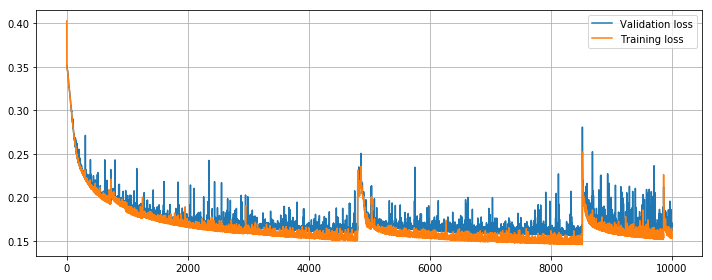

In [17]:
plt.figure(figsize=(10,4))
plt.plot(autoencoder.history.history['val_loss'], label='Validation loss')
plt.plot(autoencoder.history.history['loss'], label='Training loss')
plt.legend()
plt.grid()
plt.tight_layout()

In [13]:
autoencoder.load_weights(weight_path)

In [14]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [15]:
code = encoder.predict([VL_encoded, VH_encoded])

le = LabelEncoder().fit(animals_mask)
labels = le.transform(animals_mask)

unique_labels = np.unique(labels)

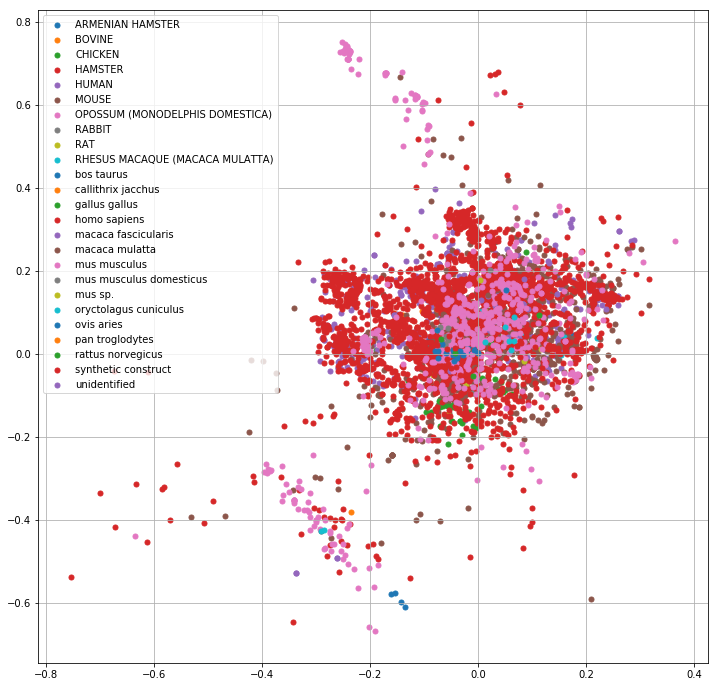

In [16]:
plt.figure(figsize=(12,12))
for x in range(unique_labels.size):
    mask_labels = labels == unique_labels[x]
    plt.scatter(code[mask_labels,0], code[mask_labels,1], marker='.', label=le.classes_[x], s=100)
plt.legend()
plt.grid()

In [17]:
from abpytools import FabCollection, ChainCollection
import pandas as pd

combinations = pd.read_csv('/home/gil/PhD/UCB/precollection/random_pairs.txt', index_col=0, delimiter=', ')

heavy_chains = ChainCollection.load_from_json(path='/home/gil/PhD/UCB/CombinationData/AbFiles/heavy_chains.json')
light_chains = ChainCollection.load_from_json(path='/home/gil/PhD/UCB/CombinationData/AbFiles/light_chains.json')

heavy_chains_list=[]
light_chains_list=[]

for heavy, light in  combinations['Random Pairs'].str.split('-'):
    heavy_chains_list.append(heavy_chains.get_object(heavy))
    light_chains_list.append(light_chains.get_object(light))    
    
fab_collection = FabCollection(None, heavy_chains_list, light_chains_list,
                               names=['P' + str(x) for x in combinations.index.tolist()])

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

VL_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Light'].values]
VH_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Heavy'].values]

VH_data_encoded = encode_sequences(VH_data, VH_LENGTH, DATASETS)
VL_data_encoded = encode_sequences(VL_data, VL_LENGTH, DATASETS)

VH_data_encoded = ss_VH.transform(VH_data_encoded)
VL_data_encoded = ss_VL.transform(VL_data_encoded)

code_1 = encoder.predict([VL_data_encoded, VH_data_encoded])

latent_data = pd.DataFrame(code_1, columns=['Latent{:d}'.format(x+1) for x in range(code_1.shape[1])], 
                           index=fab_collection.names)

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

data.dropna(axis=0, inplace=True, subset=[data.columns[0]])

data = data.join(latent_data)

data.head()

Loading in antibody objects


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list


,Tm D - Mean,Tm D - Std. Error,Tm2 - Mean,Tm2 - Std. Error,Latent1,Latent2,Latent3,Latent4,Latent5,Latent6,...,Latent11,Latent12,Latent13,Latent14,Latent15,Latent16,Latent17,Latent18,Latent19,Latent20
P2,64.473820,0.000000,NaN,NaN,-0.096144,0.199600,-0.214744,0.352004,0.045084,-0.584987,...,0.218141,-0.430422,-0.121115,0.662002,0.009845,-0.061315,0.101356,0.064956,0.217221,0.067870
P3,73.982970,0.130358,NaN,NaN,-0.126783,0.039719,-0.511410,0.212560,-0.059884,-0.585065,...,0.133462,-0.413384,-0.145334,0.475283,-0.074084,0.147323,-0.131484,-0.016373,0.289921,-0.010899
P4,64.326010,0.060344,NaN,NaN,-0.055047,0.028843,-0.381614,0.246174,0.140349,-0.306465,...,0.116244,-0.154558,0.141809,0.103023,-0.036422,-0.017363,0.085808,0.024081,0.316496,-0.008211
P6,74.192370,0.036953,NaN,NaN,0.189424,0.125945,0.007887,0.370701,0.194903,-0.267653,...,0.059661,0.044109,-0.057431,0.091790,0.277344,-0.158167,0.348788,-0.018512,0.258140,0.195713
P9,72.899025,0.085337,NaN,NaN,-0.056299,-0.002731,-0.255168,0.254477,0.180276,-0.186526,...,0.052480,0.023581,0.163528,-0.112450,0.054114,-0.030953,0.139372,0.066594,0.257076,0.047916


In [18]:
lambda_kappa = fab_collection.germline['Light']['Assignment'].apply(lambda x: 1 if x.startswith('IGL') else 0).values
lambda_kappa = lambda_kappa[[fab_collection.names.index(name) for name in data.index]]
heavy_germline = fab_collection.germline['Heavy']['Assignment'].apply(lambda x: int(x.split('-')[0][-1])).values
heavy_germline = heavy_germline[[fab_collection.names.index(name) for name in data.index]]

Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list



Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list



DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos


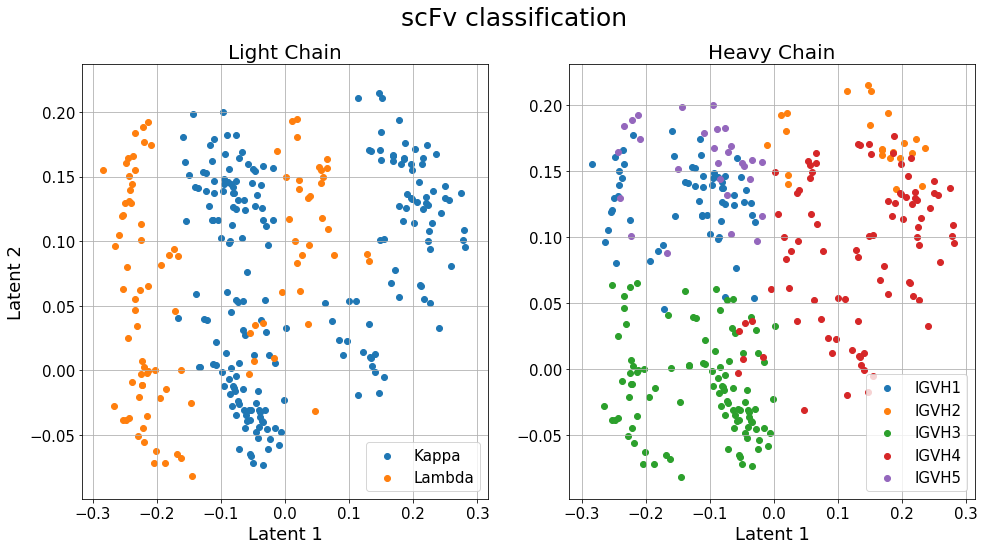

In [21]:
with sns.plotting_context(rc={"axes.titlesize":20,"axes.labelsize":18, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 15}):
    f, ax = plt.subplots(1,2,figsize=(16,8))
    for x in range(2):
        mask_labels = lambda_kappa == x
        if x == 0:
            label = 'Kappa'
        else:
            label = 'Lambda'
        ax[0].scatter(data['Latent1'].values[mask_labels], data['Latent2'].values[mask_labels], 
                    label=label)
    ax[0].legend()
    ax[0].grid()

    for x in np.unique(heavy_germline):
        mask_labels = heavy_germline == x
        ax[1].scatter(data['Latent1'].values[mask_labels], data['Latent2'].values[mask_labels], 
                    label='IGVH{}'.format(x))
    ax[1].legend()
    ax[1].grid()
    
    ax[0].set_title('Light Chain')
    ax[1].set_title('Heavy Chain')
    ax[0].set_xlabel("Latent 1")
    ax[1].set_xlabel("Latent 1")
    ax[0].set_ylabel("Latent 2")    
    
    f.suptitle("scFv classification", size=25)

DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe5a3139dd8>
DEBUG:Using auto colorbar locator on colorbar
DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe5a3139dd8>
DEBUG:Setting pcolormesh
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos


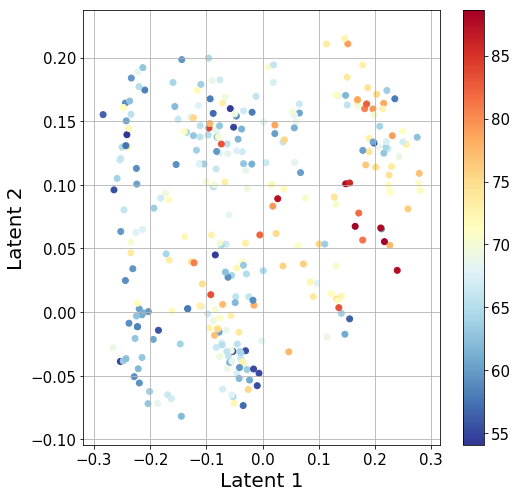

In [22]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 20}):
    plt.figure(figsize=(8,8))
    plt.scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
    plt.xlabel("Latent 1")
    plt.ylabel("Latent 2")
    plt.colorbar()
    plt.grid()
    plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [24]:
X_ = data[['Latent{:d}'.format(x+1) for x in range(code_1.shape[1])]].values
y_ = data['Tm D - Mean'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=1970)

In [31]:
rf = RandomForestRegressor(1000, max_features='sqrt',
                           max_depth=12, criterion="mse", 
                           min_samples_split=2)

rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
rf.score(X_test, y_test)

0.4075984487806187

In [33]:
rf.base_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos


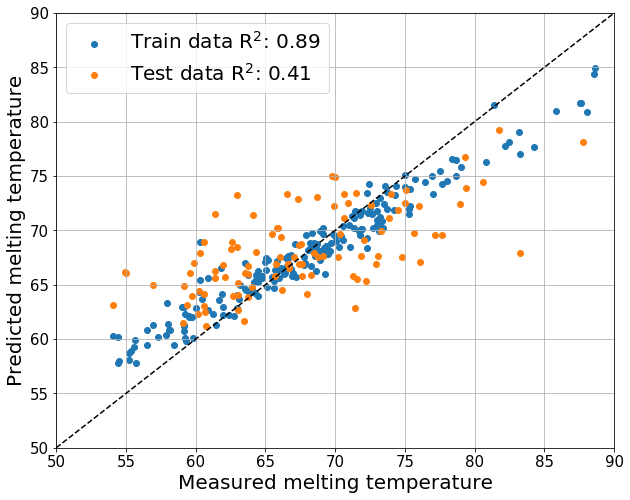

In [34]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 20}):
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    ax.scatter(y_train, rf.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_train, rf.predict(X_train))))
    ax.scatter(y_test, rf.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_test, rf.predict(X_test))))
    
    ax.plot([50, 90], [50, 90], linestyle='--',c='k')
    
    ax.set_ylim(50, 90)
    ax.set_xlim(50, 90)
    ax.legend()
    ax.set_ylabel('Predicted melting temperature')
    ax.set_xlabel('Measured melting temperature')
    ax.grid()

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos


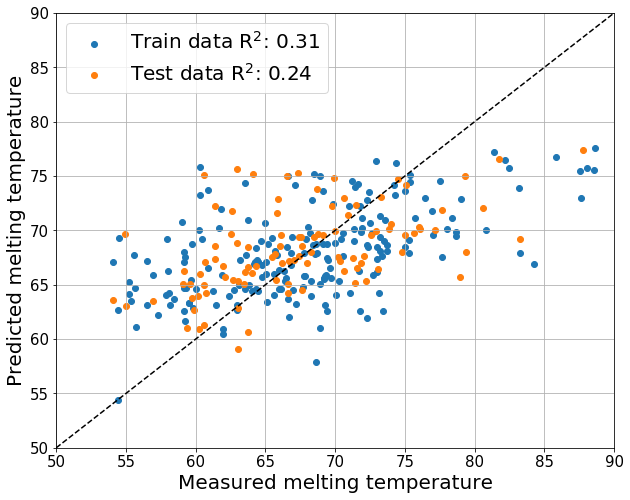

In [37]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 20}):
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    ax.scatter(y_train, lr.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_train, lr.predict(X_train))))
    ax.scatter(y_test, lr.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_test, lr.predict(X_test))))
    
    ax.plot([50, 90], [50, 90], linestyle='--',c='k')
    
    ax.set_ylim(50, 90)
    ax.set_xlim(50, 90)
    ax.legend()
    ax.set_ylabel('Predicted melting temperature')
    ax.set_xlabel('Measured melting temperature')
    ax.grid()

In [38]:
from bayes_opt import BayesianOptimization
import xgboost as xgb

In [39]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [40]:
def xgb_evaluate(max_depth, eta, gamma, subsample, colsample_bytree, reg_alpha, reg_lambda):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': 10 ** eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
              'reg_alpha':10**reg_alpha,
              'reg_lambda':10**reg_lambda,
              'silent': 1}
    cv_result = xgb.cv(params, dtrain, num_boost_round=1000, nfold=5, early_stopping_rounds=50)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return - cv_result['test-rmse-mean'].iloc[-1]

In [41]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 6),
                                             'eta': (-2, -1),
                                             'reg_alpha': (-5, 0),
                                             'reg_lambda': (-5, 0),
                                             'gamma': (0, 1),
                                             'subsample': (0.3, 1),
                                             'colsample_bytree': (0.3, 1)})

In [45]:
%%time
xgb_bo.maximize(init_points=10, n_iter=50)

Initialization
-----------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |       eta |     gamma |   max_depth |   reg_alpha |   reg_lambda |   subsample | 
    1 | 00m00s |   -7.27314 |             0.8949 |   -1.0057 |    0.7101 |      4.5612 |     -0.0955 |      -3.8476 |      0.8266 | 
    2 | 00m00s |   -6.97339 |             0.8451 |   -1.9935 |    0.6568 |      4.8301 |     -1.1589 |      -2.7086 |      0.3289 | 
    3 | 00m00s |   -6.79606 |             0.9989 |   -1.1526 |    0.1519 |      3.8966 |     -0.3035 |      -2.1309 |      0.3025 | 
    4 | 00m00s |   -7.07530 |             0.9473 |   -1.1885 |    0.8049 |      4.5705 |     -2.9931 |      -0.2273 |      0.3716 | 
    5 | 00m00s |   -7.24435 |             0.5433 |   -1.0291 |    0.8925 |      4.1560 |     -1.1451 |      -4.2899 |      0.4244 | 
    6 | 00m00s |   -7.03196 |             0.8536 |   -1

KeyboardInterrupt: 

In [42]:
result = xgb_bo.res['max']['max_params'].copy()
n_estimators=1000
max_depth=int(result.pop('max_depth'))
eta = 10 ** result.pop('eta')
reg_alpha = 10 ** result.pop('reg_alpha')
reg_lambda = 10 ** result.pop('reg_lambda')

AttributeError: 'NoneType' object has no attribute 'copy'

In [43]:
result, eta, reg_alpha, reg_lambda, max_depth

NameError: name 'result' is not defined

In [73]:
xgb_model = xgb.sklearn.XGBRegressor(subsample=0.75, 
                                     colsample_bytree=0.8,
                                     n_estimators=250,
                                     max_depth=4, 
                                     eta=0.1,
                                     reg_lambda=0.01,
                                     reg_alpha=0.0001)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.3917502081672204

DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos


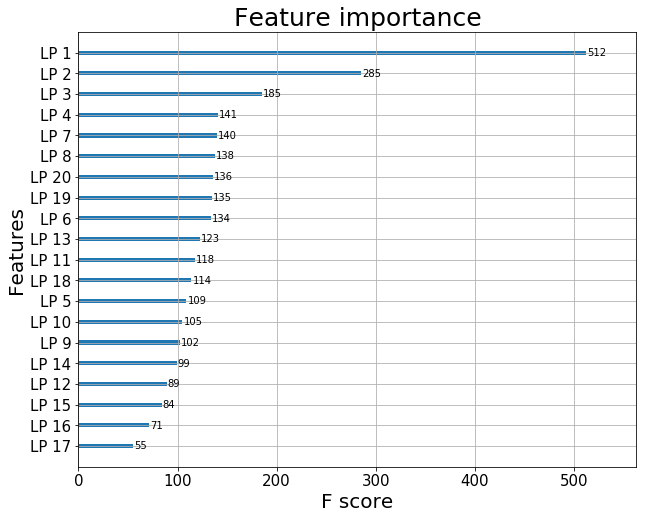

In [74]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 20}):
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    xgb.plot_importance(xgb_model, ax=ax)
    ax.set_yticklabels([f"LP {int(x.get_text()[1:]) + 1}" for x in ax.get_yticklabels()])

DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos


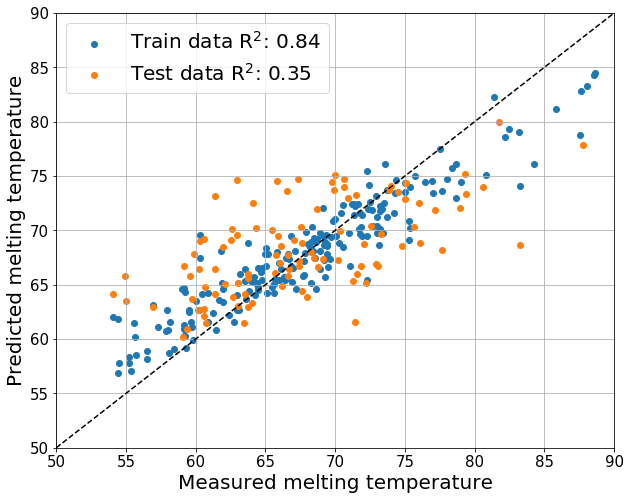

In [75]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 20}):
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    xgb_model = xgb.sklearn.XGBRegressor(subsample=0.75, 
                                         n_estimators=100,
                                         max_depth=3, 
                                         eta=0.1,
                                         reg_lambda=1,
                                         reg_alpha=10)
    xgb_model.fit(X_train, y_train)
    
    ax.scatter(y_train, xgb_model.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_train, xgb_model.predict(X_train))))
    ax.scatter(y_test, xgb_model.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_test, xgb_model.predict(X_test))))
    
    ax.plot([50, 90], [50, 90], linestyle='--',c='k')
    
    ax.set_ylim(50, 90)
    ax.set_xlim(50, 90)
    ax.legend()
    ax.set_ylabel('Predicted melting temperature')
    ax.set_xlabel('Measured melting temperature')
    ax.grid()

In [76]:
import keras

In [77]:
nn_net = keras.Sequential()
nn_net.add(keras.layers.Dense(20, input_shape=(X_train.shape[1],)))
nn_net.add(keras.layers.LeakyReLU())
nn_net.add(keras.layers.Dense(10))
# nn_net.add(keras.layers.LeakyReLU())
nn_net.add(keras.layers.Dense(1))

nn_net.compile('rmsprop', 'mse')

In [78]:
nn_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [79]:
nn_net.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
203/203 [==============================] - 0s 2ms/step - loss: 4588.9286
Epoch 2/1000
203/203 [==============================] - 0s 80us/step - loss: 4538.1256
Epoch 3/1000
203/203 [==============================] - 0s 67us/step - loss: 4492.3944
Epoch 4/1000
203/203 [==============================] - 0s 91us/step - loss: 4444.0507
Epoch 5/1000
203/203 [==============================] - 0s 53us/step - loss: 4393.0551
Epoch 6/1000
203/203 [==============================] - 0s 94us/step - loss: 4337.7765
Epoch 7/1000
203/203 [==============================] - 0s 75us/step - loss: 4278.2715
Epoch 8/1000
203/203 [==============================] - 0s 109us/step - loss: 4214.4366
Epoch 9/1000
203/203 [==============================] - 0s 76us/step - loss: 4143.1929
Epoch 10/1000
203/203 [==============================] - 0s 116us/step - loss: 4067.0772
Epoch 11/1000
203/203 [==============================] - 0s 79us/step - loss: 3984.7155
Epoch 12/1000
203/203 [=================

203/203 [==============================] - 0s 72us/step - loss: 66.5782
Epoch 96/1000
203/203 [==============================] - 0s 63us/step - loss: 64.9690
Epoch 97/1000
203/203 [==============================] - 0s 54us/step - loss: 63.5447
Epoch 98/1000
203/203 [==============================] - 0s 49us/step - loss: 62.5129
Epoch 99/1000
203/203 [==============================] - 0s 53us/step - loss: 61.8920
Epoch 100/1000
203/203 [==============================] - 0s 55us/step - loss: 59.9817
Epoch 101/1000
203/203 [==============================] - 0s 48us/step - loss: 59.0237
Epoch 102/1000
203/203 [==============================] - 0s 44us/step - loss: 58.3050
Epoch 103/1000
203/203 [==============================] - 0s 43us/step - loss: 56.7396
Epoch 104/1000
203/203 [==============================] - 0s 82us/step - loss: 56.2295
Epoch 105/1000
203/203 [==============================] - 0s 53us/step - loss: 54.9526
Epoch 106/1000
203/203 [==============================] - 0s 5

203/203 [==============================] - 0s 46us/step - loss: 45.5996
Epoch 190/1000
203/203 [==============================] - 0s 59us/step - loss: 45.5552
Epoch 191/1000
203/203 [==============================] - 0s 52us/step - loss: 45.2549
Epoch 192/1000
203/203 [==============================] - 0s 51us/step - loss: 45.7302
Epoch 193/1000
203/203 [==============================] - 0s 50us/step - loss: 45.4911
Epoch 194/1000
203/203 [==============================] - 0s 56us/step - loss: 45.3409
Epoch 195/1000
203/203 [==============================] - 0s 53us/step - loss: 45.7138
Epoch 196/1000
203/203 [==============================] - 0s 66us/step - loss: 45.7294
Epoch 197/1000
203/203 [==============================] - 0s 63us/step - loss: 45.5179
Epoch 198/1000
203/203 [==============================] - 0s 52us/step - loss: 45.5235
Epoch 199/1000
203/203 [==============================] - 0s 49us/step - loss: 45.4938
Epoch 200/1000
203/203 [==============================] - 

203/203 [==============================] - 0s 41us/step - loss: 44.3331
Epoch 284/1000
203/203 [==============================] - 0s 53us/step - loss: 44.6262
Epoch 285/1000
203/203 [==============================] - 0s 64us/step - loss: 44.1841
Epoch 286/1000
203/203 [==============================] - 0s 45us/step - loss: 44.2104
Epoch 287/1000
203/203 [==============================] - 0s 54us/step - loss: 44.4483
Epoch 288/1000
203/203 [==============================] - 0s 46us/step - loss: 44.4023
Epoch 289/1000
203/203 [==============================] - 0s 49us/step - loss: 44.2031
Epoch 290/1000
203/203 [==============================] - 0s 62us/step - loss: 44.6822
Epoch 291/1000
203/203 [==============================] - 0s 51us/step - loss: 44.4805
Epoch 292/1000
203/203 [==============================] - 0s 44us/step - loss: 44.3244
Epoch 293/1000
203/203 [==============================] - 0s 51us/step - loss: 44.4247
Epoch 294/1000
203/203 [==============================] - 

203/203 [==============================] - 0s 51us/step - loss: 43.5568
Epoch 378/1000
203/203 [==============================] - 0s 64us/step - loss: 43.7517
Epoch 379/1000
203/203 [==============================] - 0s 52us/step - loss: 43.5332
Epoch 380/1000
203/203 [==============================] - 0s 50us/step - loss: 44.1133
Epoch 381/1000
203/203 [==============================] - 0s 51us/step - loss: 43.9718
Epoch 382/1000
203/203 [==============================] - 0s 55us/step - loss: 43.5212
Epoch 383/1000
203/203 [==============================] - 0s 51us/step - loss: 43.5737
Epoch 384/1000
203/203 [==============================] - 0s 68us/step - loss: 44.3802
Epoch 385/1000
203/203 [==============================] - 0s 58us/step - loss: 43.6560
Epoch 386/1000
203/203 [==============================] - 0s 61us/step - loss: 43.7371
Epoch 387/1000
203/203 [==============================] - 0s 55us/step - loss: 43.8839
Epoch 388/1000
203/203 [==============================] - 

203/203 [==============================] - 0s 50us/step - loss: 43.2393
Epoch 472/1000
203/203 [==============================] - 0s 46us/step - loss: 43.3470
Epoch 473/1000
203/203 [==============================] - 0s 51us/step - loss: 43.2615
Epoch 474/1000
203/203 [==============================] - 0s 50us/step - loss: 43.3557
Epoch 475/1000
203/203 [==============================] - 0s 42us/step - loss: 43.7574
Epoch 476/1000
203/203 [==============================] - 0s 59us/step - loss: 43.1671
Epoch 477/1000
203/203 [==============================] - 0s 53us/step - loss: 43.0315
Epoch 478/1000
203/203 [==============================] - 0s 47us/step - loss: 43.1929
Epoch 479/1000
203/203 [==============================] - 0s 58us/step - loss: 43.4097
Epoch 480/1000
203/203 [==============================] - 0s 62us/step - loss: 43.3603
Epoch 481/1000
203/203 [==============================] - 0s 58us/step - loss: 42.9021
Epoch 482/1000
203/203 [==============================] - 

203/203 [==============================] - 0s 55us/step - loss: 42.8639
Epoch 566/1000
203/203 [==============================] - 0s 46us/step - loss: 43.0724
Epoch 567/1000
203/203 [==============================] - 0s 60us/step - loss: 42.7733
Epoch 568/1000
203/203 [==============================] - 0s 57us/step - loss: 43.3116
Epoch 569/1000
203/203 [==============================] - 0s 45us/step - loss: 43.0121
Epoch 570/1000
203/203 [==============================] - 0s 51us/step - loss: 43.0485
Epoch 571/1000
203/203 [==============================] - 0s 57us/step - loss: 42.6083
Epoch 572/1000
203/203 [==============================] - 0s 47us/step - loss: 42.8775
Epoch 573/1000
203/203 [==============================] - 0s 49us/step - loss: 43.0695
Epoch 574/1000
203/203 [==============================] - 0s 58us/step - loss: 42.8870
Epoch 575/1000
203/203 [==============================] - 0s 44us/step - loss: 42.7961
Epoch 576/1000
203/203 [==============================] - 

203/203 [==============================] - 0s 56us/step - loss: 42.8025
Epoch 660/1000
203/203 [==============================] - 0s 68us/step - loss: 42.5367
Epoch 661/1000
203/203 [==============================] - 0s 70us/step - loss: 42.4945
Epoch 662/1000
203/203 [==============================] - 0s 58us/step - loss: 42.5967
Epoch 663/1000
203/203 [==============================] - 0s 42us/step - loss: 42.5802
Epoch 664/1000
203/203 [==============================] - 0s 57us/step - loss: 42.3905
Epoch 665/1000
203/203 [==============================] - 0s 49us/step - loss: 42.6755
Epoch 666/1000
203/203 [==============================] - 0s 44us/step - loss: 42.7913
Epoch 667/1000
203/203 [==============================] - 0s 60us/step - loss: 42.3655
Epoch 668/1000
203/203 [==============================] - 0s 53us/step - loss: 42.7734
Epoch 669/1000
203/203 [==============================] - 0s 42us/step - loss: 42.9129
Epoch 670/1000
203/203 [==============================] - 

203/203 [==============================] - 0s 53us/step - loss: 42.6082
Epoch 754/1000
203/203 [==============================] - 0s 47us/step - loss: 42.8426
Epoch 755/1000
203/203 [==============================] - 0s 53us/step - loss: 42.4132
Epoch 756/1000
203/203 [==============================] - 0s 65us/step - loss: 42.2660
Epoch 757/1000
203/203 [==============================] - 0s 44us/step - loss: 42.4541
Epoch 758/1000
203/203 [==============================] - 0s 62us/step - loss: 42.3794
Epoch 759/1000
203/203 [==============================] - 0s 64us/step - loss: 42.9833
Epoch 760/1000
203/203 [==============================] - 0s 64us/step - loss: 42.2535
Epoch 761/1000
203/203 [==============================] - 0s 43us/step - loss: 42.3193
Epoch 762/1000
203/203 [==============================] - 0s 64us/step - loss: 42.1083
Epoch 763/1000
203/203 [==============================] - 0s 57us/step - loss: 42.1244
Epoch 764/1000
203/203 [==============================] - 

203/203 [==============================] - 0s 53us/step - loss: 42.2009
Epoch 848/1000
203/203 [==============================] - 0s 45us/step - loss: 42.0202
Epoch 849/1000
203/203 [==============================] - 0s 50us/step - loss: 42.7503
Epoch 850/1000
203/203 [==============================] - 0s 48us/step - loss: 42.0181
Epoch 851/1000
203/203 [==============================] - 0s 47us/step - loss: 41.7672
Epoch 852/1000
203/203 [==============================] - 0s 63us/step - loss: 42.1346
Epoch 853/1000
203/203 [==============================] - 0s 43us/step - loss: 41.9994
Epoch 854/1000
203/203 [==============================] - 0s 53us/step - loss: 42.3095
Epoch 855/1000
203/203 [==============================] - 0s 59us/step - loss: 42.0275
Epoch 856/1000
203/203 [==============================] - 0s 46us/step - loss: 42.1932
Epoch 857/1000
203/203 [==============================] - 0s 59us/step - loss: 42.6048
Epoch 858/1000
203/203 [==============================] - 

203/203 [==============================] - 0s 48us/step - loss: 42.5054
Epoch 942/1000
203/203 [==============================] - 0s 66us/step - loss: 41.6973
Epoch 943/1000
203/203 [==============================] - 0s 52us/step - loss: 41.8968
Epoch 944/1000
203/203 [==============================] - 0s 117us/step - loss: 42.0133
Epoch 945/1000
203/203 [==============================] - 0s 56us/step - loss: 41.8233
Epoch 946/1000
203/203 [==============================] - 0s 56us/step - loss: 42.0185
Epoch 947/1000
203/203 [==============================] - 0s 52us/step - loss: 42.0511
Epoch 948/1000
203/203 [==============================] - 0s 51us/step - loss: 41.7470
Epoch 949/1000
203/203 [==============================] - 0s 73us/step - loss: 42.1190
Epoch 950/1000
203/203 [==============================] - 0s 61us/step - loss: 42.0200
Epoch 951/1000
203/203 [==============================] - 0s 48us/step - loss: 41.7275
Epoch 952/1000
203/203 [==============================] -

DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos


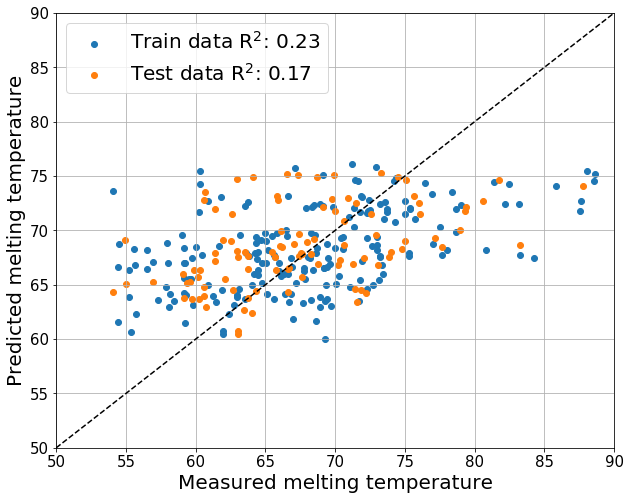

In [80]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 20}):
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    ax.scatter(y_train, nn_net.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_train, nn_net.predict(X_train))))
    ax.scatter(y_test, nn_net.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_test, nn_net.predict(X_test))))
    
    ax.plot([50, 90], [50, 90], linestyle='--',c='k')
    
    ax.set_ylim(50, 90)
    ax.set_xlim(50, 90)
    ax.legend()
    ax.set_ylabel('Predicted melting temperature')
    ax.set_xlabel('Measured melting temperature')
    ax.grid()

DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos


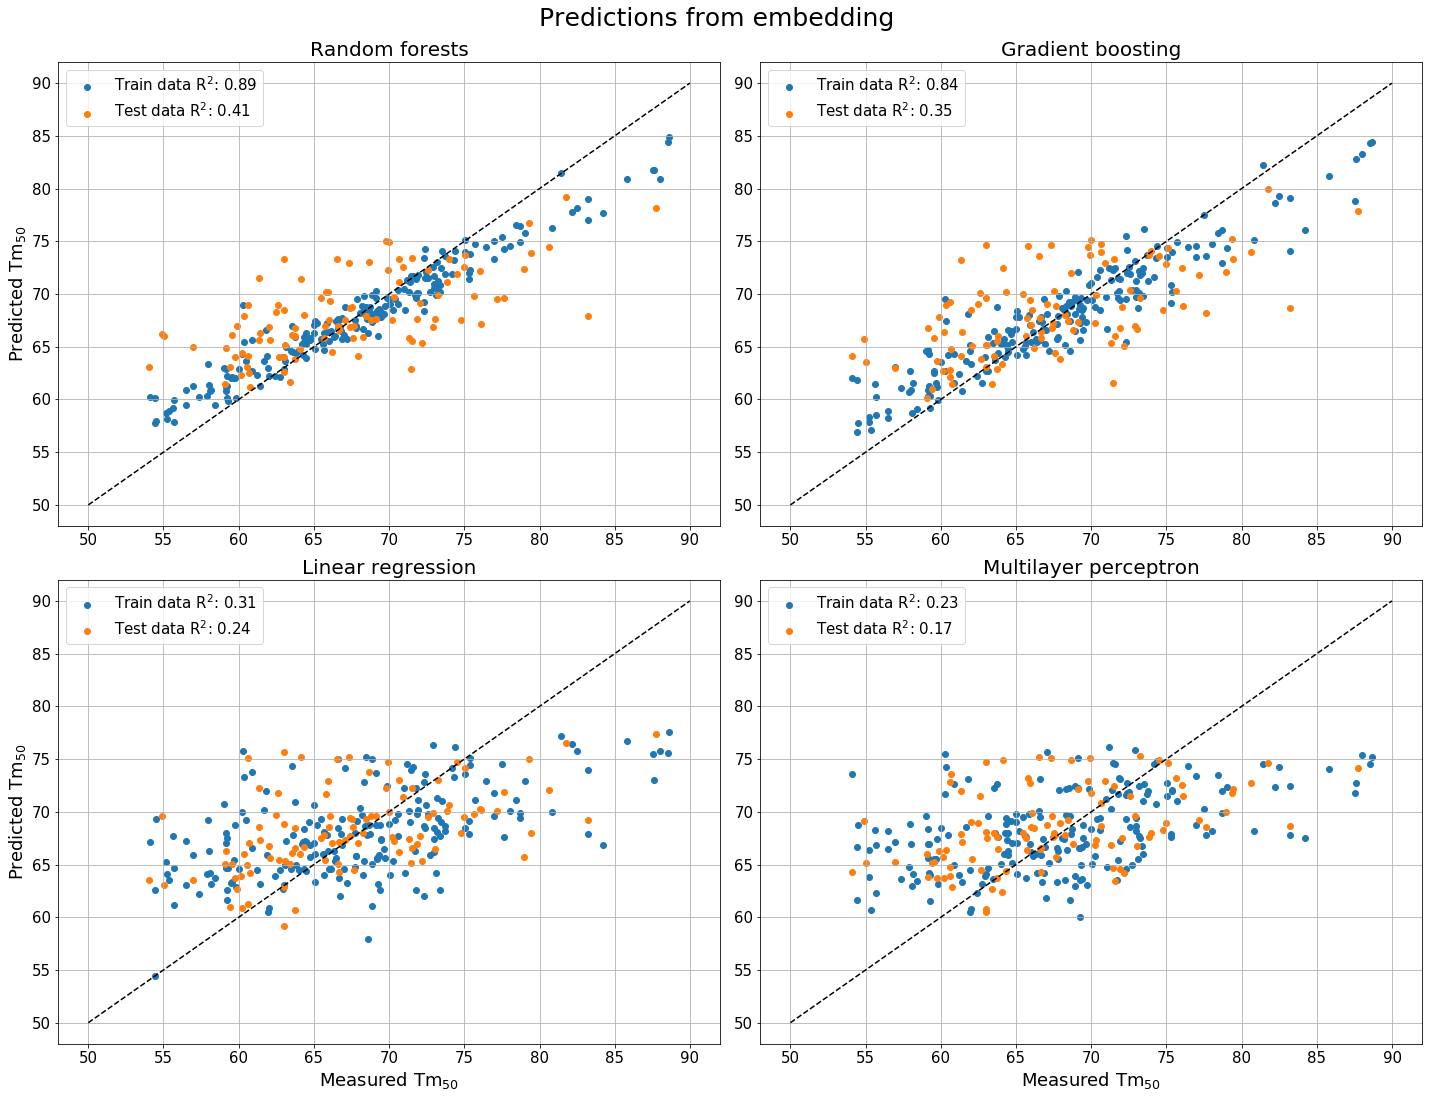

In [81]:
with sns.plotting_context(rc={"axes.titlesize":20,"axes.labelsize":18, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 15}):
    f, ax = plt.subplots(2, 2, figsize=(20, 16))
    ax = ax.flatten()
    
    ax[0].scatter(y_train, rf.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_train, rf.predict(X_train))))
    ax[0].scatter(y_test, rf.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_test, rf.predict(X_test))))
    ax[0].plot([50, 90], [50, 90], linestyle='--',c='k')
    ax[0].set_title("Random forests")
    ax[0].set_ylabel("Predicted Tm$_{50}$")
    ax[0].legend()    
    
    ax[1].scatter(y_train, xgb_model.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_train, xgb_model.predict(X_train))))
    ax[1].scatter(y_test, xgb_model.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_test, xgb_model.predict(X_test))))
    ax[1].plot([50, 90], [50, 90], linestyle='--',c='k')
    ax[1].set_title("Gradient boosting")
    ax[1].legend()    
    
    ax[2].scatter(y_train, lr.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_train, lr.predict(X_train))))
    ax[2].scatter(y_test, lr.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_test, lr.predict(X_test))))
    ax[2].plot([50, 90], [50, 90], linestyle='--',c='k')
    ax[2].set_title("Linear regression")
    ax[2].set_ylabel("Predicted Tm$_{50}$")
    ax[2].set_xlabel("Measured Tm$_{50}$")
    ax[2].legend()    
    
    
    ax[3].scatter(y_train, nn_net.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_train, nn_net.predict(X_train))))
    ax[3].scatter(y_test, nn_net.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_test, nn_net.predict(X_test))))
    ax[3].plot([50, 90], [50, 90], linestyle='--',c='k')
    ax[3].set_title("Multilayer perceptron")
    ax[3].set_xlabel("Measured Tm$_{50}$")
    ax[3].legend()    
    
    ax[0].grid()
    ax[1].grid()    
    ax[2].grid()    
    ax[3].grid()
    
    f.suptitle("Predictions from embedding", size=25)
    f.tight_layout(rect=[0, 0.03, 1, 0.96])

In [91]:
(np.mean((y_test - rf.predict(X_test)) ** 2)) ** .5

5.039841885997117

In [ ]:
(np.mean((y_train - rf.predict(X_train)) ** 2)) ** .5

In [82]:
import sklearn
from sklearn.svm import LinearSVR, SVR
from bayes_opt import BayesianOptimization

In [83]:
 sklearn.model_selection.cross_val_score(LinearSVR(), 
                                                        X_train,
                                                        y_train,
                                                        scoring='neg_mean_squared_error', 
                                                        cv=5)

array([-54.36901336, -57.54165241, -58.51931301, -89.73103424,
       -49.4239709 ])

In [84]:
def lsvr_evaluate(C, epsilon):
    params = {'C': C,
              'epsilon': 10**epsilon}
    
    cv_result = sklearn.model_selection.cross_val_score(LinearSVR(**params, max_iter=10000), 
                                                        X_train,
                                                        y_train,
                                                        scoring='neg_mean_squared_error', 
                                                        cv=5)    
    return -((-cv_result)**.5).mean()

In [66]:
xgb_bo = BayesianOptimization(lsvr_evaluate, {'C': (0.1, 100),
                                             'epsilon': (-10, 1)})
xgb_bo.maximize(init_points=10,n_iter=100)

Initialization
-----------------------------------------------------
 Step |   Time |      Value |         C |   epsilon | 
    1 | 00m00s |   -6.77749 |   60.9749 |   -8.5419 | 
    2 | 00m00s |   -6.69901 |   66.2584 |   -0.2431 | 
    3 | 00m00s |   -6.71046 |   89.5215 |   -1.0455 | 
    4 | 00m00s |   -6.78372 |   16.0505 |   -7.5750 | 
    5 | 00m00s |   -6.76745 |   65.5389 |   -6.1858 | 
    6 | 00m00s |   -6.80080 |   30.3070 |   -2.3608 | 
    7 | 00m00s |   -6.80493 |   28.4422 |   -6.7682 | 
    8 | 00m00s |   -6.79245 |   47.0961 |   -2.1124 | 
    9 | 00m00s |   -6.80086 |   22.0876 |   -6.0675 | 
   10 | 00m00s |   -6.77637 |    7.5050 |   -5.9722 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         C |   epsilon | 
   11 | 00m01s |   -6.63191 |  100.0000 |    1.0000 | 
   12 | 00m01s |   -6.68873 |  100.0000 |  -10.0000 | 
   13 | 00m01s |  -12.96906 |    0.2464 |   -9.8965 | 
   14 | 00m00s |   -6.94591 | 

/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-6.19262187e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 4, 'warnflag': 2}
  ConvergenceWarning)


   78 | 00m02s |   -6.63957 |   87.3199 |    1.0000 | 
   79 | 00m02s |   -6.71940 |   83.9072 |   -6.7848 | 
   80 | 00m02s |   -6.70145 |   91.8738 |  -10.0000 | 
   81 | 00m02s |   -6.66966 |   98.6006 |    0.9893 | 
   82 | 00m02s |   -6.74303 |   36.0366 |    1.0000 | 
   83 | 00m02s |   -6.65377 |   91.0500 |    0.9922 | 
   84 | 00m02s |   -6.72174 |  100.0000 |   -0.6430 | 
   85 | 00m02s |   -6.66264 |   83.6569 |    0.9881 | 
   86 | 00m02s |   -6.64289 |   80.2595 |    1.0000 | 
   87 | 00m02s |   -6.79244 |   37.6395 |  -10.0000 | 
   88 | 00m02s |   -6.78701 |   51.8384 |   -2.1154 | 
   89 | 00m02s |   -6.80394 |   25.2241 |   -3.0407 | 
   90 | 00m02s |   -6.70577 |   90.5016 |   -4.6446 | 
   91 | 00m02s |   -6.74068 |   73.4299 |   -1.0106 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-6.34870739e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


   92 | 00m02s |   -6.76936 |   64.4684 |   -2.8609 | 
   93 | 00m02s |   -6.70971 |   93.4303 |   -1.2454 | 
   94 | 00m02s |   -6.75185 |   71.3986 |   -7.0132 | 
   95 | 00m02s |   -6.69549 |   97.3555 |  -10.0000 | 
   96 | 00m02s |   -6.64828 |   76.6852 |    0.9985 | 
   97 | 00m02s |   -6.78401 |    8.6060 |   -4.9242 | 
   98 | 00m02s |   -6.79017 |   14.2978 |   -2.7599 | 
   99 | 00m02s |   -6.66217 |   70.2396 |    1.0000 | 
  100 | 00m02s |   -6.77688 |   60.2735 |  -10.0000 | 
  101 | 00m02s |   -6.72207 |   81.5000 |   -9.9991 | 
  102 | 00m02s |   -6.78961 |   40.8765 |   -1.7503 | 
  103 | 00m02s |   -6.69290 |   95.9154 |    0.9846 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00026154]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 6, 'warnflag': 2}
  ConvergenceWarning)


  104 | 00m02s |   -6.78246 |   58.1968 |   -6.1407 | 
  105 | 00m02s |   -6.84324 |   14.8791 |    1.0000 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00141469]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 6, 'warnflag': 2}
  ConvergenceWarning)


  106 | 00m02s |   -6.79317 |   34.6372 |   -2.3490 | 
  107 | 00m02s |   -6.79036 |   46.1349 |   -5.8354 | 
  108 | 00m02s |   -6.78839 |   13.9354 |   -5.6982 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00024258]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


  109 | 00m02s |   -6.80006 |   21.5926 |   -2.1720 | 
  110 | 00m02s |   -6.78521 |   53.5956 |   -7.1131 | 


In [74]:
def svr_evaluate(C, epsilon, degree):
    params = {'C': C,
              'epsilon': 10**epsilon,
              'degree': int(degree)}
    
    cv_result = sklearn.model_selection.cross_val_score(SVR(**params, kernel='poly', gamma='auto', max_iter=10000), 
                                                        X_train,
                                                        y_train,
                                                        scoring='neg_mean_squared_error', 
                                                        cv=5)    
    return -((-cv_result)**.5).mean()

In [76]:
svr_bo = BayesianOptimization(svr_evaluate, {'C': (0.1, 100),
                                             'epsilon': (-10, 1),
                                             'degree': (1,4)})
svr_bo.maximize(init_points=25,n_iter=100)

Initialization
-----------------------------------------------------------------
 Step |   Time |      Value |         C |    degree |   epsilon | 
    1 | 00m00s |   -6.76183 |   59.0509 |    1.5980 |   -5.0776 | 
    2 | 00m00s |   -7.30912 |   54.1077 |    3.2272 |   -9.2101 | 
    3 | 00m00s |   -7.08973 |   24.9934 |    2.1234 |   -2.2346 | 
    4 | 00m00s |   -6.76811 |   42.7866 |    1.9693 |   -9.9878 | 
    5 | 00m00s |   -6.90407 |   67.7900 |    2.0797 |   -1.6690 | 
    6 | 00m00s |   -6.78491 |   24.0263 |    1.8374 |   -8.9225 | 
    7 | 00m00s |   -7.27543 |   77.9501 |    3.8276 |   -9.9438 | 
    8 | 00m00s |   -7.27431 |   78.7540 |    3.1814 |   -5.4123 | 
    9 | 00m00s |   -6.75976 |   74.7741 |    1.2085 |   -8.5136 | 
   10 | 00m00s |   -6.76185 |   66.6927 |    1.8796 |   -5.1782 | 
   11 | 00m00s |   -6.88700 |   73.6355 |    2.8204 |   -7.1768 | 
   12 | 00m00s |   -7.05176 |   29.3295 |    2.9556 |   -0.3581 | 
   13 | 00m00s |   -6.76159 |   67.4962 |    1.8

/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-7.73584288e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 3, 'warnflag': 2}
  ConvergenceWarning)


   34 | 00m02s |   -6.76215 |   69.3940 |    1.0000 |  -10.0000 | 
   35 | 00m02s |   -6.89762 |   77.0675 |    1.0000 |    1.0000 | 
   36 | 00m02s |   -7.13300 |   10.1260 |    1.0000 |    1.0000 | 
   37 | 00m02s |   -6.76669 |   47.8397 |    1.0000 |  -10.0000 | 
   38 | 00m02s |   -6.76197 |   71.2226 |    1.0000 |   -3.9636 | 
   39 | 00m02s |   -6.73871 |  100.0000 |    1.0000 |  -10.0000 | 
   40 | 00m02s |   -7.36994 |   20.0199 |    4.0000 |  -10.0000 | 
   41 | 00m02s |   -6.76014 |   64.1546 |    1.0000 |   -2.9106 | 
   42 | 00m02s |   -7.39346 |  100.0000 |    4.0000 |    1.0000 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-6.30928338e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 6, 'warnflag': 2}
  ConvergenceWarning)


   43 | 00m02s |   -6.75687 |   89.9066 |    1.0000 |  -10.0000 | 
   44 | 00m02s |   -6.91077 |    7.3015 |    1.0000 |  -10.0000 | 
   45 | 00m02s |   -7.36180 |    0.1000 |    1.0000 |  -10.0000 | 
   46 | 00m02s |   -6.94436 |   28.9016 |    1.0000 |    1.0000 | 
   47 | 00m02s |   -6.76313 |   55.2660 |    1.0000 |   -3.0191 | 
   48 | 00m02s |   -6.87993 |   92.0923 |    1.0000 |    1.0000 | 
   49 | 00m02s |   -6.78010 |   26.4041 |    1.0000 |  -10.0000 | 
   50 | 00m02s |   -6.76835 |   37.5166 |    1.0000 |  -10.0000 | 
   51 | 00m02s |   -6.91429 |   45.6843 |    1.0000 |    1.0000 | 
   52 | 00m02s |   -6.78286 |   19.8831 |    1.0000 |   -6.2661 | 
   53 | 00m02s |   -6.90447 |   54.0634 |    1.0000 |    1.0000 | 
   54 | 00m02s |   -7.39533 |   35.0062 |    4.0000 |    1.0000 | 
   55 | 00m02s |   -6.78762 |   21.3972 |    1.0000 |  -10.0000 | 
   56 | 00m02s |   -6.76223 |   58.2546 |    1.0000 |  -10.0000 | 
   57 | 00m02s |   -6.76244 |   67.6996 |    1.0000 |   -3.504

/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00035318]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


   58 | 00m01s |   -7.39582 |   15.8872 |    4.0000 |    1.0000 | 
   59 | 00m01s |   -6.75891 |   84.4653 |    1.0000 |  -10.0000 | 
   60 | 00m01s |   -7.36891 |   31.0216 |    4.0000 |  -10.0000 | 
   61 | 00m02s |   -6.90297 |   72.5273 |    1.0000 |    1.0000 | 
   62 | 00m01s |   -7.36365 |   88.0052 |    4.0000 |  -10.0000 | 
   63 | 00m02s |   -6.90777 |   66.3174 |    1.0000 |    1.0000 | 
   64 | 00m01s |   -7.39347 |    0.1000 |    1.0000 |    1.0000 | 
   65 | 00m02s |   -7.37107 |    8.2503 |    4.0000 |   -5.7877 | 
   66 | 00m02s |   -7.39497 |   49.1572 |    4.0000 |    1.0000 | 
   67 | 00m01s |   -6.77599 |   30.8867 |    1.0000 |   -4.9679 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00012883]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 8, 'warnflag': 2}
  ConvergenceWarning)


   68 | 00m02s |   -6.74858 |   94.5862 |    1.0000 |  -10.0000 | 
   69 | 00m02s |   -6.76428 |   49.5092 |    1.0000 |   -3.9636 | 
   70 | 00m02s |   -6.78392 |   24.7786 |    1.0000 |   -6.5566 | 
   71 | 00m02s |   -7.39400 |   81.8837 |    4.0000 |    1.0000 | 
   72 | 00m02s |   -6.75748 |   75.6197 |    1.0000 |   -4.0725 | 
   73 | 00m02s |   -7.36521 |   70.9273 |    4.0000 |  -10.0000 | 
   74 | 00m02s |   -6.76845 |   43.5159 |    1.0000 |  -10.0000 | 
   75 | 00m02s |   -6.76396 |   52.1160 |    1.0000 |  -10.0000 | 
   76 | 00m02s |   -6.75696 |   79.9581 |    1.0000 |  -10.0000 | 
   77 | 00m02s |   -6.80722 |   14.1142 |    1.0000 |   -4.9408 | 
   78 | 00m02s |   -7.00348 |   17.4251 |    1.0000 |    1.0000 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00053177]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 4, 'warnflag': 2}
  ConvergenceWarning)


   79 | 00m02s |   -6.76018 |   62.9302 |    1.0000 |  -10.0000 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00026743]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 3, 'warnflag': 2}
  ConvergenceWarning)


   80 | 00m02s |   -6.76329 |   55.8764 |    1.0000 |   -6.4927 | 
   81 | 00m02s |   -6.92476 |   33.8218 |    1.0000 |    1.0000 | 
   82 | 00m02s |   -6.91116 |    7.2915 |    1.0000 |   -5.3599 | 
   83 | 00m02s |   -6.76392 |   51.9691 |    1.0000 |   -3.4946 | 
   84 | 00m02s |   -6.76604 |   40.5636 |    1.0000 |  -10.0000 | 
   85 | 00m02s |   -6.76131 |   73.5302 |    1.0000 |   -6.1990 | 
   86 | 00m02s |   -6.76140 |   73.4232 |    1.0000 |  -10.0000 | 
   87 | 00m02s |   -6.76138 |   65.9841 |    1.0000 |  -10.0000 | 
   88 | 00m02s |   -6.76181 |   58.9056 |    1.0000 |   -3.2446 | 
   89 | 00m02s |   -6.76051 |   62.1133 |    1.0000 |   -6.2531 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([9.56679887e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 6, 'warnflag': 2}
  ConvergenceWarning)


   90 | 00m02s |   -6.89282 |   80.9548 |    1.0000 |    1.0000 | 
   91 | 00m02s |   -7.36810 |   39.8183 |    4.0000 |  -10.0000 | 
   92 | 00m02s |   -6.77290 |   35.0480 |    1.0000 |   -5.0175 | 
   93 | 00m02s |   -7.39556 |   25.9560 |    4.0000 |    1.0000 | 
   94 | 00m02s |   -7.36256 |  100.0000 |    4.0000 |  -10.0000 | 
   95 | 00m02s |   -6.73871 |  100.0000 |    1.0000 |   -5.1184 | 
   96 | 00m02s |   -6.75233 |   93.0534 |    1.0000 |   -5.1077 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00030533]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 6, 'warnflag': 2}
  ConvergenceWarning)


   97 | 00m02s |   -6.75906 |   87.8651 |    1.0000 |   -4.6909 | 
   98 | 00m02s |   -6.74337 |   96.7735 |    1.0000 |   -6.6504 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00035479]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 6, 'warnflag': 2}
  ConvergenceWarning)


   99 | 00m02s |   -6.75668 |   89.7472 |    1.0000 |   -2.1968 | 


/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00017328]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


  100 | 00m02s |   -6.77465 |   32.3267 |    1.0000 |   -2.4386 | 
  101 | 00m03s |   -6.77308 |   34.3954 |    1.0000 |  -10.0000 | 
  102 | 00m02s |   -6.78210 |   19.3323 |    1.0000 |   -3.0218 | 
  103 | 00m02s |   -7.29357 |   65.2279 |    3.0046 |   -4.0870 | 
  104 | 00m02s |   -7.39376 |   89.6637 |    4.0000 |    1.0000 | 
  105 | 00m02s |   -6.75827 |   83.2925 |    1.0000 |   -4.2721 | 
  106 | 00m02s |   -6.74521 |   95.9615 |    1.0000 |   -2.8271 | 
  107 | 00m02s |   -6.76198 |   58.7592 |    1.0000 |   -6.5526 | 
  108 | 00m02s |   -6.90773 |   49.0351 |    1.0000 |    1.0000 | 
  109 | 00m02s |   -6.76765 |   42.7884 |    1.0000 |   -2.1973 | 
  110 | 00m02s |   -6.76723 |   49.8778 |    1.0000 |   -1.5922 | 
  111 | 00m02s |   -6.76634 |   38.8167 |    1.0000 |   -3.4078 | 
  112 | 00m02s |   -6.75636 |   76.7764 |    1.0000 |  -10.0000 | 
  113 | 00m02s |   -6.78508 |   23.8279 |    1.0000 |  -10.0000 | 
  114 | 00m03s |   -6.78729 |   16.7592 |    1.0000 |  -10.000

In [85]:
svr_bo.res['max']['max_params']

{'C': 69.40711451938012,
 'epsilon': -0.08799784435575475,
 'degree': 1.2561135742012248}

In [159]:
svr_model = SVR(kernel='sigmoid', gamma='auto', max_iter=10000, 
                C=10000,
                epsilon=0.1,
                degree=3)

In [160]:
svr_model.fit(X_train, y_train)

/home/gil/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='sigmoid', max_iter=10000, shrinking=True, tol=0.001,
  verbose=False)

DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos
DEBUG:update_title_pos


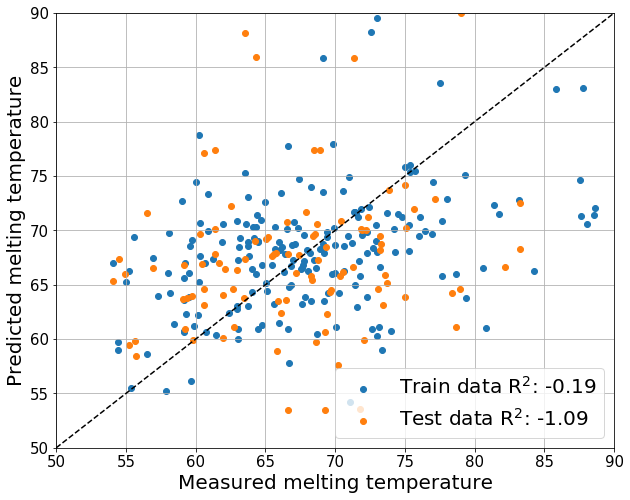

In [161]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 20}):
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    ax.scatter(y_train, svr_model.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_train, svr_model.predict(X_train))))
    ax.scatter(y_test, svr_model.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_test, svr_model.predict(X_test))))
    
    ax.plot([50, 90], [50, 90], linestyle='--',c='k')
    
    ax.set_ylim(50, 90)
    ax.set_xlim(50, 90)
    ax.legend()
    ax.set_ylabel('Predicted melting temperature')
    ax.set_xlabel('Measured melting temperature')
    ax.grid()

In [166]:
import shogun